In [1]:
# импортируем все необходимые библиотеки
import socket
import select
import json
import time
import matplotlib.pyplot as plt
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.transforms as T
import math
import random
import numpy as np

from os import mkdir
from os.path import join, exists
from typing import List, Dict, Tuple, Optional
from collections import namedtuple
from itertools import count
from src.plot_print_TCP_ML import run_mah_settings, open_tcp_port, print_performance_ML, run_mah_settings_ML
from src.senders import Sender
from src.machine_learning_TCP import ReinforcementAlgorithm
from src.pytorch_TCP_MachineLearning import LSTM_DQN

# список временных меток по которым отправитель может отправлять 1500-байтовый пакет
TRACE_FILES = {
    '0.57MBPS': '0.57mbps.trace',
    '2.64MBPS': '2.64mbps.trace',
    '3.04MBPS': '3.04mbps.trace',
    '5.65MBPS': '5.65mbps.trace',
    '100.42MBPS': '100.42mbps.trace',
    '114.68MBPS': '114.68mbps.trace'
}

In [2]:
mah_settings = {
    'delay': 88,
    'trace_file': '2.64mbps.trace',
    'queue_type': 'droptail',
    'downlink_queue_options': {
        'bytes': 30000
    }
}

***Эпоха # 0***
[Отправитель] Подключен к получателю: 100.64.0.2:42030

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 570, 'square_avg': tensor([[5.7543e-10, 0.0000e+00],
        [1.3888e-09, 0.0000e+00],
        [1.2827e-09, 0.0000e+00],
        [4.3625e-10, 0.0000e+00],
        [1.9542e-10, 0.0000e+00],
        [9.0028e-10, 0.0000e+00],
        [2.2095e-09, 0.0000e+00],
        [8.7841e-10, 0.0000e+00],
        [1.8873e-10, 0.0000e+00],
        [1.4038e-10, 0.0000e+00],
        [1.7510e-09, 0.0000e+00],
        [2.5045e-10, 0.0000e+00],
        [5.9562e-11, 0.0000e+00],
        [8.0478e-10, 0.0000e+00],
        [3.8024e-10, 0.0000e+00],
        [4.2804e-10, 0.0000e+00],
        [2.6899e-09, 0.0000e+00],
        [8.0504e-10, 0.0000e+00],
        [5.3444e-10, 0.

[Отправитель] Подключен к получателю: 100.64.0.4:44385

Результаты для отправителя 60168, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1194.666667
Среднее значение задержки RTT (мс): 321.723307



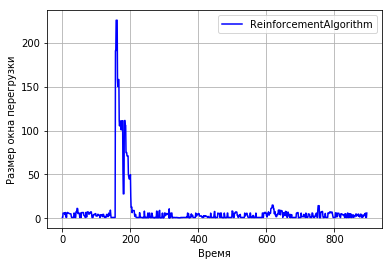

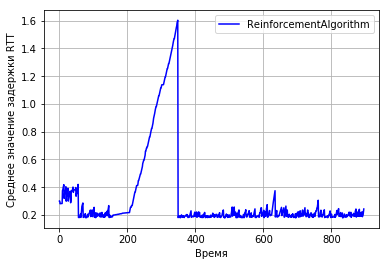

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 1200, 'square_avg': tensor([[1.0271e-12, 0.0000e+00],
        [2.4794e-12, 0.0000e+00],
        [2.2833e-12, 0.0000e+00],
        [7.7753e-13, 0.0000e+00],
        [3.4829e-13, 0.0000e+00],
        [1.6026e-12, 0.0000e+00],
        [3.9337e-12, 0.0000e+00],
        [1.5733e-12, 0.0000e+00],
        [3.3707e-13, 0.0000e+00],
        [2.5138e-13, 0.0000e+00],
        [3.1167e-12, 0.0000e+00],
        [4.4590e-13, 0.0000e+00],
        [1.0870e-13, 0.0000e+00],
        [1.4334e-12, 0.0000e+00],
        [6.7887e-13, 0.0000e+00],
        [7.6242e-13, 0.0000e+00],
        [4.8243e-12, 0.0000e+00],
        [1.4323e-12, 0.0000e+00],
        [9.5094e-13, 0.0000e+00],
        [9.3884e-13, 0.0000e+00],
        [3.2569e-12, 0.000

***Эпоха # 2***
[Отправитель] Подключен к получателю: 100.64.0.2:37825

Результаты для отправителя 43874, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1073.333333
Среднее значение задержки RTT (мс): 235.431291



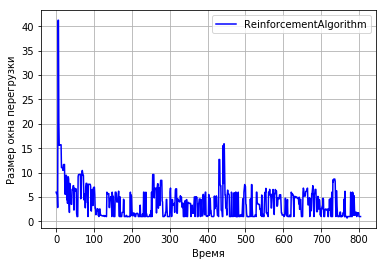

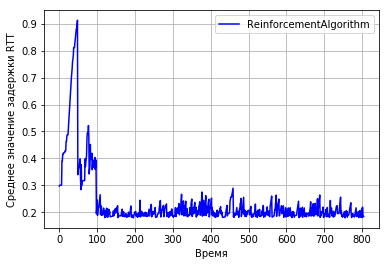

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 1791, 'square_avg': tensor([[2.7041e-15, 0.0000e+00],
        [6.5276e-15, 0.0000e+00],
        [6.0112e-15, 0.0000e+00],
        [2.0470e-15, 0.0000e+00],
        [9.1696e-16, 0.0000e+00],
        [4.2192e-15, 0.0000e+00],
        [1.0356e-14, 0.0000e+00],
        [4.1507e-15, 0.0000e+00],
        [8.8740e-16, 0.0000e+00],
        [6.6184e-16, 0.0000e+00],
        [8.2055e-15, 0.0000e+00],
        [1.1739e-15, 0.0000e+00],
        [2.8619e-16, 0.0000e+00],
        [3.7738e-15, 0.0000e+00],
        [1.7873e-15, 0.0000e+00],
        [2.0072e-15, 0.0000e+00],
        [1.2701e-14, 0.0000e+00],
        [3.7707e-15, 0.0000e+00],
        [2.5035e-15, 0.0000e+00],
        [2.4717e-15, 0.0000e+00],
        [8.5744e-15, 0.000

[Отправитель] Подключен к получателю: 100.64.0.4:60819

Результаты для отправителя 56588, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1121.333333
Среднее значение задержки RTT (мс): 217.772094



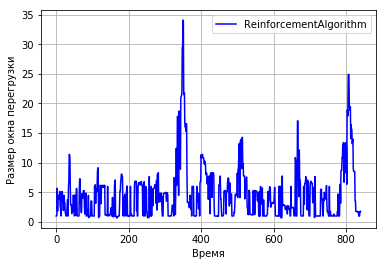

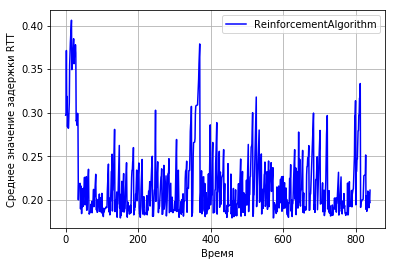

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 2395, 'square_avg': tensor([[6.2471e-18, 0.0000e+00],
        [1.5080e-17, 0.0000e+00],
        [1.3887e-17, 0.0000e+00],
        [4.7292e-18, 0.0000e+00],
        [2.1184e-18, 0.0000e+00],
        [9.7475e-18, 0.0000e+00],
        [2.3925e-17, 0.0000e+00],
        [9.5892e-18, 0.0000e+00],
        [2.0501e-18, 0.0000e+00],
        [1.5290e-18, 0.0000e+00],
        [1.8957e-17, 0.0000e+00],
        [2.7121e-18, 0.0000e+00],
        [6.6118e-19, 0.0000e+00],
        [8.7184e-18, 0.0000e+00],
        [4.1290e-18, 0.0000e+00],
        [4.6372e-18, 0.0000e+00],
        [2.9343e-17, 0.0000e+00],
        [8.7113e-18, 0.0000e+00],
        [5.7838e-18, 0.0000e+00],
        [5.7103e-18, 0.0000e+00],
        [1.9809e-17, 0.000

[Отправитель] Подключен к получателю: 100.64.0.2:60619

Результаты для отправителя 38867, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1452.000000
Среднее значение задержки RTT (мс): 236.359874



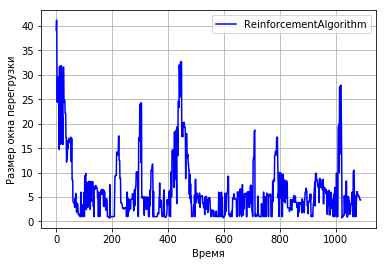

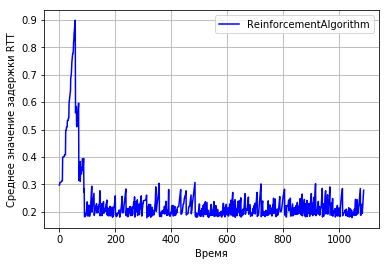

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 3161, 'square_avg': tensor([[3.2647e-21, 0.0000e+00],
        [6.8589e-21, 0.0000e+00],
        [7.1975e-21, 0.0000e+00],
        [3.8505e-21, 0.0000e+00],
        [1.3394e-21, 0.0000e+00],
        [4.8614e-21, 0.0000e+00],
        [1.1328e-20, 0.0000e+00],
        [6.5678e-19, 0.0000e+00],
        [1.2147e-21, 0.0000e+00],
        [2.8691e-21, 0.0000e+00],
        [8.8032e-21, 0.0000e+00],
        [1.4188e-21, 0.0000e+00],
        [1.3179e-21, 0.0000e+00],
        [4.8978e-21, 0.0000e+00],
        [2.1800e-21, 0.0000e+00],
        [2.1029e-21, 0.0000e+00],
        [1.3307e-20, 0.0000e+00],
        [3.9505e-21, 0.0000e+00],
        [2.6229e-21, 0.0000e+00],
        [2.5895e-21, 0.0000e+00],
        [8.9832e-21, 0.000

***Эпоха # 5***
[Отправитель] Подключен к получателю: 100.64.0.4:49256

Результаты для отправителя 48822, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1270.666667
Среднее значение задержки RTT (мс): 239.003581



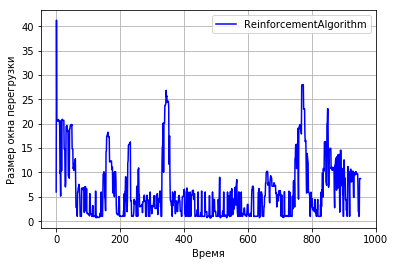

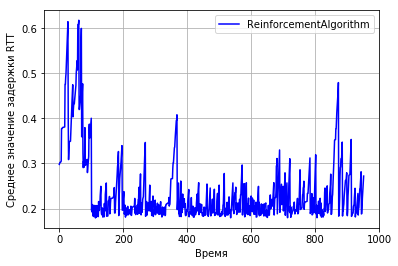

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 3819, 'square_avg': tensor([[4.3833e-24, 0.0000e+00],
        [9.2091e-24, 0.0000e+00],
        [9.6637e-24, 0.0000e+00],
        [5.1699e-24, 0.0000e+00],
        [1.7984e-24, 0.0000e+00],
        [6.5271e-24, 0.0000e+00],
        [1.5210e-23, 0.0000e+00],
        [8.8183e-22, 0.0000e+00],
        [1.6310e-24, 0.0000e+00],
        [3.8522e-24, 0.0000e+00],
        [1.1819e-23, 0.0000e+00],
        [1.9049e-24, 0.0000e+00],
        [1.7695e-24, 0.0000e+00],
        [6.5760e-24, 0.0000e+00],
        [2.9270e-24, 0.0000e+00],
        [2.8235e-24, 0.0000e+00],
        [1.7866e-23, 0.0000e+00],
        [5.3041e-24, 0.0000e+00],
        [3.5216e-24, 0.0000e+00],
        [3.4768e-24, 0.0000e+00],
        [1.2061e-23, 0.000

***Эпоха # 6***
[Отправитель] Подключен к получателю: 100.64.0.2:53014

Результаты для отправителя 49444, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1330.666667
Среднее значение задержки RTT (мс): 256.498401



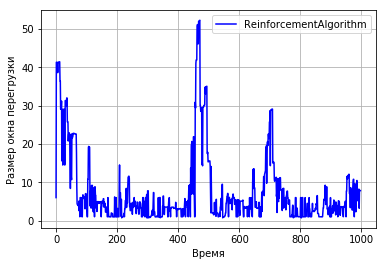

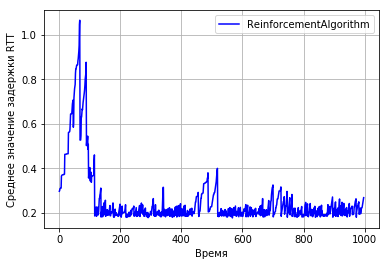

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 4507, 'square_avg': tensor([[4.3533e-27, 0.0000e+00],
        [9.1461e-27, 0.0000e+00],
        [9.5976e-27, 0.0000e+00],
        [5.1345e-27, 0.0000e+00],
        [1.7860e-27, 0.0000e+00],
        [6.4824e-27, 0.0000e+00],
        [1.5106e-26, 0.0000e+00],
        [8.7579e-25, 0.0000e+00],
        [1.6198e-27, 0.0000e+00],
        [3.8258e-27, 0.0000e+00],
        [1.1739e-26, 0.0000e+00],
        [1.8919e-27, 0.0000e+00],
        [1.7574e-27, 0.0000e+00],
        [6.5310e-27, 0.0000e+00],
        [2.9070e-27, 0.0000e+00],
        [2.8041e-27, 0.0000e+00],
        [1.7744e-26, 0.0000e+00],
        [5.2678e-27, 0.0000e+00],
        [3.4975e-27, 0.0000e+00],
        [3.4530e-27, 0.0000e+00],
        [1.1979e-26, 0.000

***Эпоха # 7***
[Отправитель] Подключен к получателю: 100.64.0.4:60929

Результаты для отправителя 46916, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1366.666667
Среднее значение задержки RTT (мс): 248.744973



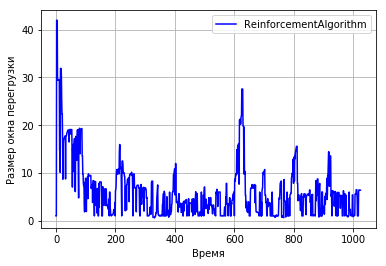

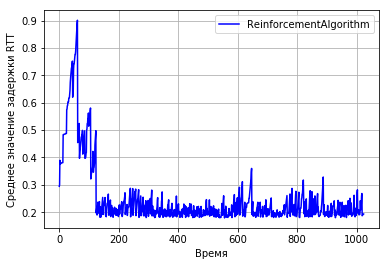

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 5235, 'square_avg': tensor([[2.8923e-30, 0.0000e+00],
        [6.0766e-30, 0.0000e+00],
        [6.3766e-30, 0.0000e+00],
        [3.4113e-30, 0.0000e+00],
        [1.1866e-30, 0.0000e+00],
        [4.3069e-30, 0.0000e+00],
        [1.0036e-29, 0.0000e+00],
        [5.8187e-28, 0.0000e+00],
        [1.0762e-30, 0.0000e+00],
        [2.5419e-30, 0.0000e+00],
        [7.7990e-30, 0.0000e+00],
        [1.2570e-30, 0.0000e+00],
        [1.1676e-30, 0.0000e+00],
        [4.3392e-30, 0.0000e+00],
        [1.9314e-30, 0.0000e+00],
        [1.8631e-30, 0.0000e+00],
        [1.1789e-29, 0.0000e+00],
        [3.4999e-30, 0.0000e+00],
        [2.3237e-30, 0.0000e+00],
        [2.2941e-30, 0.0000e+00],
        [7.9585e-30, 0.000

***Эпоха # 8***
[Отправитель] Подключен к получателю: 100.64.0.2:54900

Результаты для отправителя 58120, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1518.666667
Среднее значение задержки RTT (мс): 245.122946



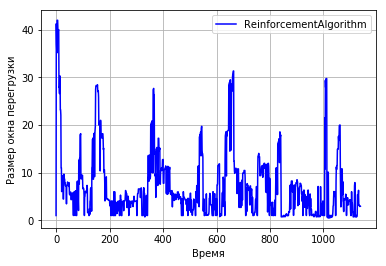

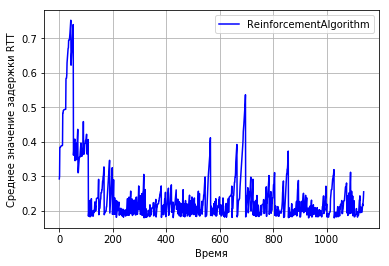

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 6021, 'square_avg': tensor([[1.0728e-33, 0.0000e+00],
        [2.2539e-33, 0.0000e+00],
        [2.3651e-33, 0.0000e+00],
        [1.2653e-33, 0.0000e+00],
        [4.4013e-34, 0.0000e+00],
        [1.5974e-33, 0.0000e+00],
        [3.7225e-33, 0.0000e+00],
        [2.1582e-31, 0.0000e+00],
        [3.9917e-34, 0.0000e+00],
        [9.4280e-34, 0.0000e+00],
        [2.8927e-33, 0.0000e+00],
        [4.6621e-34, 0.0000e+00],
        [4.3306e-34, 0.0000e+00],
        [1.6094e-33, 0.0000e+00],
        [7.1636e-34, 0.0000e+00],
        [6.9102e-34, 0.0000e+00],
        [4.3726e-33, 0.0000e+00],
        [1.2981e-33, 0.0000e+00],
        [8.6189e-34, 0.0000e+00],
        [8.5091e-34, 0.0000e+00],
        [2.9519e-33, 0.000

***Эпоха # 9***
[Отправитель] Подключен к получателю: 100.64.0.4:50347

Результаты для отправителя 59516, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1449.333333
Среднее значение задержки RTT (мс): 229.218797



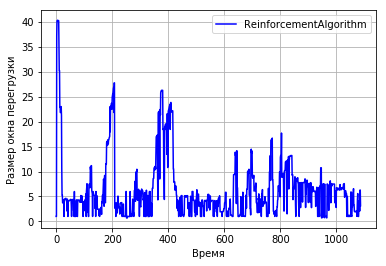

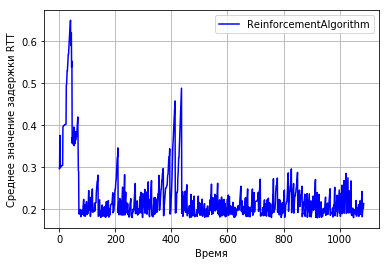

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 6793, 'square_avg': tensor([[4.5802e-37, 0.0000e+00],
        [9.6228e-37, 0.0000e+00],
        [1.0098e-36, 0.0000e+00],
        [5.4021e-37, 0.0000e+00],
        [1.8791e-37, 0.0000e+00],
        [6.8203e-37, 0.0000e+00],
        [1.5893e-36, 0.0000e+00],
        [9.2143e-35, 0.0000e+00],
        [1.7042e-37, 0.0000e+00],
        [4.0252e-37, 0.0000e+00],
        [1.2350e-36, 0.0000e+00],
        [1.9905e-37, 0.0000e+00],
        [1.8489e-37, 0.0000e+00],
        [6.8714e-37, 0.0000e+00],
        [3.0585e-37, 0.0000e+00],
        [2.9503e-37, 0.0000e+00],
        [1.8668e-36, 0.0000e+00],
        [5.5423e-37, 0.0000e+00],
        [3.6798e-37, 0.0000e+00],
        [3.6330e-37, 0.0000e+00],
        [1.2603e-36, 0.000

[Отправитель] Подключен к получателю: 100.64.0.2:53059

Результаты для отправителя 55877, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1725.333333
Среднее значение задержки RTT (мс): 288.141685



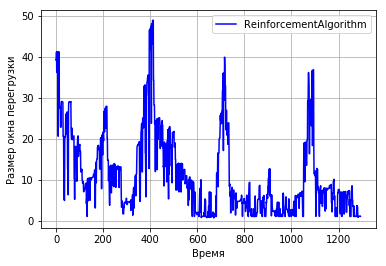

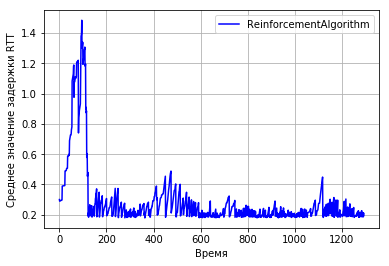

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 7698, 'square_avg': tensor([[5.1372e-41, 0.0000e+00],
        [1.0793e-40, 0.0000e+00],
        [1.1326e-40, 0.0000e+00],
        [6.0592e-41, 0.0000e+00],
        [2.1083e-41, 0.0000e+00],
        [7.6498e-41, 0.0000e+00],
        [1.7826e-40, 0.0000e+00],
        [1.0335e-38, 0.0000e+00],
        [1.9117e-41, 0.0000e+00],
        [4.5151e-41, 0.0000e+00],
        [1.3852e-40, 0.0000e+00],
        [2.2324e-41, 0.0000e+00],
        [2.0741e-41, 0.0000e+00],
        [7.7074e-41, 0.0000e+00],
        [3.4305e-41, 0.0000e+00],
        [3.3092e-41, 0.0000e+00],
        [2.0939e-40, 0.0000e+00],
        [6.2163e-41, 0.0000e+00],
        [4.1272e-41, 0.0000e+00],
        [4.0748e-41, 0.0000e+00],
        [1.4136e-40, 0.000

[Отправитель] Подключен к получателю: 100.64.0.4:40474

Результаты для отправителя 58648, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1824.000000
Среднее значение задержки RTT (мс): 267.569874



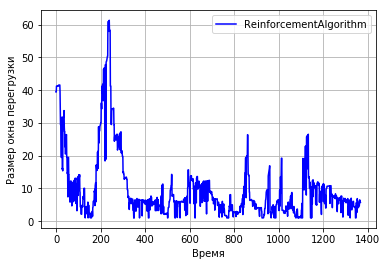

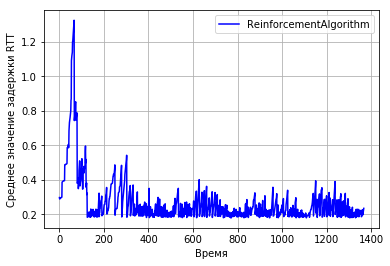

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 8684, 'square_avg': tensor([[7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [5.1568e-43, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.000

[Отправитель] Подключен к получателю: 100.64.0.2:53027

Результаты для отправителя 49078, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1814.666667
Среднее значение задержки RTT (мс): 298.226240



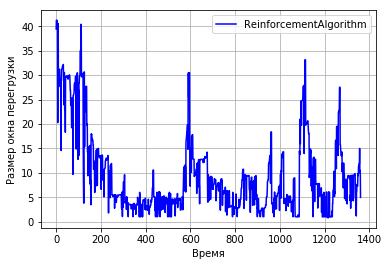

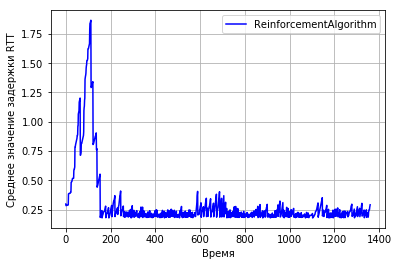

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 9705, 'square_avg': tensor([[1.2535e-01, 0.0000e+00],
        [2.2420e-02, 0.0000e+00],
        [2.2947e-03, 0.0000e+00],
        [1.4041e-01, 0.0000e+00],
        [6.0669e-01, 0.0000e+00],
        [1.1455e-03, 0.0000e+00],
        [1.8596e-02, 0.0000e+00],
        [8.9476e-03, 0.0000e+00],
        [2.1035e-03, 0.0000e+00],
        [4.7065e-03, 0.0000e+00],
        [5.4393e-02, 0.0000e+00],
        [1.3140e-01, 0.0000e+00],
        [2.0604e-02, 0.0000e+00],
        [2.8186e-03, 0.0000e+00],
        [1.6094e-01, 0.0000e+00],
        [2.3955e-03, 0.0000e+00],
        [1.1499e-01, 0.0000e+00],
        [1.6634e-04, 0.0000e+00],
        [6.7229e-02, 0.0000e+00],
        [3.5486e-01, 0.0000e+00],
        [1.9753e-05, 0.000

***Эпоха # 13***
[Отправитель] Подключен к получателю: 100.64.0.4:44191

Результаты для отправителя 37947, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1552.000000
Среднее значение задержки RTT (мс): 236.129625



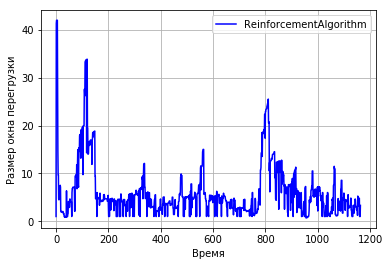

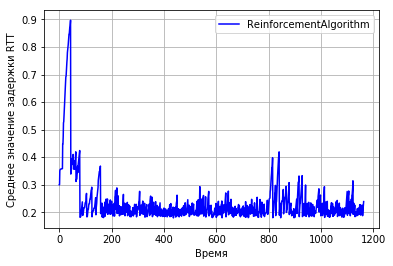

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 10587, 'square_avg': tensor([[1.7618e-03, 0.0000e+00],
        [1.1548e-02, 0.0000e+00],
        [3.0648e-03, 0.0000e+00],
        [5.1476e-01, 0.0000e+00],
        [7.3509e-02, 0.0000e+00],
        [1.5041e-03, 0.0000e+00],
        [3.2588e-03, 0.0000e+00],
        [7.4695e-02, 0.0000e+00],
        [3.8355e-04, 0.0000e+00],
        [4.4503e-02, 0.0000e+00],
        [4.2053e-02, 0.0000e+00],
        [3.1651e-02, 0.0000e+00],
        [2.7063e-02, 0.0000e+00],
        [3.1167e-02, 0.0000e+00],
        [4.8311e-01, 0.0000e+00],
        [4.9156e-04, 0.0000e+00],
        [5.1181e-02, 0.0000e+00],
        [9.7304e-04, 0.0000e+00],
        [3.4457e-01, 0.0000e+00],
        [1.2843e-01, 0.0000e+00],
        [2.8026e-03, 0.00

***Эпоха # 14***
[Отправитель] Подключен к получателю: 100.64.0.2:42591

Результаты для отправителя 59821, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1906.666667
Среднее значение задержки RTT (мс): 314.791290



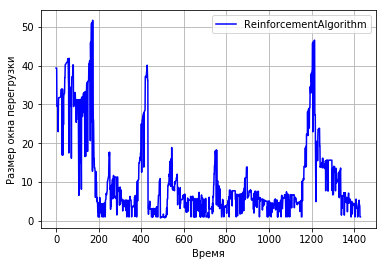

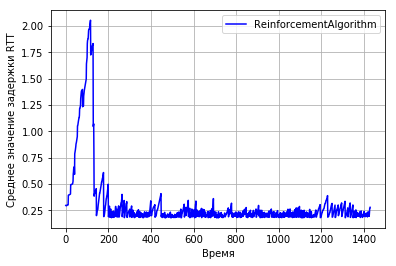

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 11645, 'square_avg': tensor([[1.7099e-03, 0.0000e+00],
        [8.8534e-04, 0.0000e+00],
        [3.6794e-03, 0.0000e+00],
        [3.7053e-02, 0.0000e+00],
        [6.1556e-05, 0.0000e+00],
        [6.0454e-05, 0.0000e+00],
        [3.4404e-03, 0.0000e+00],
        [4.0750e-03, 0.0000e+00],
        [1.7358e-04, 0.0000e+00],
        [8.3540e-04, 0.0000e+00],
        [1.1673e-04, 0.0000e+00],
        [1.0130e-03, 0.0000e+00],
        [1.8890e-04, 0.0000e+00],
        [4.2796e-03, 0.0000e+00],
        [1.0993e-01, 0.0000e+00],
        [6.9411e-02, 0.0000e+00],
        [6.2498e-02, 0.0000e+00],
        [7.7314e-02, 0.0000e+00],
        [3.1576e-01, 0.0000e+00],
        [1.8110e-02, 0.0000e+00],
        [9.7933e-06, 0.00

***Эпоха # 15***
[Отправитель] Подключен к получателю: 100.64.0.4:38803

Результаты для отправителя 40497, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2005.333333
Среднее значение задержки RTT (мс): 307.818231



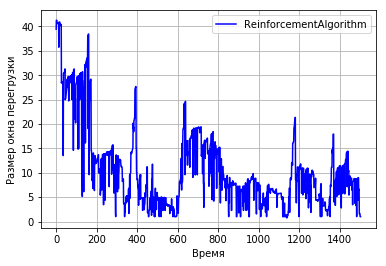

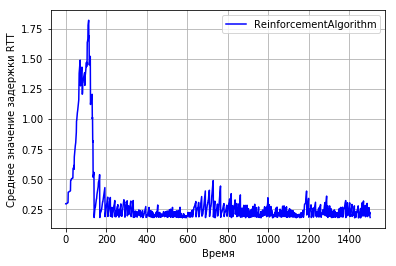

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 12792, 'square_avg': tensor([[9.4483e-05, 0.0000e+00],
        [7.8344e-02, 0.0000e+00],
        [1.0200e-02, 0.0000e+00],
        [8.9997e-04, 0.0000e+00],
        [1.4515e-04, 0.0000e+00],
        [4.3622e-03, 0.0000e+00],
        [4.2888e-03, 0.0000e+00],
        [2.0213e-02, 0.0000e+00],
        [3.2143e-03, 0.0000e+00],
        [1.6009e-03, 0.0000e+00],
        [1.4300e-03, 0.0000e+00],
        [7.8773e-04, 0.0000e+00],
        [1.2928e-03, 0.0000e+00],
        [1.2778e-02, 0.0000e+00],
        [1.1486e-01, 0.0000e+00],
        [5.7143e-02, 0.0000e+00],
        [6.1164e-02, 0.0000e+00],
        [1.5972e-01, 0.0000e+00],
        [8.2575e-02, 0.0000e+00],
        [1.0497e-02, 0.0000e+00],
        [3.8186e-03, 0.00

***Эпоха # 16***
[Отправитель] Подключен к получателю: 100.64.0.2:39231

Результаты для отправителя 46947, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2012.000000
Среднее значение задержки RTT (мс): 273.606382



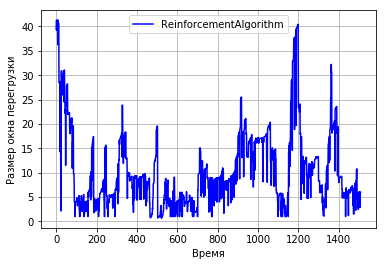

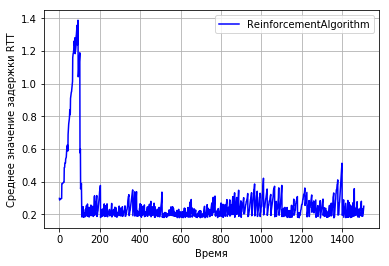

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 13903, 'square_avg': tensor([[1.5389e-08, 0.0000e+00],
        [3.1675e-06, 0.0000e+00],
        [6.1741e-07, 0.0000e+00],
        [1.5974e-08, 0.0000e+00],
        [2.2229e-09, 0.0000e+00],
        [1.0560e-07, 0.0000e+00],
        [6.2341e-08, 0.0000e+00],
        [1.0495e-06, 0.0000e+00],
        [4.6964e-08, 0.0000e+00],
        [4.8643e-08, 0.0000e+00],
        [2.1272e-08, 0.0000e+00],
        [2.0618e-08, 0.0000e+00],
        [2.5024e-08, 0.0000e+00],
        [4.1693e-07, 0.0000e+00],
        [3.6866e-06, 0.0000e+00],
        [7.1736e-06, 0.0000e+00],
        [3.8061e-06, 0.0000e+00],
        [6.0262e-06, 0.0000e+00],
        [5.7784e-06, 0.0000e+00],
        [9.1332e-07, 0.0000e+00],
        [7.2673e-08, 0.00

***Эпоха # 17***
[Отправитель] Подключен к получателю: 100.64.0.4:56645

Результаты для отправителя 57199, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1994.666667
Среднее значение задержки RTT (мс): 302.101608



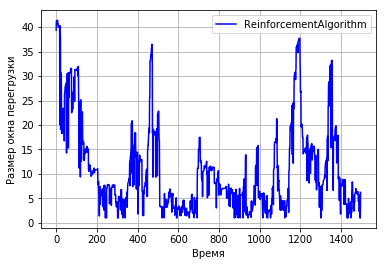

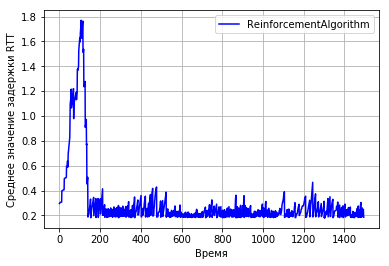

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 15013, 'square_avg': tensor([[2.1997e-13, 0.0000e+00],
        [4.5275e-11, 0.0000e+00],
        [8.8252e-12, 0.0000e+00],
        [2.2835e-13, 0.0000e+00],
        [3.1770e-14, 0.0000e+00],
        [1.5100e-12, 0.0000e+00],
        [8.9136e-13, 0.0000e+00],
        [1.5001e-11, 0.0000e+00],
        [6.7145e-13, 0.0000e+00],
        [6.9524e-13, 0.0000e+00],
        [3.0404e-13, 0.0000e+00],
        [2.9485e-13, 0.0000e+00],
        [3.5786e-13, 0.0000e+00],
        [5.9588e-12, 0.0000e+00],
        [5.2715e-11, 0.0000e+00],
        [1.0258e-10, 0.0000e+00],
        [5.4398e-11, 0.0000e+00],
        [8.6123e-11, 0.0000e+00],
        [8.2601e-11, 0.0000e+00],
        [1.3054e-11, 0.0000e+00],
        [1.0387e-12, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:38929

Результаты для отправителя 52629, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2054.666667
Среднее значение задержки RTT (мс): 271.895548



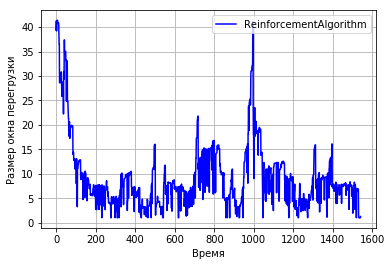

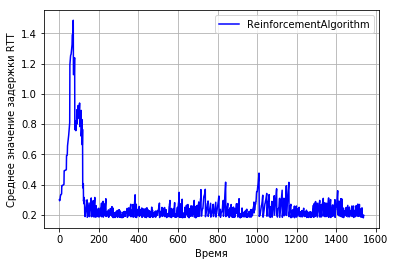

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 16178, 'square_avg': tensor([[1.8808e-18, 0.0000e+00],
        [3.7233e-16, 0.0000e+00],
        [7.2610e-17, 0.0000e+00],
        [1.8846e-18, 0.0000e+00],
        [2.6131e-19, 0.0000e+00],
        [1.2432e-17, 0.0000e+00],
        [7.3493e-18, 0.0000e+00],
        [1.7901e-16, 0.0000e+00],
        [5.7468e-18, 0.0000e+00],
        [5.7713e-18, 0.0000e+00],
        [2.6999e-18, 0.0000e+00],
        [2.4246e-18, 0.0000e+00],
        [3.0433e-18, 0.0000e+00],
        [4.9017e-17, 0.0000e+00],
        [4.3410e-16, 0.0000e+00],
        [8.5544e-16, 0.0000e+00],
        [4.4729e-16, 0.0000e+00],
        [7.0815e-16, 0.0000e+00],
        [6.7924e-16, 0.0000e+00],
        [1.0734e-16, 0.0000e+00],
        [8.5411e-18, 0.00

***Эпоха # 19***
[Отправитель] Подключен к получателю: 100.64.0.4:45066

Результаты для отправителя 41948, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 1778.666667
Среднее значение задержки RTT (мс): 248.807033



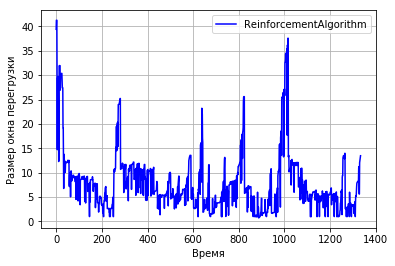

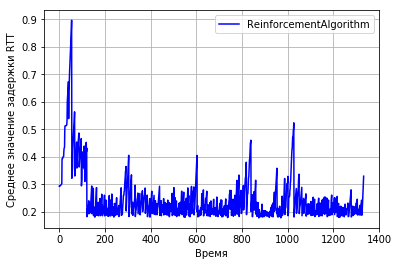

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 17196, 'square_avg': tensor([[1.4819e-21, 0.0000e+00],
        [1.3480e-20, 0.0000e+00],
        [2.6733e-21, 0.0000e+00],
        [7.8063e-23, 0.0000e+00],
        [9.4319e-24, 0.0000e+00],
        [5.3956e-22, 0.0000e+00],
        [3.1476e-22, 0.0000e+00],
        [2.4564e-19, 0.0000e+00],
        [4.6838e-21, 0.0000e+00],
        [3.5177e-22, 0.0000e+00],
        [1.1639e-22, 0.0000e+00],
        [1.0722e-22, 0.0000e+00],
        [7.7974e-21, 0.0000e+00],
        [1.8442e-21, 0.0000e+00],
        [1.5924e-20, 0.0000e+00],
        [3.6534e-20, 0.0000e+00],
        [1.6115e-20, 0.0000e+00],
        [2.5520e-20, 0.0000e+00],
        [2.4516e-20, 0.0000e+00],
        [3.8672e-21, 0.0000e+00],
        [3.0771e-22, 0.00

***Эпоха # 20***
[Отправитель] Подключен к получателю: 100.64.0.2:49025

Результаты для отправителя 44626, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2088.000000
Среднее значение задержки RTT (мс): 324.694212



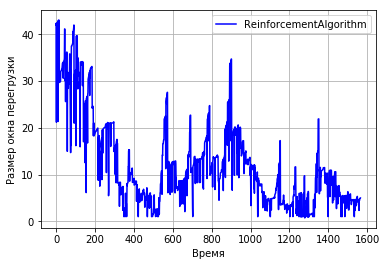

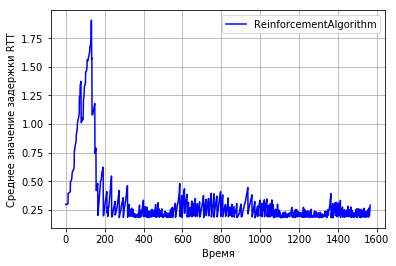

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 18389, 'square_avg': tensor([[4.3481e-22, 0.0000e+00],
        [5.6737e-20, 0.0000e+00],
        [3.3752e-23, 0.0000e+00],
        [4.6538e-24, 0.0000e+00],
        [1.1395e-22, 0.0000e+00],
        [6.4458e-22, 0.0000e+00],
        [3.1705e-20, 0.0000e+00],
        [2.5943e-19, 0.0000e+00],
        [5.9122e-24, 0.0000e+00],
        [1.6638e-19, 0.0000e+00],
        [2.5167e-24, 0.0000e+00],
        [1.9734e-23, 0.0000e+00],
        [1.7837e-21, 0.0000e+00],
        [2.6503e-21, 0.0000e+00],
        [2.5441e-20, 0.0000e+00],
        [9.2914e-22, 0.0000e+00],
        [6.5901e-24, 0.0000e+00],
        [1.3720e-23, 0.0000e+00],
        [5.2418e-22, 0.0000e+00],
        [6.9216e-24, 0.0000e+00],
        [3.7835e-25, 0.00

[Отправитель] Подключен к получателю: 100.64.0.4:56591

Результаты для отправителя 60577, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2330.666667
Среднее значение задержки RTT (мс): 298.060196



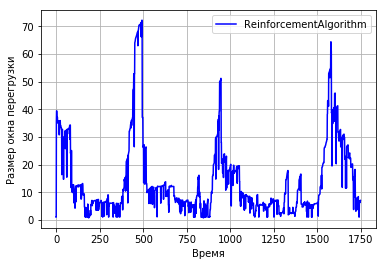

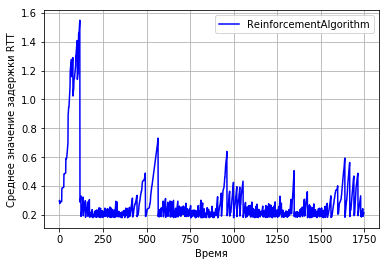

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 19687, 'square_avg': tensor([[1.7402e-22, 0.0000e+00],
        [3.2879e-24, 0.0000e+00],
        [2.1158e-24, 0.0000e+00],
        [4.9520e-25, 0.0000e+00],
        [1.6888e-27, 0.0000e+00],
        [1.5806e-24, 0.0000e+00],
        [1.2217e-25, 0.0000e+00],
        [1.3225e-23, 0.0000e+00],
        [5.8402e-25, 0.0000e+00],
        [7.8947e-25, 0.0000e+00],
        [2.9452e-26, 0.0000e+00],
        [3.0643e-25, 0.0000e+00],
        [2.5326e-25, 0.0000e+00],
        [4.1803e-25, 0.0000e+00],
        [9.8118e-24, 0.0000e+00],
        [2.6267e-22, 0.0000e+00],
        [5.7353e-29, 0.0000e+00],
        [1.0153e-24, 0.0000e+00],
        [4.0267e-24, 0.0000e+00],
        [6.1259e-29, 0.0000e+00],
        [4.6164e-29, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:47432

Результаты для отправителя 50829, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2166.666667
Среднее значение задержки RTT (мс): 277.761745



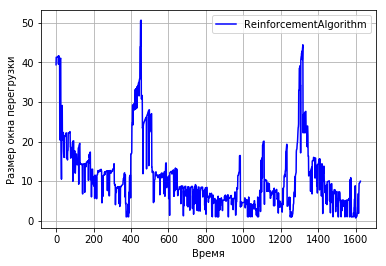

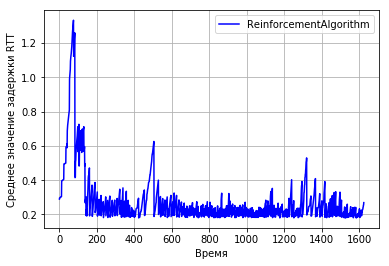

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 20927, 'square_avg': tensor([[1.3869e-22, 0.0000e+00],
        [2.0041e-24, 0.0000e+00],
        [1.0691e-24, 0.0000e+00],
        [3.0367e-25, 0.0000e+00],
        [1.3772e-27, 0.0000e+00],
        [1.1521e-24, 0.0000e+00],
        [9.2884e-26, 0.0000e+00],
        [3.0883e-24, 0.0000e+00],
        [1.5676e-25, 0.0000e+00],
        [2.9302e-25, 0.0000e+00],
        [8.8708e-26, 0.0000e+00],
        [6.4342e-25, 0.0000e+00],
        [1.3367e-26, 0.0000e+00],
        [5.4836e-26, 0.0000e+00],
        [3.9406e-24, 0.0000e+00],
        [6.3492e-23, 0.0000e+00],
        [2.7561e-29, 0.0000e+00],
        [7.7358e-25, 0.0000e+00],
        [2.6603e-24, 0.0000e+00],
        [1.7885e-29, 0.0000e+00],
        [3.5621e-29, 0.00

[Отправитель] Подключен к получателю: 100.64.0.4:56729

Результаты для отправителя 33038, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2137.333333
Среднее значение задержки RTT (мс): 336.156380



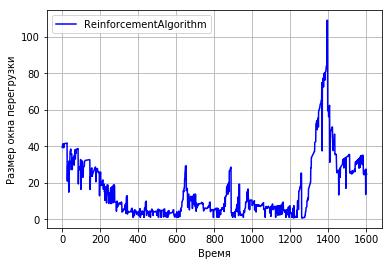

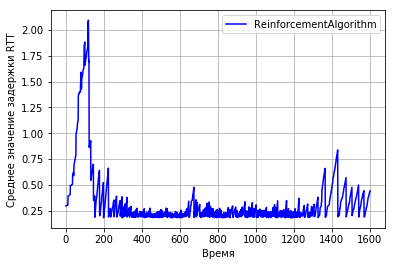

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 22138, 'square_avg': tensor([[6.7438e-23, 0.0000e+00],
        [2.4525e-24, 0.0000e+00],
        [1.8915e-24, 0.0000e+00],
        [3.5157e-25, 0.0000e+00],
        [5.5224e-28, 0.0000e+00],
        [1.0508e-24, 0.0000e+00],
        [2.9953e-24, 0.0000e+00],
        [1.5874e-21, 0.0000e+00],
        [3.7624e-21, 0.0000e+00],
        [3.0610e-25, 0.0000e+00],
        [9.8998e-24, 0.0000e+00],
        [2.0399e-26, 0.0000e+00],
        [7.8118e-24, 0.0000e+00],
        [2.9192e-23, 0.0000e+00],
        [1.0284e-23, 0.0000e+00],
        [1.1351e-21, 0.0000e+00],
        [1.2426e-29, 0.0000e+00],
        [4.1685e-25, 0.0000e+00],
        [1.0867e-24, 0.0000e+00],
        [2.9756e-30, 0.0000e+00],
        [1.6080e-29, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:47565

Результаты для отправителя 58743, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2872.000000
Среднее значение задержки RTT (мс): 300.359254



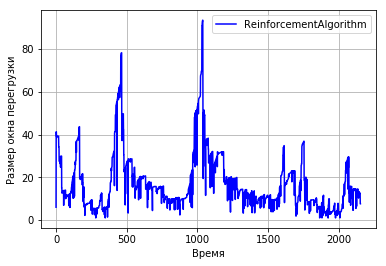

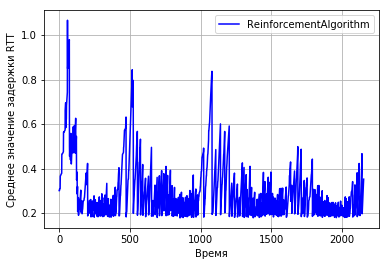

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 23794, 'square_avg': tensor([[5.1487e-23, 0.0000e+00],
        [9.3888e-25, 0.0000e+00],
        [6.0895e-25, 0.0000e+00],
        [1.5776e-25, 0.0000e+00],
        [5.3249e-28, 0.0000e+00],
        [4.5627e-25, 0.0000e+00],
        [1.9039e-26, 0.0000e+00],
        [5.9790e-24, 0.0000e+00],
        [8.1796e-25, 0.0000e+00],
        [1.2524e-25, 0.0000e+00],
        [1.4356e-26, 0.0000e+00],
        [2.6666e-27, 0.0000e+00],
        [4.5033e-27, 0.0000e+00],
        [2.4798e-25, 0.0000e+00],
        [2.5033e-24, 0.0000e+00],
        [1.2610e-22, 0.0000e+00],
        [1.3128e-29, 0.0000e+00],
        [4.7266e-25, 0.0000e+00],
        [1.0565e-24, 0.0000e+00],
        [1.7061e-30, 0.0000e+00],
        [1.7663e-29, 0.00

***Эпоха # 25***
[Отправитель] Подключен к получателю: 100.64.0.4:54906

Результаты для отправителя 59771, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2606.666667
Среднее значение задержки RTT (мс): 339.671917



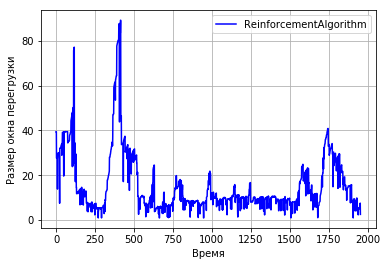

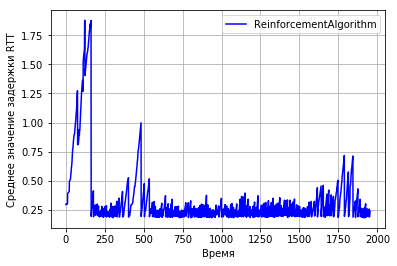

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 25321, 'square_avg': tensor([[2.7456e-23, 0.0000e+00],
        [1.6272e-23, 0.0000e+00],
        [5.8578e-24, 0.0000e+00],
        [5.2396e-24, 0.0000e+00],
        [2.9070e-26, 0.0000e+00],
        [9.9843e-25, 0.0000e+00],
        [1.1724e-21, 0.0000e+00],
        [4.1734e-18, 0.0000e+00],
        [3.7691e-24, 0.0000e+00],
        [2.8198e-21, 0.0000e+00],
        [3.3544e-25, 0.0000e+00],
        [2.6437e-26, 0.0000e+00],
        [1.1476e-24, 0.0000e+00],
        [5.0561e-22, 0.0000e+00],
        [4.3415e-23, 0.0000e+00],
        [3.6849e-23, 0.0000e+00],
        [6.0178e-29, 0.0000e+00],
        [5.2266e-25, 0.0000e+00],
        [2.2341e-22, 0.0000e+00],
        [8.9758e-29, 0.0000e+00],
        [5.7730e-29, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:58382

Результаты для отправителя 51478, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2305.333333
Среднее значение задержки RTT (мс): 278.041171



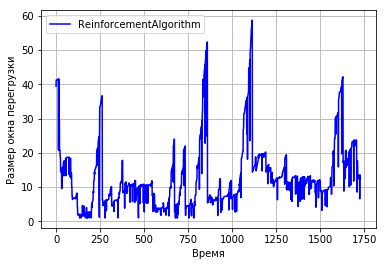

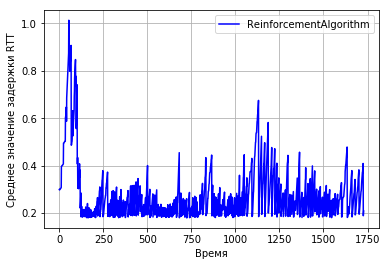

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 26666, 'square_avg': tensor([[3.1081e-23, 0.0000e+00],
        [5.0258e-25, 0.0000e+00],
        [2.0994e-25, 0.0000e+00],
        [7.6958e-26, 0.0000e+00],
        [3.7467e-28, 0.0000e+00],
        [2.8848e-25, 0.0000e+00],
        [2.8982e-26, 0.0000e+00],
        [6.9126e-24, 0.0000e+00],
        [1.5254e-27, 0.0000e+00],
        [7.3961e-26, 0.0000e+00],
        [1.5937e-27, 0.0000e+00],
        [6.8249e-28, 0.0000e+00],
        [5.7472e-27, 0.0000e+00],
        [1.9653e-26, 0.0000e+00],
        [5.5029e-25, 0.0000e+00],
        [1.6904e-23, 0.0000e+00],
        [1.2506e-29, 0.0000e+00],
        [4.2712e-25, 0.0000e+00],
        [1.0641e-24, 0.0000e+00],
        [2.2136e-32, 0.0000e+00],
        [1.6886e-29, 0.00

[Отправитель] Подключен к получателю: 100.64.0.4:37084

Результаты для отправителя 46747, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2889.333333
Среднее значение задержки RTT (мс): 370.532122



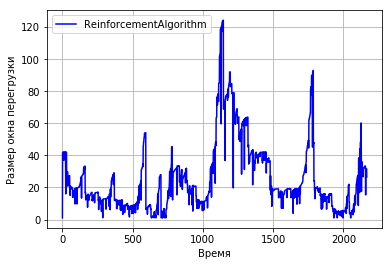

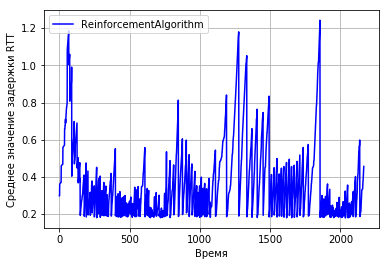

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 28287, 'square_avg': tensor([[1.9444e-23, 0.0000e+00],
        [1.6198e-24, 0.0000e+00],
        [4.3500e-25, 0.0000e+00],
        [9.6935e-26, 0.0000e+00],
        [3.9872e-27, 0.0000e+00],
        [3.9098e-25, 0.0000e+00],
        [5.0831e-25, 0.0000e+00],
        [3.0149e-22, 0.0000e+00],
        [5.4958e-23, 0.0000e+00],
        [2.6360e-25, 0.0000e+00],
        [8.4387e-23, 0.0000e+00],
        [4.8423e-25, 0.0000e+00],
        [1.8266e-26, 0.0000e+00],
        [4.1088e-24, 0.0000e+00],
        [2.3527e-24, 0.0000e+00],
        [8.8224e-23, 0.0000e+00],
        [5.8670e-30, 0.0000e+00],
        [2.0453e-25, 0.0000e+00],
        [6.6406e-25, 0.0000e+00],
        [1.3441e-32, 0.0000e+00],
        [8.7790e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:39151

Результаты для отправителя 42948, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2325.333333
Среднее значение задержки RTT (мс): 312.950297



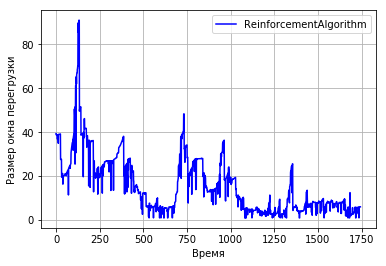

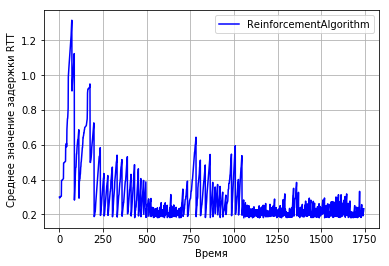

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 29633, 'square_avg': tensor([[1.6934e-23, 0.0000e+00],
        [2.9727e-25, 0.0000e+00],
        [1.5523e-25, 0.0000e+00],
        [5.0295e-26, 0.0000e+00],
        [2.4131e-28, 0.0000e+00],
        [1.5197e-25, 0.0000e+00],
        [3.6258e-27, 0.0000e+00],
        [3.5897e-25, 0.0000e+00],
        [7.3951e-27, 0.0000e+00],
        [4.3586e-26, 0.0000e+00],
        [1.2088e-27, 0.0000e+00],
        [1.6011e-28, 0.0000e+00],
        [1.2676e-25, 0.0000e+00],
        [2.2226e-26, 0.0000e+00],
        [4.1803e-25, 0.0000e+00],
        [6.4611e-24, 0.0000e+00],
        [9.6070e-30, 0.0000e+00],
        [3.8547e-25, 0.0000e+00],
        [8.5448e-25, 0.0000e+00],
        [2.2196e-32, 0.0000e+00],
        [1.3497e-29, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:40845

Результаты для отправителя 60023, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2594.666667
Среднее значение задержки RTT (мс): 350.723655



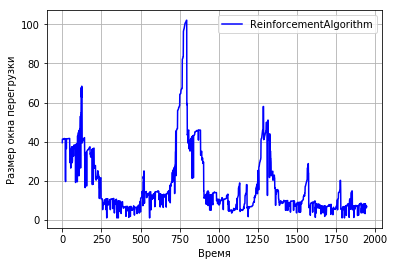

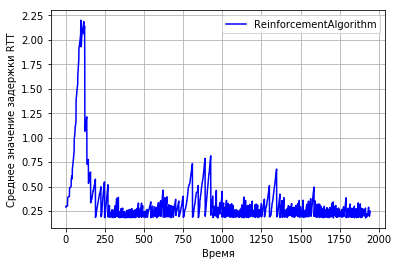

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 31146, 'square_avg': tensor([[1.7930e-23, 0.0000e+00],
        [3.0214e-25, 0.0000e+00],
        [1.4009e-25, 0.0000e+00],
        [4.6471e-26, 0.0000e+00],
        [1.8776e-28, 0.0000e+00],
        [1.5659e-25, 0.0000e+00],
        [9.1265e-27, 0.0000e+00],
        [2.7080e-25, 0.0000e+00],
        [1.0843e-26, 0.0000e+00],
        [4.1906e-26, 0.0000e+00],
        [1.0879e-27, 0.0000e+00],
        [5.1896e-27, 0.0000e+00],
        [2.0236e-27, 0.0000e+00],
        [8.6609e-27, 0.0000e+00],
        [3.9955e-25, 0.0000e+00],
        [8.4902e-24, 0.0000e+00],
        [7.8240e-30, 0.0000e+00],
        [2.6258e-25, 0.0000e+00],
        [6.8451e-25, 0.0000e+00],
        [4.9092e-31, 0.0000e+00],
        [1.0627e-29, 0.00

[Отправитель] Подключен к получателю: 100.64.0.4:53335

Результаты для отправителя 49207, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2786.666667
Среднее значение задержки RTT (мс): 339.702257



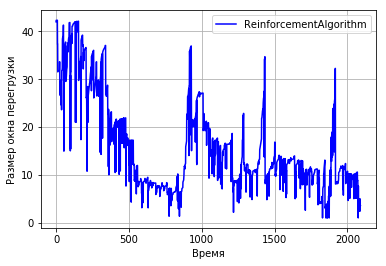

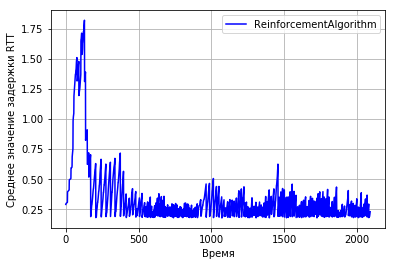

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 32837, 'square_avg': tensor([[1.1277e-23, 0.0000e+00],
        [2.1824e-25, 0.0000e+00],
        [1.2519e-25, 0.0000e+00],
        [3.6465e-26, 0.0000e+00],
        [1.5117e-28, 0.0000e+00],
        [1.0260e-25, 0.0000e+00],
        [3.6388e-27, 0.0000e+00],
        [1.9748e-24, 0.0000e+00],
        [3.0031e-24, 0.0000e+00],
        [3.1832e-26, 0.0000e+00],
        [7.3576e-28, 0.0000e+00],
        [1.2940e-28, 0.0000e+00],
        [1.2276e-23, 0.0000e+00],
        [4.5756e-26, 0.0000e+00],
        [3.8505e-25, 0.0000e+00],
        [5.3790e-24, 0.0000e+00],
        [6.4336e-30, 0.0000e+00],
        [2.5110e-25, 0.0000e+00],
        [5.6286e-25, 0.0000e+00],
        [1.8820e-30, 0.0000e+00],
        [8.8021e-30, 0.00

***Эпоха # 31***
[Отправитель] Подключен к получателю: 100.64.0.2:39774

Результаты для отправителя 43234, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2974.666667
Среднее значение задержки RTT (мс): 328.538290



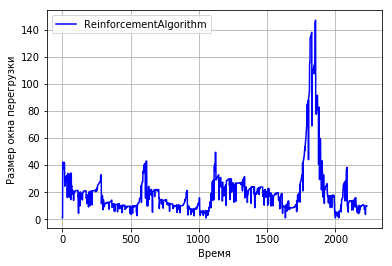

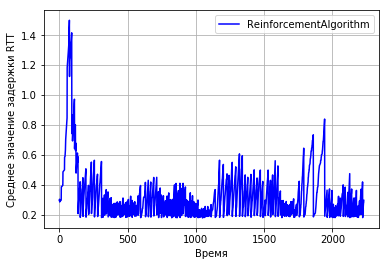

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 34588, 'square_avg': tensor([[1.1094e-23, 0.0000e+00],
        [2.6874e-25, 0.0000e+00],
        [1.6526e-25, 0.0000e+00],
        [4.5222e-26, 0.0000e+00],
        [1.1840e-28, 0.0000e+00],
        [1.1679e-25, 0.0000e+00],
        [1.6197e-27, 0.0000e+00],
        [1.5931e-24, 0.0000e+00],
        [1.4066e-25, 0.0000e+00],
        [3.5615e-26, 0.0000e+00],
        [1.9383e-24, 0.0000e+00],
        [2.2001e-27, 0.0000e+00],
        [4.4102e-27, 0.0000e+00],
        [7.4743e-27, 0.0000e+00],
        [6.5823e-25, 0.0000e+00],
        [2.5460e-23, 0.0000e+00],
        [3.8894e-30, 0.0000e+00],
        [1.3630e-25, 0.0000e+00],
        [3.7693e-25, 0.0000e+00],
        [1.6973e-30, 0.0000e+00],
        [5.3058e-30, 0.00

***Эпоха # 32***
[Отправитель] Подключен к получателю: 100.64.0.4:51399

Результаты для отправителя 49262, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3196.000000
Среднее значение задержки RTT (мс): 375.676740



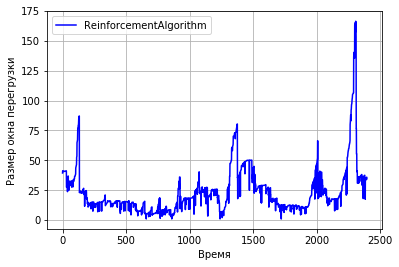

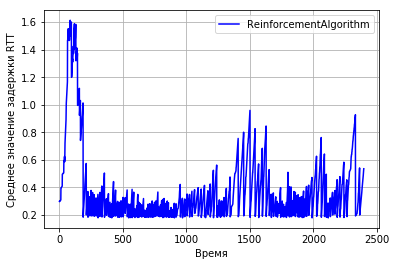

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 36461, 'square_avg': tensor([[1.1063e-23, 0.0000e+00],
        [2.4160e-25, 0.0000e+00],
        [1.5465e-25, 0.0000e+00],
        [4.1309e-26, 0.0000e+00],
        [1.1349e-28, 0.0000e+00],
        [1.0359e-25, 0.0000e+00],
        [4.2218e-27, 0.0000e+00],
        [2.3290e-24, 0.0000e+00],
        [6.3766e-25, 0.0000e+00],
        [3.0203e-26, 0.0000e+00],
        [1.7442e-26, 0.0000e+00],
        [7.3900e-28, 0.0000e+00],
        [2.8432e-27, 0.0000e+00],
        [1.2395e-26, 0.0000e+00],
        [6.5780e-25, 0.0000e+00],
        [4.2103e-23, 0.0000e+00],
        [2.4302e-30, 0.0000e+00],
        [1.2147e-25, 0.0000e+00],
        [2.0936e-25, 0.0000e+00],
        [2.9446e-30, 0.0000e+00],
        [3.6345e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:52254

Результаты для отправителя 33424, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3312.000000
Среднее значение задержки RTT (мс): 445.394255



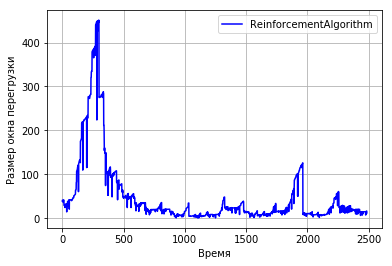

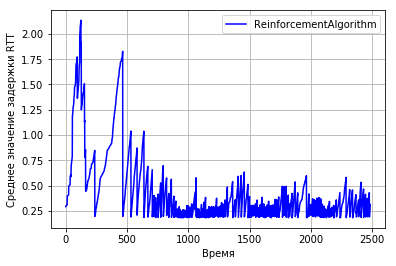

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 38273, 'square_avg': tensor([[9.9991e-24, 0.0000e+00],
        [1.5219e-25, 0.0000e+00],
        [7.8639e-26, 0.0000e+00],
        [2.5874e-26, 0.0000e+00],
        [1.2728e-28, 0.0000e+00],
        [7.6888e-26, 0.0000e+00],
        [4.0892e-27, 0.0000e+00],
        [7.4008e-25, 0.0000e+00],
        [1.6074e-24, 0.0000e+00],
        [2.4105e-26, 0.0000e+00],
        [7.1159e-28, 0.0000e+00],
        [2.0872e-28, 0.0000e+00],
        [6.1382e-28, 0.0000e+00],
        [2.0330e-26, 0.0000e+00],
        [2.1756e-25, 0.0000e+00],
        [6.9659e-24, 0.0000e+00],
        [5.8535e-30, 0.0000e+00],
        [2.1317e-25, 0.0000e+00],
        [4.4137e-25, 0.0000e+00],
        [2.9360e-30, 0.0000e+00],
        [7.6183e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.4:54864

Результаты для отправителя 37285, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2653.333333
Среднее значение задержки RTT (мс): 377.853789



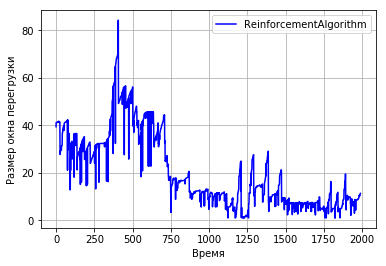

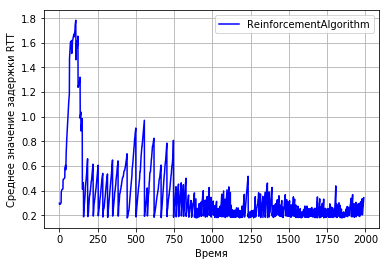

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 39868, 'square_avg': tensor([[1.0113e-23, 0.0000e+00],
        [1.2214e-25, 0.0000e+00],
        [4.7263e-26, 0.0000e+00],
        [1.8759e-26, 0.0000e+00],
        [1.1244e-28, 0.0000e+00],
        [6.9142e-26, 0.0000e+00],
        [6.5314e-27, 0.0000e+00],
        [4.8304e-25, 0.0000e+00],
        [5.6186e-28, 0.0000e+00],
        [1.9537e-26, 0.0000e+00],
        [1.1188e-27, 0.0000e+00],
        [3.5972e-29, 0.0000e+00],
        [1.3092e-27, 0.0000e+00],
        [9.2699e-27, 0.0000e+00],
        [9.3775e-26, 0.0000e+00],
        [8.0439e-24, 0.0000e+00],
        [5.3654e-30, 0.0000e+00],
        [2.5458e-25, 0.0000e+00],
        [3.2969e-25, 0.0000e+00],
        [6.7773e-30, 0.0000e+00],
        [7.1519e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:52646

Результаты для отправителя 49535, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3170.666667
Среднее значение задержки RTT (мс): 407.335880



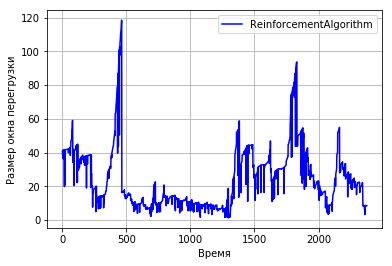

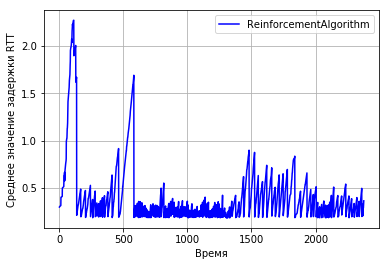

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 41773, 'square_avg': tensor([[4.5551e-24, 0.0000e+00],
        [1.2302e-25, 0.0000e+00],
        [7.1833e-26, 0.0000e+00],
        [2.0958e-26, 0.0000e+00],
        [8.5291e-29, 0.0000e+00],
        [6.7611e-26, 0.0000e+00],
        [9.0903e-28, 0.0000e+00],
        [2.9873e-24, 0.0000e+00],
        [5.6927e-26, 0.0000e+00],
        [2.3146e-26, 0.0000e+00],
        [2.3857e-27, 0.0000e+00],
        [1.3980e-26, 0.0000e+00],
        [1.0382e-23, 0.0000e+00],
        [2.9827e-25, 0.0000e+00],
        [2.2015e-25, 0.0000e+00],
        [3.1603e-24, 0.0000e+00],
        [3.6423e-30, 0.0000e+00],
        [1.4172e-25, 0.0000e+00],
        [3.4165e-25, 0.0000e+00],
        [3.3420e-30, 0.0000e+00],
        [4.3792e-30, 0.00

***Эпоха # 36***
[Отправитель] Подключен к получателю: 100.64.0.4:33154

Результаты для отправителя 43841, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3476.000000
Среднее значение задержки RTT (мс): 407.963637



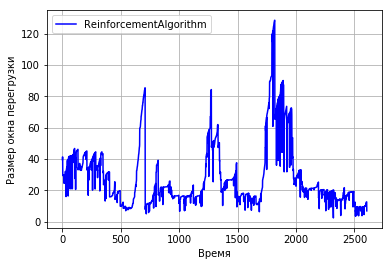

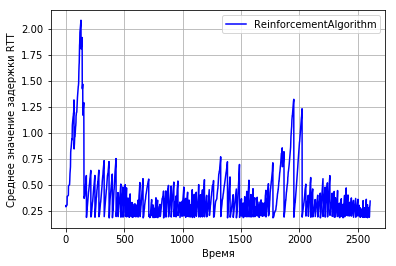

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 43840, 'square_avg': tensor([[8.4262e-24, 0.0000e+00],
        [1.3085e-25, 0.0000e+00],
        [5.2376e-26, 0.0000e+00],
        [1.9563e-26, 0.0000e+00],
        [7.0693e-29, 0.0000e+00],
        [6.7907e-26, 0.0000e+00],
        [3.8780e-27, 0.0000e+00],
        [8.2999e-26, 0.0000e+00],
        [5.9094e-28, 0.0000e+00],
        [1.7986e-26, 0.0000e+00],
        [3.5146e-28, 0.0000e+00],
        [6.8655e-30, 0.0000e+00],
        [2.0844e-28, 0.0000e+00],
        [6.3146e-27, 0.0000e+00],
        [1.3305e-25, 0.0000e+00],
        [2.5041e-24, 0.0000e+00],
        [3.4138e-30, 0.0000e+00],
        [1.9296e-25, 0.0000e+00],
        [2.1524e-25, 0.0000e+00],
        [5.7050e-30, 0.0000e+00],
        [4.3840e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:41635

Результаты для отправителя 54139, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4170.666667
Среднее значение задержки RTT (мс): 509.904321



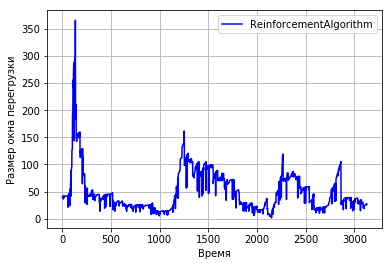

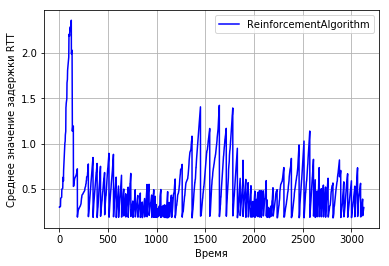

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 46161, 'square_avg': tensor([[5.4100e-24, 0.0000e+00],
        [8.0098e-26, 0.0000e+00],
        [3.8608e-26, 0.0000e+00],
        [1.3412e-26, 0.0000e+00],
        [7.1147e-29, 0.0000e+00],
        [4.0433e-26, 0.0000e+00],
        [1.6716e-27, 0.0000e+00],
        [6.2923e-26, 0.0000e+00],
        [1.1252e-27, 0.0000e+00],
        [1.3233e-26, 0.0000e+00],
        [6.7786e-28, 0.0000e+00],
        [2.4918e-29, 0.0000e+00],
        [5.4795e-28, 0.0000e+00],
        [2.3686e-27, 0.0000e+00],
        [1.0228e-25, 0.0000e+00],
        [4.4603e-24, 0.0000e+00],
        [3.8214e-30, 0.0000e+00],
        [1.7816e-25, 0.0000e+00],
        [2.9655e-25, 0.0000e+00],
        [4.4263e-30, 0.0000e+00],
        [4.6970e-30, 0.00

***Эпоха # 38***
[Отправитель] Подключен к получателю: 100.64.0.4:41389

Результаты для отправителя 55158, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3301.333333
Среднее значение задержки RTT (мс): 373.449290



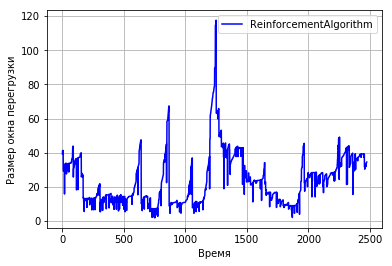

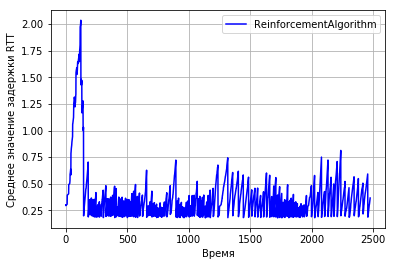

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 48158, 'square_avg': tensor([[4.4466e-24, 0.0000e+00],
        [6.8566e-26, 0.0000e+00],
        [3.1698e-26, 0.0000e+00],
        [1.1807e-26, 0.0000e+00],
        [6.8592e-29, 0.0000e+00],
        [3.4559e-26, 0.0000e+00],
        [3.6366e-26, 0.0000e+00],
        [4.3693e-22, 0.0000e+00],
        [1.0039e-27, 0.0000e+00],
        [1.3349e-25, 0.0000e+00],
        [5.6369e-28, 0.0000e+00],
        [2.6440e-29, 0.0000e+00],
        [2.4934e-28, 0.0000e+00],
        [1.1223e-26, 0.0000e+00],
        [6.4783e-26, 0.0000e+00],
        [3.5413e-24, 0.0000e+00],
        [3.9469e-30, 0.0000e+00],
        [2.1201e-25, 0.0000e+00],
        [3.2840e-25, 0.0000e+00],
        [8.6760e-30, 0.0000e+00],
        [5.3146e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:37594

Результаты для отправителя 42047, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 2884.000000
Среднее значение задержки RTT (мс): 376.181697



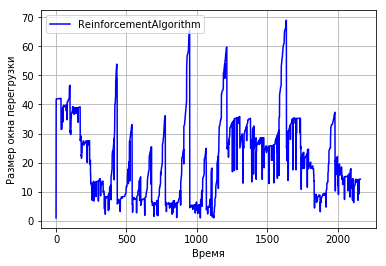

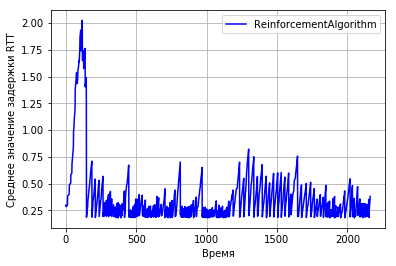

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 49864, 'square_avg': tensor([[4.1638e-24, 0.0000e+00],
        [7.1481e-26, 0.0000e+00],
        [3.4251e-26, 0.0000e+00],
        [1.1428e-26, 0.0000e+00],
        [4.9063e-29, 0.0000e+00],
        [3.4682e-26, 0.0000e+00],
        [7.0024e-28, 0.0000e+00],
        [6.2973e-26, 0.0000e+00],
        [2.1398e-28, 0.0000e+00],
        [1.1244e-26, 0.0000e+00],
        [2.2082e-28, 0.0000e+00],
        [8.1355e-28, 0.0000e+00],
        [9.6751e-29, 0.0000e+00],
        [9.5944e-28, 0.0000e+00],
        [1.0579e-25, 0.0000e+00],
        [1.8887e-24, 0.0000e+00],
        [2.7341e-30, 0.0000e+00],
        [1.2979e-25, 0.0000e+00],
        [2.2564e-25, 0.0000e+00],
        [4.5012e-30, 0.0000e+00],
        [3.3505e-30, 0.00

***Эпоха # 40***
[Отправитель] Подключен к получателю: 100.64.0.4:56514

Результаты для отправителя 49007, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3540.000000
Среднее значение задержки RTT (мс): 419.126006



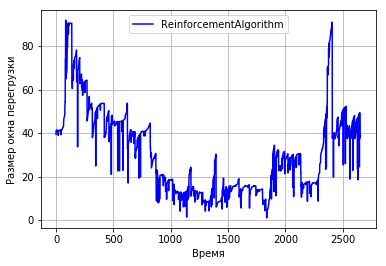

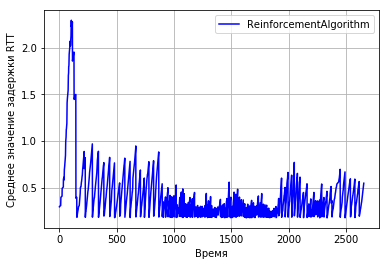

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 52029, 'square_avg': tensor([[5.1432e-24, 0.0000e+00],
        [6.7693e-26, 0.0000e+00],
        [2.5960e-26, 0.0000e+00],
        [1.0626e-26, 0.0000e+00],
        [5.7123e-29, 0.0000e+00],
        [3.6884e-26, 0.0000e+00],
        [2.8490e-27, 0.0000e+00],
        [2.4477e-25, 0.0000e+00],
        [1.6788e-28, 0.0000e+00],
        [1.1012e-26, 0.0000e+00],
        [6.4613e-28, 0.0000e+00],
        [1.3135e-30, 0.0000e+00],
        [5.7573e-28, 0.0000e+00],
        [3.9915e-27, 0.0000e+00],
        [5.4621e-26, 0.0000e+00],
        [5.6282e-24, 0.0000e+00],
        [3.4622e-30, 0.0000e+00],
        [1.8269e-25, 0.0000e+00],
        [2.1415e-25, 0.0000e+00],
        [8.7577e-30, 0.0000e+00],
        [4.4813e-30, 0.00

***Эпоха # 41***
[Отправитель] Подключен к получателю: 100.64.0.2:41774

Результаты для отправителя 38728, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3717.333333
Среднее значение задержки RTT (мс): 403.551382



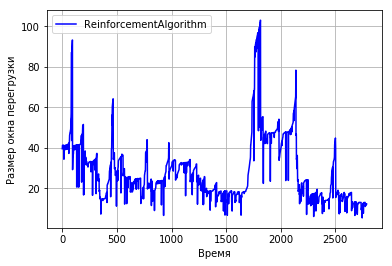

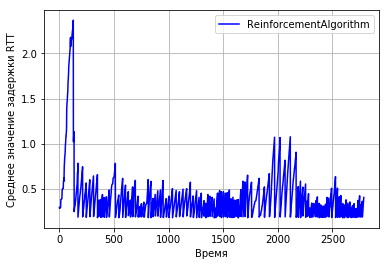

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 54303, 'square_avg': tensor([[4.5727e-24, 0.0000e+00],
        [6.1918e-26, 0.0000e+00],
        [2.0836e-26, 0.0000e+00],
        [9.1430e-27, 0.0000e+00],
        [4.0819e-29, 0.0000e+00],
        [3.4116e-26, 0.0000e+00],
        [2.8244e-27, 0.0000e+00],
        [1.6143e-25, 0.0000e+00],
        [2.0527e-28, 0.0000e+00],
        [9.0905e-27, 0.0000e+00],
        [3.1646e-28, 0.0000e+00],
        [2.0975e-29, 0.0000e+00],
        [3.5480e-28, 0.0000e+00],
        [2.3828e-27, 0.0000e+00],
        [4.2179e-26, 0.0000e+00],
        [2.5214e-24, 0.0000e+00],
        [2.3984e-30, 0.0000e+00],
        [1.5538e-25, 0.0000e+00],
        [1.2652e-25, 0.0000e+00],
        [1.1329e-29, 0.0000e+00],
        [3.1952e-30, 0.00

***Эпоха # 42***
[Отправитель] Подключен к получателю: 100.64.0.4:53170

Результаты для отправителя 47202, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3562.666667
Среднее значение задержки RTT (мс): 391.279577



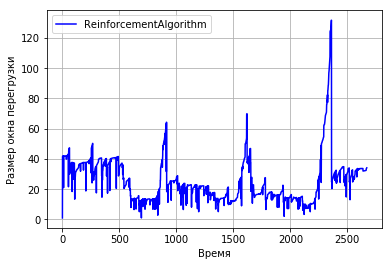

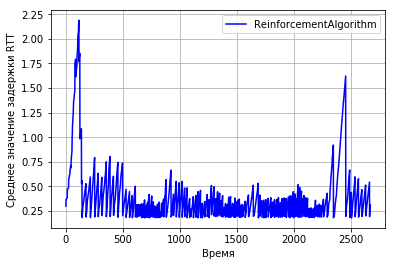

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 56517, 'square_avg': tensor([[1.6863e-24, 0.0000e+00],
        [9.0955e-25, 0.0000e+00],
        [3.9914e-25, 0.0000e+00],
        [4.4675e-26, 0.0000e+00],
        [3.2619e-28, 0.0000e+00],
        [5.8268e-25, 0.0000e+00],
        [1.5029e-23, 0.0000e+00],
        [5.0675e-21, 0.0000e+00],
        [8.5193e-21, 0.0000e+00],
        [1.2163e-25, 0.0000e+00],
        [3.6516e-26, 0.0000e+00],
        [6.3757e-27, 0.0000e+00],
        [5.4083e-25, 0.0000e+00],
        [3.1601e-23, 0.0000e+00],
        [1.2082e-24, 0.0000e+00],
        [2.4312e-22, 0.0000e+00],
        [7.7260e-31, 0.0000e+00],
        [3.6532e-26, 0.0000e+00],
        [7.4948e-26, 0.0000e+00],
        [2.2262e-30, 0.0000e+00],
        [9.4339e-31, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:52444

Результаты для отправителя 43258, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4668.000000
Среднее значение задержки RTT (мс): 711.086322



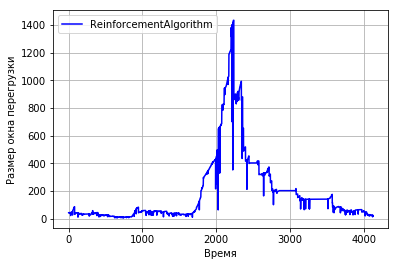

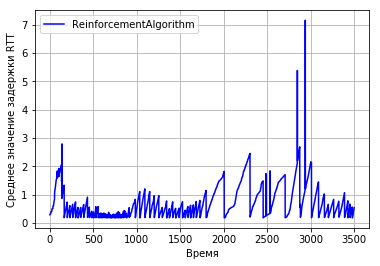

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 58935, 'square_avg': tensor([[5.6132e-25, 0.0000e+00],
        [2.4452e-23, 0.0000e+00],
        [1.1208e-24, 0.0000e+00],
        [2.7386e-25, 0.0000e+00],
        [7.6861e-25, 0.0000e+00],
        [1.7117e-25, 0.0000e+00],
        [6.3072e-21, 0.0000e+00],
        [6.7979e-16, 0.0000e+00],
        [3.4312e-23, 0.0000e+00],
        [9.4589e-20, 0.0000e+00],
        [2.2990e-24, 0.0000e+00],
        [1.0187e-25, 0.0000e+00],
        [2.4688e-23, 0.0000e+00],
        [6.7650e-19, 0.0000e+00],
        [5.7931e-19, 0.0000e+00],
        [2.1187e-21, 0.0000e+00],
        [9.1622e-25, 0.0000e+00],
        [1.1034e-23, 0.0000e+00],
        [3.5882e-21, 0.0000e+00],
        [5.6581e-25, 0.0000e+00],
        [3.2006e-26, 0.00

[Отправитель] Подключен к получателю: 100.64.0.4:56482

Результаты для отправителя 38557, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3848.000000
Среднее значение задержки RTT (мс): 426.359448



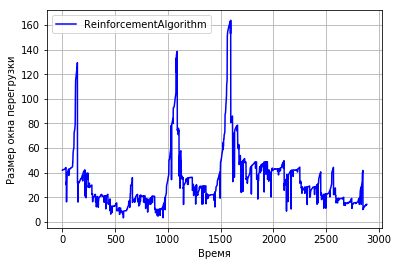

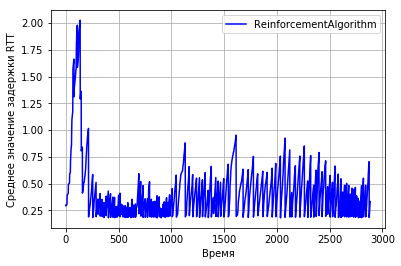

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 61246, 'square_avg': tensor([[1.3675e-24, 0.0000e+00],
        [1.9583e-26, 0.0000e+00],
        [2.2673e-26, 0.0000e+00],
        [5.2015e-27, 0.0000e+00],
        [4.6540e-29, 0.0000e+00],
        [9.9828e-27, 0.0000e+00],
        [3.0326e-27, 0.0000e+00],
        [5.4715e-20, 0.0000e+00],
        [2.3870e-27, 0.0000e+00],
        [5.6239e-24, 0.0000e+00],
        [1.1004e-27, 0.0000e+00],
        [3.5942e-28, 0.0000e+00],
        [1.2540e-26, 0.0000e+00],
        [4.5781e-26, 0.0000e+00],
        [7.1129e-26, 0.0000e+00],
        [9.3112e-24, 0.0000e+00],
        [7.8977e-27, 0.0000e+00],
        [1.3520e-24, 0.0000e+00],
        [2.8997e-23, 0.0000e+00],
        [1.7580e-27, 0.0000e+00],
        [7.3099e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:37667

Результаты для отправителя 38023, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3933.333333
Среднее значение задержки RTT (мс): 457.210743



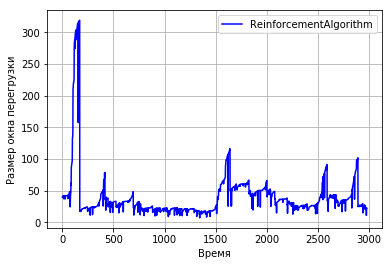

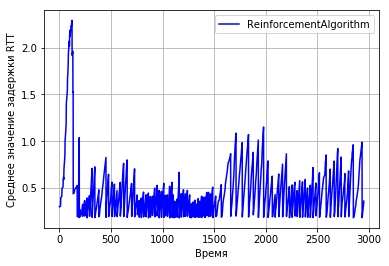

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 63621, 'square_avg': tensor([[1.5698e-24, 0.0000e+00],
        [5.5106e-26, 0.0000e+00],
        [1.9003e-26, 0.0000e+00],
        [4.3932e-27, 0.0000e+00],
        [2.4829e-28, 0.0000e+00],
        [4.2469e-26, 0.0000e+00],
        [6.6352e-27, 0.0000e+00],
        [1.5923e-24, 0.0000e+00],
        [2.9935e-26, 0.0000e+00],
        [3.0581e-27, 0.0000e+00],
        [1.0876e-23, 0.0000e+00],
        [5.0503e-28, 0.0000e+00],
        [2.0732e-27, 0.0000e+00],
        [7.5858e-26, 0.0000e+00],
        [4.2205e-26, 0.0000e+00],
        [3.3955e-24, 0.0000e+00],
        [1.8953e-30, 0.0000e+00],
        [1.7284e-25, 0.0000e+00],
        [2.7037e-25, 0.0000e+00],
        [3.4152e-30, 0.0000e+00],
        [3.9221e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.4:53397

Результаты для отправителя 39587, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4109.333333
Среднее значение задержки RTT (мс): 493.804658



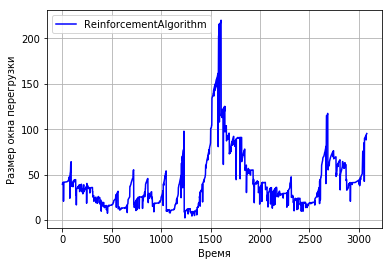

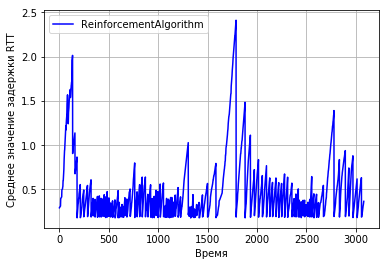

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 66048, 'square_avg': tensor([[1.9260e-24, 0.0000e+00],
        [2.9148e-26, 0.0000e+00],
        [1.4899e-26, 0.0000e+00],
        [5.8751e-27, 0.0000e+00],
        [2.2605e-29, 0.0000e+00],
        [2.0741e-26, 0.0000e+00],
        [3.6527e-28, 0.0000e+00],
        [4.2381e-26, 0.0000e+00],
        [1.4841e-28, 0.0000e+00],
        [3.6045e-27, 0.0000e+00],
        [2.8562e-28, 0.0000e+00],
        [1.0629e-28, 0.0000e+00],
        [7.6558e-29, 0.0000e+00],
        [2.5956e-27, 0.0000e+00],
        [3.1048e-26, 0.0000e+00],
        [9.8814e-24, 0.0000e+00],
        [1.7048e-30, 0.0000e+00],
        [1.3551e-25, 0.0000e+00],
        [2.3967e-25, 0.0000e+00],
        [2.3647e-30, 0.0000e+00],
        [3.0385e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:37232

Результаты для отправителя 52530, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4250.666667
Среднее значение задержки RTT (мс): 500.871578



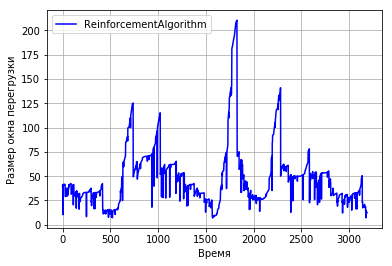

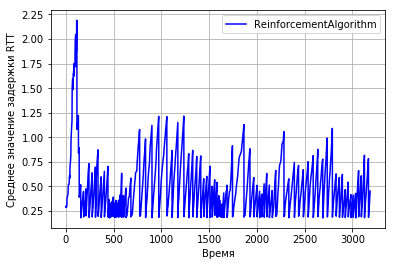

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 68588, 'square_avg': tensor([[1.8518e-24, 0.0000e+00],
        [2.1814e-26, 0.0000e+00],
        [1.0618e-26, 0.0000e+00],
        [4.4837e-27, 0.0000e+00],
        [2.7631e-29, 0.0000e+00],
        [1.6016e-26, 0.0000e+00],
        [2.0378e-28, 0.0000e+00],
        [2.0682e-26, 0.0000e+00],
        [1.9110e-28, 0.0000e+00],
        [2.9152e-27, 0.0000e+00],
        [5.5539e-28, 0.0000e+00],
        [8.3515e-31, 0.0000e+00],
        [1.2585e-28, 0.0000e+00],
        [9.0197e-28, 0.0000e+00],
        [1.9764e-26, 0.0000e+00],
        [6.4062e-24, 0.0000e+00],
        [1.7907e-30, 0.0000e+00],
        [1.6825e-25, 0.0000e+00],
        [2.1252e-25, 0.0000e+00],
        [4.6790e-30, 0.0000e+00],
        [3.2129e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:37649

Результаты для отправителя 43630, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3605.333333
Среднее значение задержки RTT (мс): 437.327669



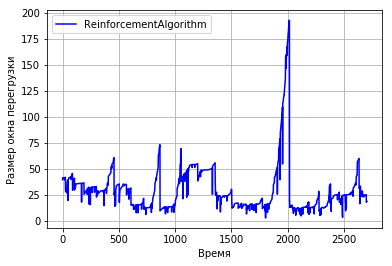

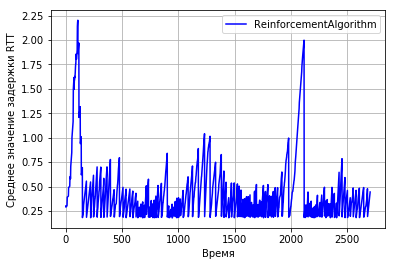

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 70824, 'square_avg': tensor([[1.2383e-25, 0.0000e+00],
        [1.5562e-26, 0.0000e+00],
        [2.4001e-26, 0.0000e+00],
        [5.0077e-27, 0.0000e+00],
        [2.5056e-29, 0.0000e+00],
        [5.0492e-27, 0.0000e+00],
        [1.3228e-26, 0.0000e+00],
        [2.5086e-17, 0.0000e+00],
        [2.7938e-26, 0.0000e+00],
        [5.0613e-27, 0.0000e+00],
        [6.7309e-27, 0.0000e+00],
        [1.2001e-28, 0.0000e+00],
        [4.4855e-25, 0.0000e+00],
        [1.6291e-25, 0.0000e+00],
        [8.5645e-26, 0.0000e+00],
        [1.9387e-23, 0.0000e+00],
        [9.7551e-27, 0.0000e+00],
        [5.7245e-23, 0.0000e+00],
        [1.1504e-21, 0.0000e+00],
        [2.3646e-27, 0.0000e+00],
        [2.5097e-28, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:42076

Результаты для отправителя 52580, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4408.000000
Среднее значение задержки RTT (мс): 651.622496



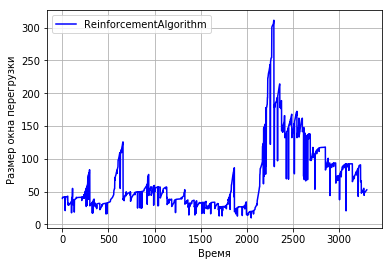

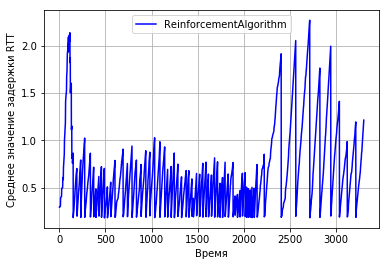

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 73409, 'square_avg': tensor([[9.8418e-25, 0.0000e+00],
        [1.5635e-26, 0.0000e+00],
        [1.2668e-26, 0.0000e+00],
        [3.8724e-27, 0.0000e+00],
        [3.1826e-29, 0.0000e+00],
        [9.2751e-27, 0.0000e+00],
        [1.1967e-27, 0.0000e+00],
        [3.4906e-25, 0.0000e+00],
        [1.1148e-26, 0.0000e+00],
        [2.4064e-27, 0.0000e+00],
        [2.2390e-28, 0.0000e+00],
        [1.0769e-27, 0.0000e+00],
        [1.2816e-28, 0.0000e+00],
        [1.6407e-27, 0.0000e+00],
        [3.2537e-26, 0.0000e+00],
        [2.1994e-24, 0.0000e+00],
        [1.4228e-30, 0.0000e+00],
        [1.1183e-25, 0.0000e+00],
        [2.2661e-25, 0.0000e+00],
        [3.3352e-30, 0.0000e+00],
        [2.7736e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:57033

Результаты для отправителя 56310, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4245.333333
Среднее значение задержки RTT (мс): 742.251578



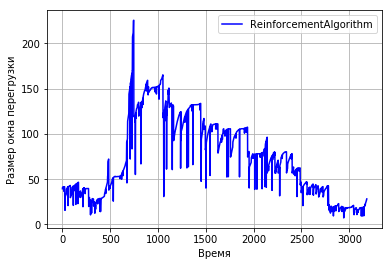

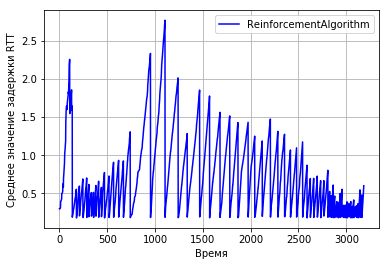

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 75971, 'square_avg': tensor([[1.3301e-24, 0.0000e+00],
        [2.0419e-26, 0.0000e+00],
        [9.3368e-27, 0.0000e+00],
        [3.9619e-27, 0.0000e+00],
        [1.4261e-29, 0.0000e+00],
        [1.5225e-26, 0.0000e+00],
        [4.3738e-28, 0.0000e+00],
        [3.6012e-26, 0.0000e+00],
        [1.3983e-28, 0.0000e+00],
        [2.5016e-27, 0.0000e+00],
        [3.4871e-28, 0.0000e+00],
        [4.7439e-30, 0.0000e+00],
        [5.4496e-29, 0.0000e+00],
        [6.7807e-28, 0.0000e+00],
        [1.8728e-26, 0.0000e+00],
        [3.7292e-24, 0.0000e+00],
        [1.2282e-30, 0.0000e+00],
        [1.1872e-25, 0.0000e+00],
        [1.5518e-25, 0.0000e+00],
        [3.8758e-30, 0.0000e+00],
        [2.1444e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:44800

Результаты для отправителя 49445, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4605.333333
Среднее значение задержки RTT (мс): 729.415239



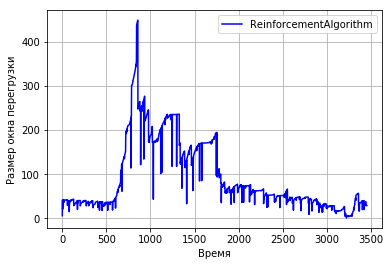

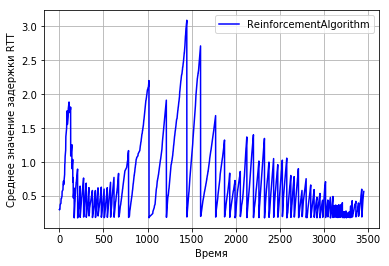

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 78658, 'square_avg': tensor([[1.1511e-24, 0.0000e+00],
        [1.2760e-26, 0.0000e+00],
        [6.0986e-27, 0.0000e+00],
        [2.5637e-27, 0.0000e+00],
        [1.5319e-29, 0.0000e+00],
        [9.6656e-27, 0.0000e+00],
        [1.8204e-28, 0.0000e+00],
        [7.9902e-26, 0.0000e+00],
        [6.1190e-29, 0.0000e+00],
        [1.8089e-27, 0.0000e+00],
        [2.8053e-28, 0.0000e+00],
        [6.5846e-31, 0.0000e+00],
        [3.7108e-29, 0.0000e+00],
        [1.1525e-27, 0.0000e+00],
        [1.2802e-26, 0.0000e+00],
        [4.1650e-24, 0.0000e+00],
        [1.2335e-30, 0.0000e+00],
        [1.3736e-25, 0.0000e+00],
        [1.3085e-25, 0.0000e+00],
        [5.0251e-30, 0.0000e+00],
        [1.9247e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:59685

Результаты для отправителя 57205, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4345.333333
Среднее значение задержки RTT (мс): 485.730630



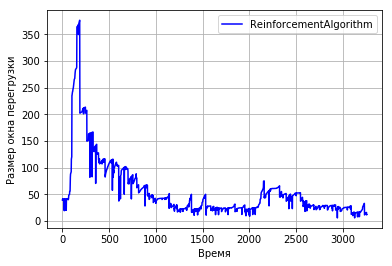

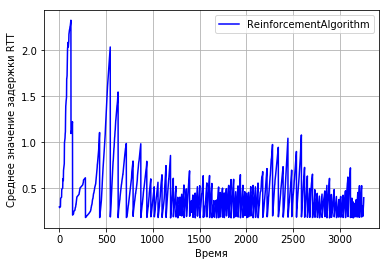

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 81227, 'square_avg': tensor([[6.0249e-25, 0.0000e+00],
        [8.7507e-27, 0.0000e+00],
        [8.9414e-27, 0.0000e+00],
        [2.5432e-27, 0.0000e+00],
        [2.9069e-29, 0.0000e+00],
        [4.6581e-27, 0.0000e+00],
        [2.9447e-27, 0.0000e+00],
        [4.7811e-25, 0.0000e+00],
        [1.6506e-26, 0.0000e+00],
        [1.4814e-27, 0.0000e+00],
        [2.8083e-28, 0.0000e+00],
        [9.6126e-31, 0.0000e+00],
        [1.7220e-29, 0.0000e+00],
        [5.8242e-27, 0.0000e+00],
        [2.4040e-26, 0.0000e+00],
        [8.2386e-25, 0.0000e+00],
        [9.0052e-31, 0.0000e+00],
        [1.0692e-25, 0.0000e+00],
        [9.4681e-26, 0.0000e+00],
        [6.3346e-30, 0.0000e+00],
        [1.6654e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:52126

Результаты для отправителя 52912, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3952.000000
Среднее значение задержки RTT (мс): 478.268845



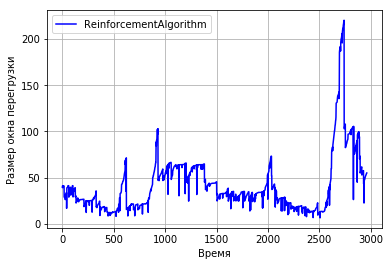

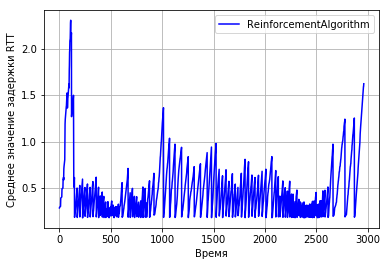

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 83612, 'square_avg': tensor([[3.7874e-25, 0.0000e+00],
        [4.6431e-27, 0.0000e+00],
        [3.9924e-27, 0.0000e+00],
        [1.2834e-27, 0.0000e+00],
        [2.1157e-29, 0.0000e+00],
        [2.5813e-27, 0.0000e+00],
        [6.4098e-28, 0.0000e+00],
        [5.6881e-26, 0.0000e+00],
        [3.1247e-29, 0.0000e+00],
        [1.1351e-27, 0.0000e+00],
        [4.1598e-28, 0.0000e+00],
        [7.6171e-30, 0.0000e+00],
        [8.6261e-29, 0.0000e+00],
        [1.0613e-27, 0.0000e+00],
        [1.0044e-26, 0.0000e+00],
        [5.3865e-24, 0.0000e+00],
        [1.2731e-30, 0.0000e+00],
        [1.3072e-25, 0.0000e+00],
        [1.3753e-25, 0.0000e+00],
        [4.1892e-30, 0.0000e+00],
        [1.8340e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:35388

Результаты для отправителя 55856, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4402.666667
Среднее значение задержки RTT (мс): 583.673091



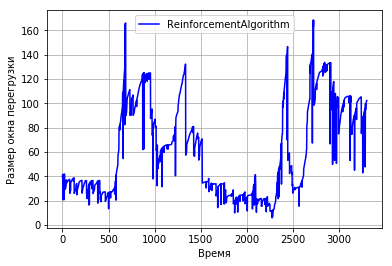

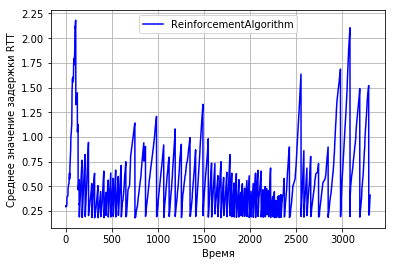

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 86212, 'square_avg': tensor([[3.3637e-25, 0.0000e+00],
        [5.5107e-27, 0.0000e+00],
        [5.8933e-27, 0.0000e+00],
        [1.5191e-27, 0.0000e+00],
        [2.3979e-29, 0.0000e+00],
        [2.6822e-27, 0.0000e+00],
        [1.9657e-27, 0.0000e+00],
        [3.0276e-25, 0.0000e+00],
        [1.7784e-27, 0.0000e+00],
        [1.2314e-27, 0.0000e+00],
        [4.7326e-29, 0.0000e+00],
        [2.1626e-29, 0.0000e+00],
        [3.6736e-28, 0.0000e+00],
        [4.6374e-27, 0.0000e+00],
        [1.5312e-26, 0.0000e+00],
        [1.2403e-24, 0.0000e+00],
        [9.2388e-31, 0.0000e+00],
        [9.5216e-26, 0.0000e+00],
        [2.4114e-25, 0.0000e+00],
        [3.5078e-30, 0.0000e+00],
        [1.5530e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.4:45222

Результаты для отправителя 42411, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4482.666667
Среднее значение задержки RTT (мс): 632.828583



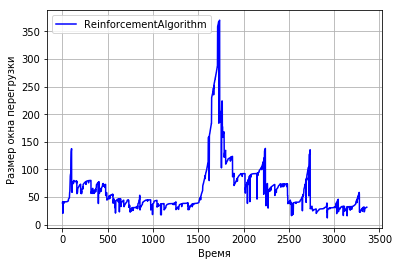

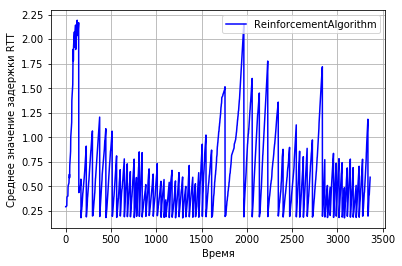

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 88886, 'square_avg': tensor([[7.0600e-25, 0.0000e+00],
        [7.4217e-27, 0.0000e+00],
        [4.0943e-27, 0.0000e+00],
        [1.5979e-27, 0.0000e+00],
        [2.1308e-29, 0.0000e+00],
        [5.1629e-27, 0.0000e+00],
        [2.5391e-28, 0.0000e+00],
        [3.1605e-26, 0.0000e+00],
        [4.5252e-29, 0.0000e+00],
        [1.3199e-27, 0.0000e+00],
        [5.0591e-28, 0.0000e+00],
        [1.6432e-30, 0.0000e+00],
        [2.6503e-29, 0.0000e+00],
        [6.7598e-28, 0.0000e+00],
        [6.9149e-27, 0.0000e+00],
        [3.9848e-24, 0.0000e+00],
        [1.1243e-30, 0.0000e+00],
        [1.3174e-25, 0.0000e+00],
        [1.4353e-25, 0.0000e+00],
        [5.9471e-30, 0.0000e+00],
        [1.9292e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:48741

Результаты для отправителя 32823, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4866.666667
Среднее значение задержки RTT (мс): 712.134494



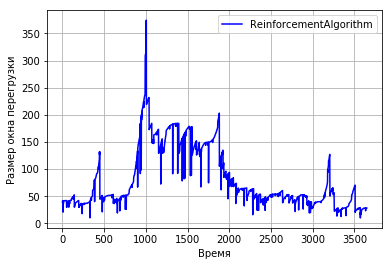

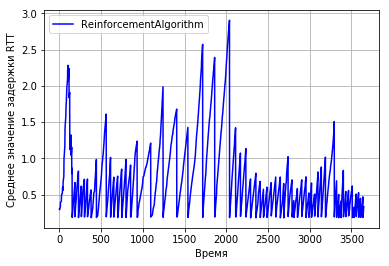

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 91801, 'square_avg': tensor([[5.0147e-25, 0.0000e+00],
        [6.2166e-27, 0.0000e+00],
        [3.3744e-27, 0.0000e+00],
        [1.4172e-27, 0.0000e+00],
        [2.4300e-29, 0.0000e+00],
        [4.0756e-27, 0.0000e+00],
        [3.8377e-28, 0.0000e+00],
        [4.0649e-26, 0.0000e+00],
        [1.0740e-28, 0.0000e+00],
        [1.3601e-27, 0.0000e+00],
        [5.4157e-28, 0.0000e+00],
        [1.0576e-29, 0.0000e+00],
        [1.9515e-29, 0.0000e+00],
        [4.5774e-28, 0.0000e+00],
        [4.2560e-27, 0.0000e+00],
        [5.6194e-24, 0.0000e+00],
        [1.2068e-30, 0.0000e+00],
        [1.6011e-25, 0.0000e+00],
        [1.4285e-25, 0.0000e+00],
        [9.6847e-30, 0.0000e+00],
        [2.0989e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:47378

Результаты для отправителя 46460, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 3868.000000
Среднее значение задержки RTT (мс): 424.402056



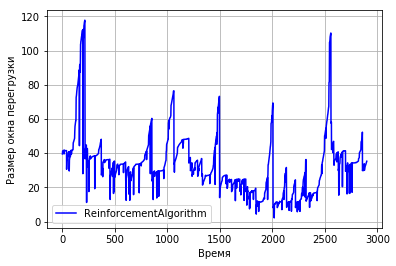

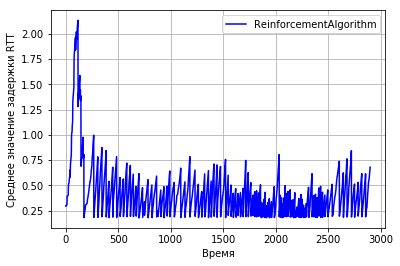

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 94201, 'square_avg': tensor([[1.6981e-28, 0.0000e+00],
        [4.0904e-24, 0.0000e+00],
        [8.7437e-25, 0.0000e+00],
        [6.3517e-25, 0.0000e+00],
        [5.3942e-26, 0.0000e+00],
        [1.9566e-24, 0.0000e+00],
        [1.3516e-24, 0.0000e+00],
        [8.2287e-24, 0.0000e+00],
        [2.4125e-24, 0.0000e+00],
        [4.3776e-27, 0.0000e+00],
        [6.0410e-25, 0.0000e+00],
        [2.4079e-21, 0.0000e+00],
        [5.3439e-25, 0.0000e+00],
        [4.1042e-26, 0.0000e+00],
        [9.1039e-25, 0.0000e+00],
        [3.0433e-23, 0.0000e+00],
        [1.7014e-30, 0.0000e+00],
        [4.2111e-26, 0.0000e+00],
        [1.0857e-25, 0.0000e+00],
        [1.0208e-27, 0.0000e+00],
        [2.8031e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:57694

Результаты для отправителя 59430, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4386.666667
Среднее значение задержки RTT (мс): 926.040732



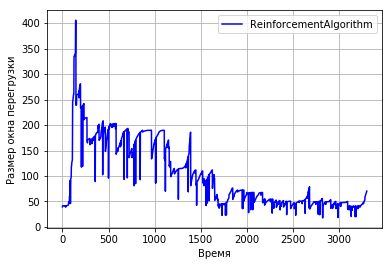

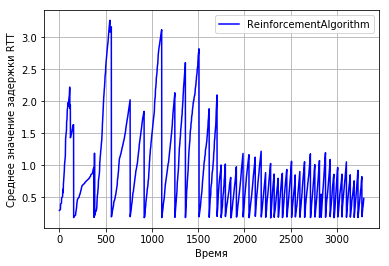

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 96712, 'square_avg': tensor([[2.5435e-25, 0.0000e+00],
        [8.3111e-27, 0.0000e+00],
        [4.8461e-27, 0.0000e+00],
        [1.8802e-27, 0.0000e+00],
        [1.8796e-29, 0.0000e+00],
        [4.9302e-27, 0.0000e+00],
        [2.3186e-28, 0.0000e+00],
        [6.0582e-26, 0.0000e+00],
        [6.0019e-29, 0.0000e+00],
        [2.2784e-27, 0.0000e+00],
        [4.7089e-28, 0.0000e+00],
        [1.7260e-29, 0.0000e+00],
        [1.7049e-29, 0.0000e+00],
        [3.2074e-28, 0.0000e+00],
        [7.7954e-27, 0.0000e+00],
        [4.9174e-24, 0.0000e+00],
        [1.0814e-30, 0.0000e+00],
        [1.1264e-25, 0.0000e+00],
        [1.7544e-25, 0.0000e+00],
        [3.7501e-30, 0.0000e+00],
        [1.8350e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:37407

Результаты для отправителя 53037, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4981.333333
Среднее значение задержки RTT (мс): 1097.891210



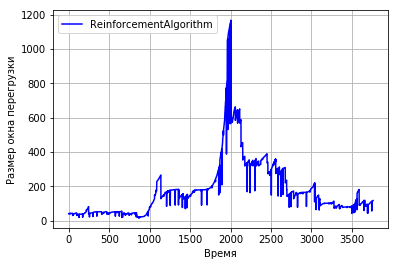

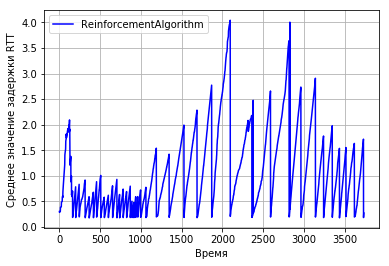

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 99445, 'square_avg': tensor([[3.4516e-25, 0.0000e+00],
        [6.7834e-27, 0.0000e+00],
        [4.0109e-27, 0.0000e+00],
        [1.5235e-27, 0.0000e+00],
        [2.0698e-29, 0.0000e+00],
        [4.1245e-27, 0.0000e+00],
        [3.1760e-28, 0.0000e+00],
        [8.4816e-26, 0.0000e+00],
        [8.1245e-29, 0.0000e+00],
        [2.7317e-27, 0.0000e+00],
        [3.8066e-28, 0.0000e+00],
        [5.4088e-30, 0.0000e+00],
        [2.0755e-29, 0.0000e+00],
        [6.5208e-28, 0.0000e+00],
        [6.7908e-27, 0.0000e+00],
        [5.6090e-24, 0.0000e+00],
        [1.1741e-30, 0.0000e+00],
        [1.3705e-25, 0.0000e+00],
        [1.6748e-25, 0.0000e+00],
        [5.3587e-30, 0.0000e+00],
        [1.8109e-30, 0.00

[Отправитель] Подключен к получателю: 100.64.0.2:58514

Результаты для отправителя 47010, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4828.000000
Среднее значение задержки RTT (мс): 908.581006



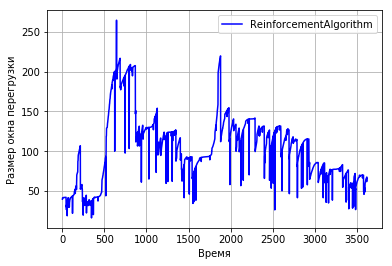

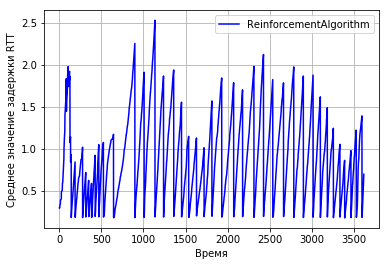

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 102291, 'square_avg': tensor([[7.4838e-29, 0.0000e+00],
        [1.1841e-26, 0.0000e+00],
        [3.4273e-26, 0.0000e+00],
        [3.6810e-27, 0.0000e+00],
        [6.1870e-29, 0.0000e+00],
        [3.6771e-26, 0.0000e+00],
        [2.2171e-26, 0.0000e+00],
        [2.0111e-22, 0.0000e+00],
        [3.0683e-25, 0.0000e+00],
        [2.8644e-25, 0.0000e+00],
        [5.2733e-26, 0.0000e+00],
        [7.9585e-29, 0.0000e+00],
        [5.7058e-23, 0.0000e+00],
        [2.1051e-24, 0.0000e+00],
        [1.0044e-25, 0.0000e+00],
        [4.2930e-23, 0.0000e+00],
        [1.3069e-31, 0.0000e+00],
        [1.8419e-26, 0.0000e+00],
        [1.6550e-26, 0.0000e+00],
        [3.1037e-31, 0.0000e+00],
        [7.2169e-32, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:57208

Результаты для отправителя 43579, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4512.000000
Среднее значение задержки RTT (мс): 608.320653



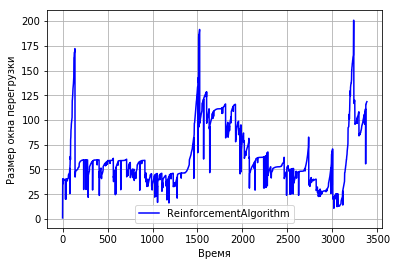

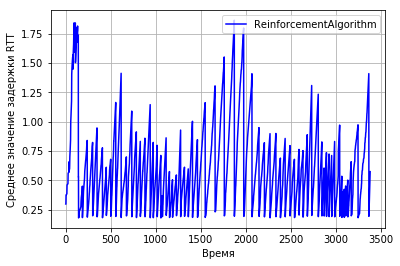

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 105002, 'square_avg': tensor([[1.7496e-26, 0.0000e+00],
        [3.2409e-27, 0.0000e+00],
        [4.3481e-27, 0.0000e+00],
        [1.1258e-27, 0.0000e+00],
        [2.2602e-29, 0.0000e+00],
        [9.2742e-28, 0.0000e+00],
        [2.5507e-27, 0.0000e+00],
        [2.0413e-25, 0.0000e+00],
        [4.1480e-27, 0.0000e+00],
        [1.3137e-27, 0.0000e+00],
        [2.3538e-28, 0.0000e+00],
        [3.8803e-29, 0.0000e+00],
        [7.1044e-28, 0.0000e+00],
        [3.1803e-27, 0.0000e+00],
        [9.3319e-27, 0.0000e+00],
        [3.9865e-24, 0.0000e+00],
        [1.1844e-30, 0.0000e+00],
        [1.3015e-25, 0.0000e+00],
        [1.8446e-25, 0.0000e+00],
        [3.5860e-30, 0.0000e+00],
        [1.6584e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:34116

Результаты для отправителя 45085, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4774.666667
Среднее значение задержки RTT (мс): 717.007999



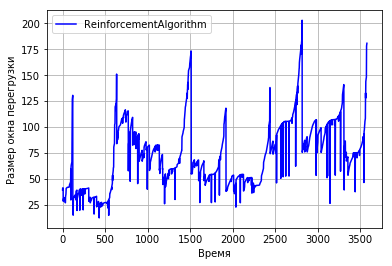

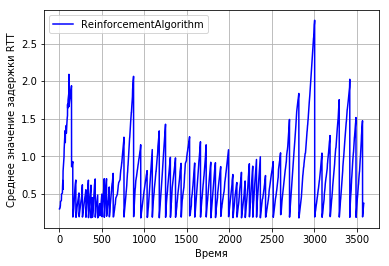

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 107897, 'square_avg': tensor([[1.5569e-28, 0.0000e+00],
        [3.4902e-26, 0.0000e+00],
        [1.0288e-24, 0.0000e+00],
        [1.0785e-26, 0.0000e+00],
        [1.8757e-27, 0.0000e+00],
        [5.9539e-24, 0.0000e+00],
        [7.6885e-25, 0.0000e+00],
        [3.5337e-21, 0.0000e+00],
        [2.2531e-22, 0.0000e+00],
        [2.6889e-24, 0.0000e+00],
        [1.8805e-24, 0.0000e+00],
        [1.0808e-27, 0.0000e+00],
        [2.2701e-20, 0.0000e+00],
        [3.1709e-24, 0.0000e+00],
        [4.6547e-25, 0.0000e+00],
        [9.2526e-23, 0.0000e+00],
        [2.3045e-31, 0.0000e+00],
        [2.9747e-26, 0.0000e+00],
        [3.3176e-26, 0.0000e+00],
        [2.9178e-30, 0.0000e+00],
        [3.5480e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:39994

Результаты для отправителя 42021, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4948.000000
Среднее значение задержки RTT (мс): 756.914617



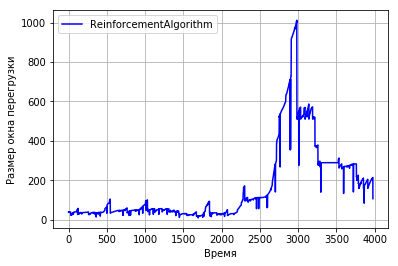

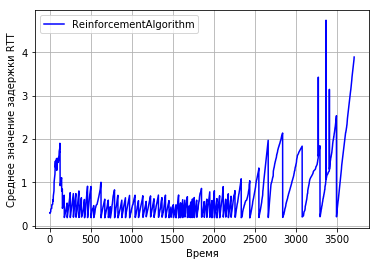

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 110586, 'square_avg': tensor([[1.5134e-29, 0.0000e+00],
        [1.7682e-27, 0.0000e+00],
        [2.1343e-27, 0.0000e+00],
        [6.3888e-28, 0.0000e+00],
        [2.6816e-29, 0.0000e+00],
        [3.5666e-28, 0.0000e+00],
        [2.7437e-27, 0.0000e+00],
        [5.6532e-25, 0.0000e+00],
        [3.0429e-28, 0.0000e+00],
        [1.1155e-27, 0.0000e+00],
        [9.4746e-28, 0.0000e+00],
        [1.4191e-30, 0.0000e+00],
        [5.3411e-28, 0.0000e+00],
        [6.4755e-27, 0.0000e+00],
        [1.0245e-27, 0.0000e+00],
        [1.6117e-23, 0.0000e+00],
        [1.6063e-30, 0.0000e+00],
        [2.0552e-25, 0.0000e+00],
        [2.2493e-25, 0.0000e+00],
        [9.3237e-30, 0.0000e+00],
        [2.7114e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:42439

Результаты для отправителя 60627, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5116.000000
Среднее значение задержки RTT (мс): 960.598175



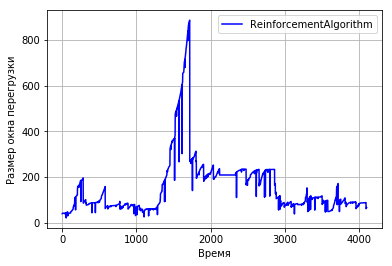

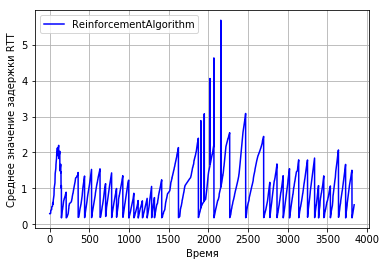

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 113387, 'square_avg': tensor([[2.1985e-27, 0.0000e+00],
        [3.1278e-27, 0.0000e+00],
        [5.2221e-27, 0.0000e+00],
        [9.4865e-28, 0.0000e+00],
        [7.0291e-30, 0.0000e+00],
        [8.9166e-28, 0.0000e+00],
        [4.2531e-27, 0.0000e+00],
        [1.6950e-24, 0.0000e+00],
        [4.6311e-27, 0.0000e+00],
        [1.6071e-27, 0.0000e+00],
        [1.5259e-27, 0.0000e+00],
        [9.4851e-27, 0.0000e+00],
        [2.1120e-27, 0.0000e+00],
        [5.4215e-26, 0.0000e+00],
        [2.0147e-26, 0.0000e+00],
        [3.9974e-24, 0.0000e+00],
        [3.8244e-31, 0.0000e+00],
        [4.9676e-26, 0.0000e+00],
        [6.5736e-26, 0.0000e+00],
        [8.1438e-31, 0.0000e+00],
        [3.3575e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:37140

Результаты для отправителя 33545, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5314.666667
Среднее значение задержки RTT (мс): 987.073638



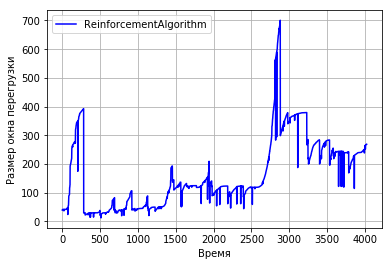

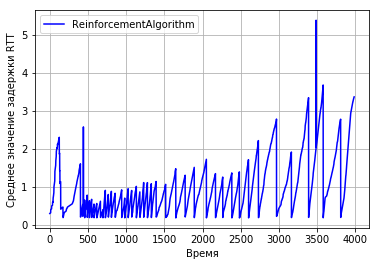

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 116340, 'square_avg': tensor([[3.3911e-25, 0.0000e+00],
        [5.1432e-27, 0.0000e+00],
        [2.5926e-27, 0.0000e+00],
        [1.0013e-27, 0.0000e+00],
        [9.2867e-30, 0.0000e+00],
        [3.4407e-27, 0.0000e+00],
        [2.2363e-28, 0.0000e+00],
        [8.2723e-26, 0.0000e+00],
        [1.3585e-28, 0.0000e+00],
        [1.6663e-27, 0.0000e+00],
        [6.6214e-28, 0.0000e+00],
        [1.0408e-29, 0.0000e+00],
        [3.0833e-29, 0.0000e+00],
        [2.5753e-27, 0.0000e+00],
        [5.1562e-27, 0.0000e+00],
        [8.0874e-24, 0.0000e+00],
        [1.2501e-30, 0.0000e+00],
        [1.5638e-25, 0.0000e+00],
        [1.7082e-25, 0.0000e+00],
        [3.5050e-30, 0.0000e+00],
        [1.4208e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:50124

Результаты для отправителя 55385, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5066.666667
Среднее значение задержки RTT (мс): 1017.943714



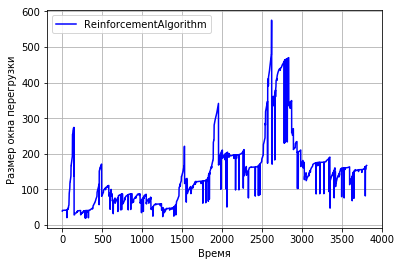

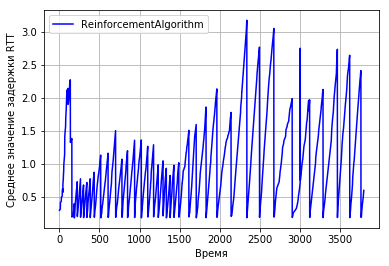

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 119131, 'square_avg': tensor([[2.9716e-29, 0.0000e+00],
        [4.0712e-27, 0.0000e+00],
        [6.6318e-27, 0.0000e+00],
        [1.2710e-27, 0.0000e+00],
        [7.2837e-30, 0.0000e+00],
        [1.1924e-27, 0.0000e+00],
        [4.9616e-27, 0.0000e+00],
        [6.7335e-25, 0.0000e+00],
        [1.7501e-26, 0.0000e+00],
        [1.4305e-27, 0.0000e+00],
        [1.6232e-27, 0.0000e+00],
        [3.4997e-29, 0.0000e+00],
        [1.2625e-26, 0.0000e+00],
        [4.0745e-26, 0.0000e+00],
        [2.5989e-26, 0.0000e+00],
        [4.3424e-24, 0.0000e+00],
        [5.6473e-31, 0.0000e+00],
        [8.6031e-26, 0.0000e+00],
        [7.0138e-26, 0.0000e+00],
        [1.2198e-30, 0.0000e+00],
        [3.4089e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:40105

Результаты для отправителя 43670, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4785.333333
Среднее значение задержки RTT (мс): 646.815511



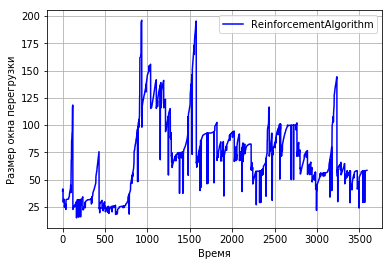

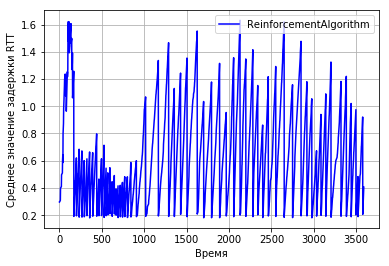

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 121995, 'square_avg': tensor([[2.3028e-26, 0.0000e+00],
        [1.0276e-27, 0.0000e+00],
        [7.5033e-28, 0.0000e+00],
        [2.9332e-28, 0.0000e+00],
        [1.3187e-29, 0.0000e+00],
        [3.2509e-28, 0.0000e+00],
        [5.0752e-28, 0.0000e+00],
        [9.0268e-26, 0.0000e+00],
        [1.3290e-28, 0.0000e+00],
        [1.1151e-27, 0.0000e+00],
        [1.2216e-27, 0.0000e+00],
        [1.3296e-30, 0.0000e+00],
        [4.4201e-29, 0.0000e+00],
        [6.2886e-27, 0.0000e+00],
        [4.2249e-28, 0.0000e+00],
        [1.6696e-23, 0.0000e+00],
        [2.3902e-30, 0.0000e+00],
        [3.1404e-25, 0.0000e+00],
        [2.3223e-25, 0.0000e+00],
        [8.2727e-30, 0.0000e+00],
        [2.2073e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:44392

Результаты для отправителя 51781, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5437.333333
Среднее значение задержки RTT (мс): 1656.094171



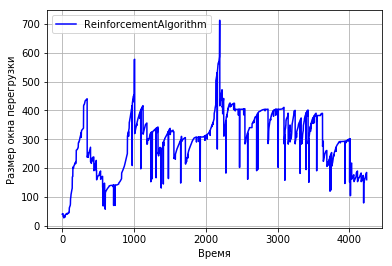

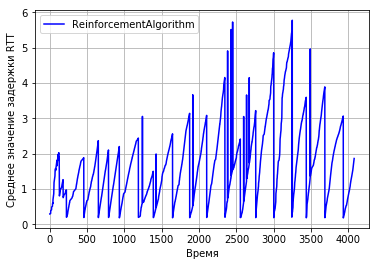

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 124723, 'square_avg': tensor([[1.3209e-27, 0.0000e+00],
        [2.1484e-27, 0.0000e+00],
        [3.1164e-27, 0.0000e+00],
        [6.0214e-28, 0.0000e+00],
        [4.9514e-30, 0.0000e+00],
        [6.3468e-28, 0.0000e+00],
        [1.9697e-27, 0.0000e+00],
        [8.5861e-25, 0.0000e+00],
        [1.5907e-27, 0.0000e+00],
        [1.3029e-26, 0.0000e+00],
        [5.6915e-28, 0.0000e+00],
        [1.9393e-26, 0.0000e+00],
        [1.4765e-27, 0.0000e+00],
        [8.2623e-27, 0.0000e+00],
        [1.0889e-26, 0.0000e+00],
        [1.1576e-23, 0.0000e+00],
        [3.9470e-30, 0.0000e+00],
        [2.3151e-25, 0.0000e+00],
        [1.5252e-25, 0.0000e+00],
        [1.1848e-30, 0.0000e+00],
        [5.3733e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:42331

Результаты для отправителя 37123, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4422.666667
Среднее значение задержки RTT (мс): 921.632306



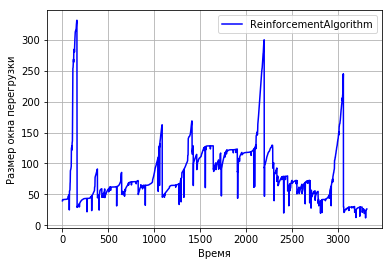

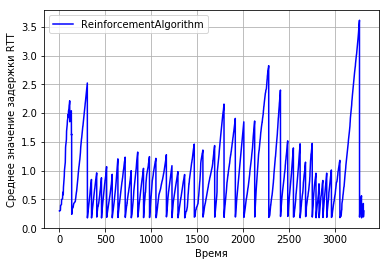

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 127368, 'square_avg': tensor([[2.6393e-25, 0.0000e+00],
        [3.4642e-27, 0.0000e+00],
        [1.8419e-27, 0.0000e+00],
        [5.9886e-28, 0.0000e+00],
        [6.4002e-30, 0.0000e+00],
        [2.2309e-27, 0.0000e+00],
        [9.3281e-28, 0.0000e+00],
        [1.0496e-24, 0.0000e+00],
        [1.6038e-28, 0.0000e+00],
        [1.3869e-26, 0.0000e+00],
        [7.0345e-28, 0.0000e+00],
        [9.9486e-30, 0.0000e+00],
        [5.1352e-29, 0.0000e+00],
        [1.2421e-26, 0.0000e+00],
        [4.2512e-27, 0.0000e+00],
        [7.5080e-23, 0.0000e+00],
        [5.3539e-30, 0.0000e+00],
        [4.4167e-25, 0.0000e+00],
        [3.0866e-25, 0.0000e+00],
        [3.8482e-30, 0.0000e+00],
        [1.6182e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:38203

Результаты для отправителя 54261, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4620.000000
Среднее значение задержки RTT (мс): 686.059875



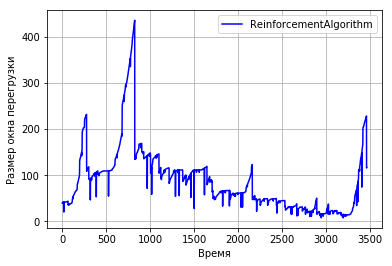

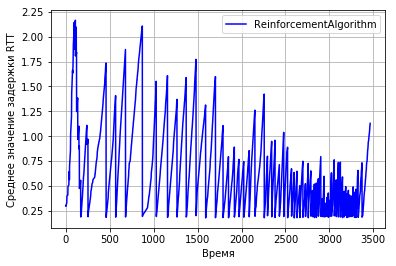

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 130098, 'square_avg': tensor([[2.3734e-29, 0.0000e+00],
        [2.5117e-27, 0.0000e+00],
        [3.9051e-27, 0.0000e+00],
        [7.3335e-28, 0.0000e+00],
        [4.3772e-30, 0.0000e+00],
        [7.6020e-28, 0.0000e+00],
        [2.5367e-27, 0.0000e+00],
        [3.8650e-25, 0.0000e+00],
        [1.3432e-26, 0.0000e+00],
        [3.5823e-27, 0.0000e+00],
        [1.0304e-27, 0.0000e+00],
        [4.5910e-29, 0.0000e+00],
        [7.6696e-28, 0.0000e+00],
        [1.3117e-26, 0.0000e+00],
        [1.4917e-26, 0.0000e+00],
        [9.8979e-24, 0.0000e+00],
        [8.7844e-31, 0.0000e+00],
        [1.0046e-25, 0.0000e+00],
        [6.8018e-26, 0.0000e+00],
        [9.2808e-31, 0.0000e+00],
        [3.0038e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:58430

Результаты для отправителя 39840, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4358.666667
Среднее значение задержки RTT (мс): 576.910181



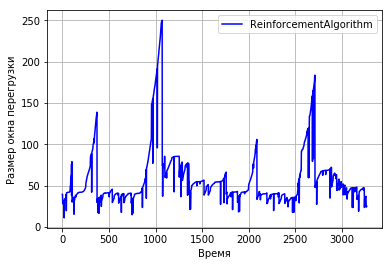

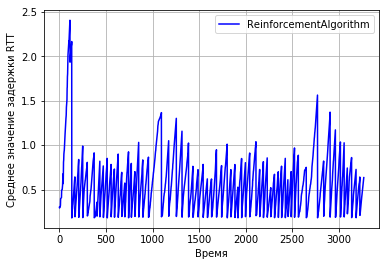

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 132764, 'square_avg': tensor([[3.6664e-25, 0.0000e+00],
        [2.3951e-27, 0.0000e+00],
        [1.4424e-27, 0.0000e+00],
        [4.3168e-28, 0.0000e+00],
        [7.4558e-30, 0.0000e+00],
        [1.6178e-27, 0.0000e+00],
        [3.1180e-28, 0.0000e+00],
        [2.6092e-25, 0.0000e+00],
        [2.1904e-28, 0.0000e+00],
        [3.9910e-27, 0.0000e+00],
        [4.6545e-28, 0.0000e+00],
        [1.9265e-30, 0.0000e+00],
        [1.3956e-29, 0.0000e+00],
        [6.2055e-27, 0.0000e+00],
        [3.8869e-27, 0.0000e+00],
        [1.6224e-22, 0.0000e+00],
        [2.3306e-30, 0.0000e+00],
        [2.6590e-25, 0.0000e+00],
        [1.7880e-25, 0.0000e+00],
        [4.5415e-30, 0.0000e+00],
        [1.4201e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:49558

Результаты для отправителя 36830, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5825.333333
Среднее значение задержки RTT (мс): 1324.682636



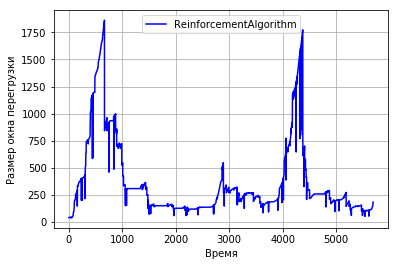

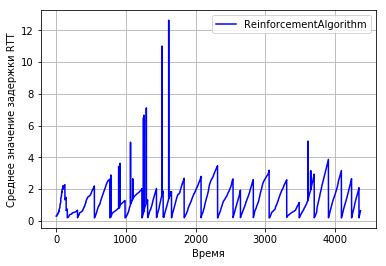

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 135378, 'square_avg': tensor([[3.5025e-27, 0.0000e+00],
        [4.0999e-25, 0.0000e+00],
        [7.2915e-25, 0.0000e+00],
        [3.4187e-20, 0.0000e+00],
        [3.6835e-29, 0.0000e+00],
        [4.4347e-25, 0.0000e+00],
        [2.0110e-24, 0.0000e+00],
        [7.8612e-16, 0.0000e+00],
        [7.7678e-23, 0.0000e+00],
        [1.8377e-17, 0.0000e+00],
        [1.9066e-24, 0.0000e+00],
        [7.3538e-26, 0.0000e+00],
        [3.0826e-24, 0.0000e+00],
        [5.1803e-22, 0.0000e+00],
        [4.0205e-21, 0.0000e+00],
        [5.1935e-16, 0.0000e+00],
        [1.6048e-27, 0.0000e+00],
        [3.2428e-23, 0.0000e+00],
        [5.1061e-16, 0.0000e+00],
        [9.7668e-21, 0.0000e+00],
        [4.5535e-26, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:58063

Результаты для отправителя 37490, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5197.333333
Среднее значение задержки RTT (мс): 1103.495326



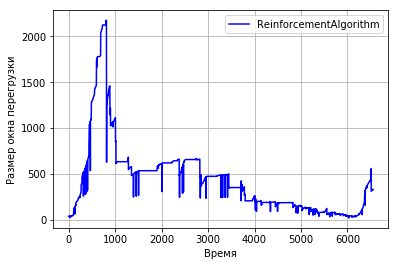

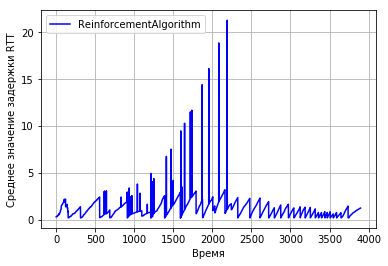

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 137835, 'square_avg': tensor([[1.3048e-26, 0.0000e+00],
        [1.4128e-24, 0.0000e+00],
        [2.8609e-24, 0.0000e+00],
        [5.2034e-25, 0.0000e+00],
        [9.1352e-29, 0.0000e+00],
        [2.6053e-24, 0.0000e+00],
        [2.9670e-24, 0.0000e+00],
        [1.0956e-18, 0.0000e+00],
        [5.9264e-21, 0.0000e+00],
        [3.9339e-22, 0.0000e+00],
        [3.3945e-21, 0.0000e+00],
        [2.7059e-25, 0.0000e+00],
        [2.0235e-22, 0.0000e+00],
        [4.1144e-21, 0.0000e+00],
        [2.5625e-23, 0.0000e+00],
        [3.4624e-16, 0.0000e+00],
        [2.5458e-26, 0.0000e+00],
        [4.4939e-25, 0.0000e+00],
        [8.8084e-26, 0.0000e+00],
        [2.0702e-31, 0.0000e+00],
        [4.1634e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:45467

Результаты для отправителя 37580, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5054.666667
Среднее значение задержки RTT (мс): 801.562167



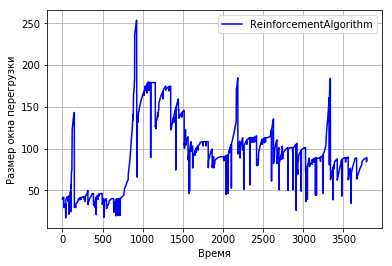

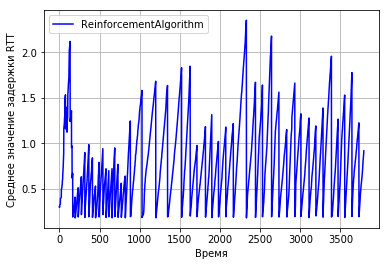

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 140903, 'square_avg': tensor([[5.0064e-28, 0.0000e+00],
        [5.8541e-26, 0.0000e+00],
        [6.5546e-26, 0.0000e+00],
        [1.7609e-26, 0.0000e+00],
        [4.0140e-29, 0.0000e+00],
        [6.7013e-26, 0.0000e+00],
        [1.3495e-25, 0.0000e+00],
        [3.6166e-18, 0.0000e+00],
        [3.0782e-24, 0.0000e+00],
        [1.7421e-25, 0.0000e+00],
        [2.3356e-22, 0.0000e+00],
        [7.3070e-27, 0.0000e+00],
        [3.2528e-25, 0.0000e+00],
        [6.9456e-20, 0.0000e+00],
        [5.4882e-24, 0.0000e+00],
        [2.8068e-19, 0.0000e+00],
        [3.3632e-30, 0.0000e+00],
        [2.6982e-20, 0.0000e+00],
        [5.0873e-24, 0.0000e+00],
        [2.1819e-31, 0.0000e+00],
        [2.4344e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:40064

Результаты для отправителя 48123, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5220.000000
Среднее значение задержки RTT (мс): 951.178311



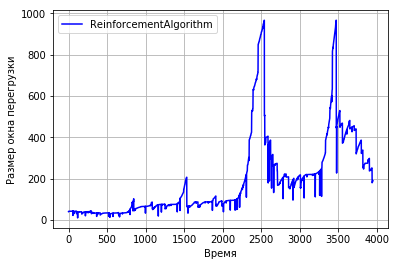

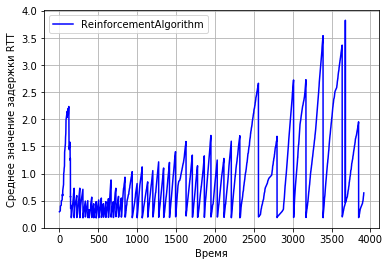

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 143679, 'square_avg': tensor([[2.2376e-28, 0.0000e+00],
        [2.2870e-26, 0.0000e+00],
        [2.7934e-26, 0.0000e+00],
        [7.1620e-27, 0.0000e+00],
        [2.3030e-30, 0.0000e+00],
        [2.7178e-26, 0.0000e+00],
        [1.5076e-24, 0.0000e+00],
        [2.5528e-16, 0.0000e+00],
        [5.7580e-21, 0.0000e+00],
        [1.8752e-21, 0.0000e+00],
        [1.0505e-26, 0.0000e+00],
        [3.1941e-27, 0.0000e+00],
        [1.3548e-25, 0.0000e+00],
        [1.6260e-21, 0.0000e+00],
        [7.4408e-21, 0.0000e+00],
        [1.3185e-20, 0.0000e+00],
        [4.8827e-29, 0.0000e+00],
        [7.7393e-27, 0.0000e+00],
        [2.1200e-25, 0.0000e+00],
        [7.1374e-29, 0.0000e+00],
        [7.4576e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:43771

Результаты для отправителя 41318, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5708.000000
Среднее значение задержки RTT (мс): 1157.627634



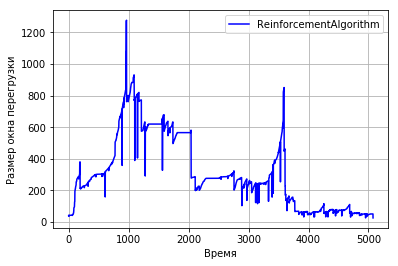

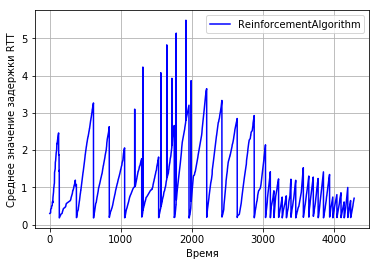

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 146624, 'square_avg': tensor([[1.6997e-28, 0.0000e+00],
        [1.8069e-26, 0.0000e+00],
        [2.2832e-26, 0.0000e+00],
        [5.3016e-27, 0.0000e+00],
        [1.3940e-30, 0.0000e+00],
        [2.1465e-26, 0.0000e+00],
        [6.4194e-27, 0.0000e+00],
        [7.0656e-18, 0.0000e+00],
        [2.8471e-25, 0.0000e+00],
        [5.7267e-24, 0.0000e+00],
        [7.3200e-27, 0.0000e+00],
        [2.3431e-27, 0.0000e+00],
        [2.5861e-23, 0.0000e+00],
        [2.3517e-25, 0.0000e+00],
        [1.5878e-24, 0.0000e+00],
        [7.0804e-22, 0.0000e+00],
        [1.7006e-26, 0.0000e+00],
        [1.1809e-26, 0.0000e+00],
        [5.3244e-26, 0.0000e+00],
        [4.2324e-32, 0.0000e+00],
        [1.1814e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:50079

Результаты для отправителя 57240, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4948.000000
Среднее значение задержки RTT (мс): 1111.130335



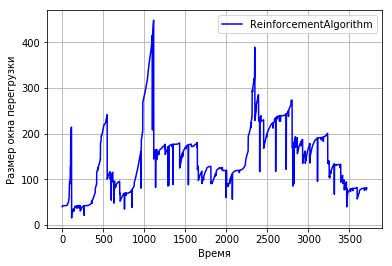

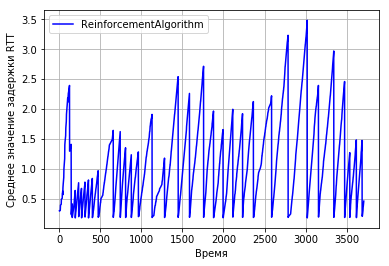

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 149396, 'square_avg': tensor([[1.9643e-28, 0.0000e+00],
        [2.1261e-26, 0.0000e+00],
        [2.7562e-26, 0.0000e+00],
        [6.1899e-27, 0.0000e+00],
        [7.7963e-31, 0.0000e+00],
        [2.5244e-26, 0.0000e+00],
        [8.9607e-27, 0.0000e+00],
        [3.2836e-18, 0.0000e+00],
        [4.4793e-20, 0.0000e+00],
        [1.5345e-22, 0.0000e+00],
        [1.4195e-26, 0.0000e+00],
        [2.8636e-27, 0.0000e+00],
        [1.3130e-25, 0.0000e+00],
        [4.0207e-25, 0.0000e+00],
        [4.9756e-26, 0.0000e+00],
        [4.2444e-23, 0.0000e+00],
        [1.6885e-30, 0.0000e+00],
        [7.1281e-27, 0.0000e+00],
        [5.9242e-26, 0.0000e+00],
        [3.1556e-32, 0.0000e+00],
        [3.4457e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:55136

Результаты для отправителя 41817, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5041.333333
Среднее значение задержки RTT (мс): 1205.119701



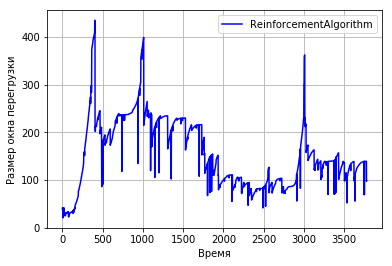

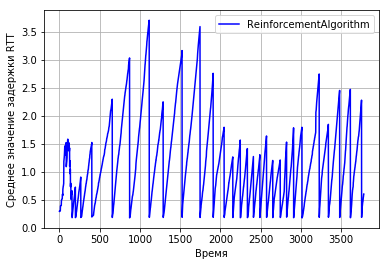

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 152266, 'square_avg': tensor([[4.6175e-29, 0.0000e+00],
        [3.3548e-27, 0.0000e+00],
        [4.6689e-27, 0.0000e+00],
        [9.6914e-28, 0.0000e+00],
        [9.5449e-32, 0.0000e+00],
        [4.0864e-27, 0.0000e+00],
        [1.4019e-27, 0.0000e+00],
        [1.9491e-24, 0.0000e+00],
        [9.6167e-27, 0.0000e+00],
        [7.1751e-28, 0.0000e+00],
        [3.8976e-27, 0.0000e+00],
        [4.7272e-28, 0.0000e+00],
        [2.0344e-26, 0.0000e+00],
        [2.0997e-27, 0.0000e+00],
        [8.0093e-27, 0.0000e+00],
        [2.0980e-22, 0.0000e+00],
        [1.6166e-30, 0.0000e+00],
        [7.1111e-27, 0.0000e+00],
        [8.6882e-26, 0.0000e+00],
        [1.2499e-32, 0.0000e+00],
        [1.5372e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:44981

Результаты для отправителя 40802, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4761.333333
Среднее значение задержки RTT (мс): 913.241440



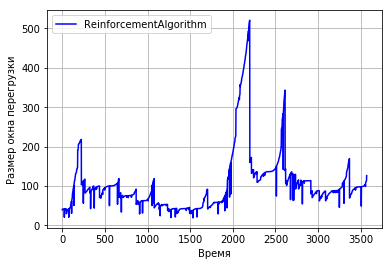

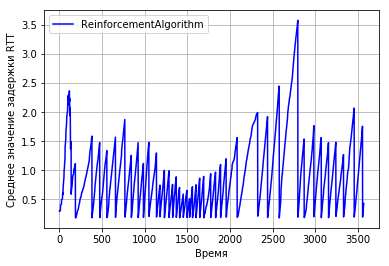

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 155037, 'square_avg': tensor([[2.6754e-29, 0.0000e+00],
        [1.8988e-27, 0.0000e+00],
        [2.6810e-27, 0.0000e+00],
        [5.7848e-28, 0.0000e+00],
        [2.0402e-31, 0.0000e+00],
        [2.2322e-27, 0.0000e+00],
        [8.6245e-28, 0.0000e+00],
        [1.0038e-24, 0.0000e+00],
        [8.9658e-28, 0.0000e+00],
        [5.7878e-28, 0.0000e+00],
        [2.1995e-27, 0.0000e+00],
        [3.0235e-28, 0.0000e+00],
        [1.2262e-26, 0.0000e+00],
        [8.3562e-27, 0.0000e+00],
        [4.5893e-27, 0.0000e+00],
        [4.0303e-23, 0.0000e+00],
        [3.2119e-30, 0.0000e+00],
        [6.5750e-27, 0.0000e+00],
        [8.3699e-26, 0.0000e+00],
        [1.1866e-33, 0.0000e+00],
        [1.1349e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:59001

Результаты для отправителя 37892, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4868.000000
Среднее значение задержки RTT (мс): 878.200527



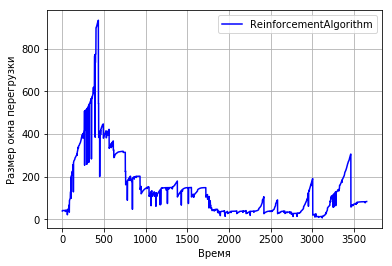

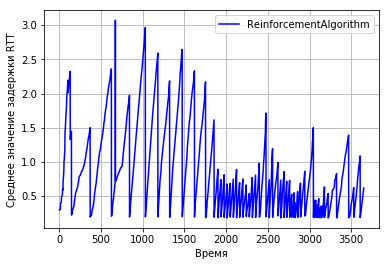

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 157680, 'square_avg': tensor([[7.7234e-29, 0.0000e+00],
        [9.6424e-27, 0.0000e+00],
        [1.2785e-26, 0.0000e+00],
        [2.9003e-27, 0.0000e+00],
        [1.9561e-32, 0.0000e+00],
        [1.1185e-26, 0.0000e+00],
        [5.5086e-27, 0.0000e+00],
        [7.1505e-24, 0.0000e+00],
        [4.0653e-24, 0.0000e+00],
        [1.5185e-27, 0.0000e+00],
        [2.8023e-26, 0.0000e+00],
        [1.4825e-27, 0.0000e+00],
        [6.9337e-26, 0.0000e+00],
        [6.3342e-25, 0.0000e+00],
        [2.3351e-26, 0.0000e+00],
        [1.5050e-22, 0.0000e+00],
        [1.4557e-27, 0.0000e+00],
        [2.1657e-26, 0.0000e+00],
        [3.7594e-27, 0.0000e+00],
        [3.7577e-36, 0.0000e+00],
        [2.8068e-32, 0.0

[Отправитель] Подключен к получателю: 100.64.0.4:35518

Результаты для отправителя 46810, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5200.000000
Среднее значение задержки RTT (мс): 831.761849



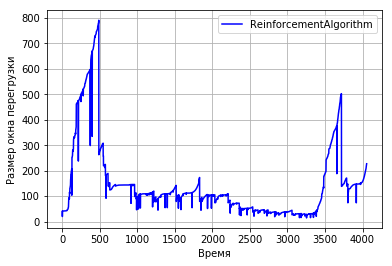

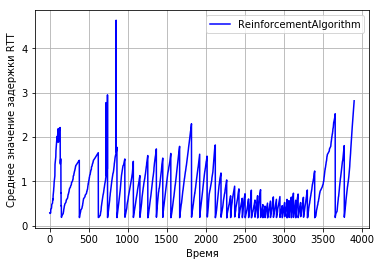

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 160491, 'square_avg': tensor([[1.7299e-29, 0.0000e+00],
        [1.2031e-27, 0.0000e+00],
        [1.6840e-27, 0.0000e+00],
        [3.7252e-28, 0.0000e+00],
        [1.7282e-31, 0.0000e+00],
        [1.3346e-27, 0.0000e+00],
        [5.6620e-28, 0.0000e+00],
        [2.7089e-23, 0.0000e+00],
        [8.0384e-29, 0.0000e+00],
        [6.7525e-27, 0.0000e+00],
        [1.8793e-27, 0.0000e+00],
        [1.9282e-28, 0.0000e+00],
        [8.1488e-24, 0.0000e+00],
        [1.1800e-26, 0.0000e+00],
        [2.8671e-27, 0.0000e+00],
        [4.0366e-23, 0.0000e+00],
        [1.3547e-30, 0.0000e+00],
        [7.2358e-27, 0.0000e+00],
        [7.1397e-26, 0.0000e+00],
        [5.1707e-34, 0.0000e+00],
        [9.1584e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:60628

Результаты для отправителя 51217, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5481.333333
Среднее значение задержки RTT (мс): 1107.205916



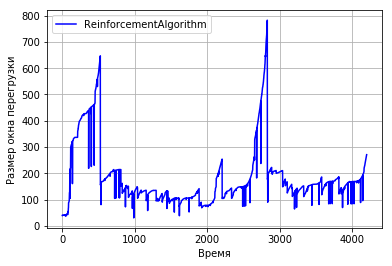

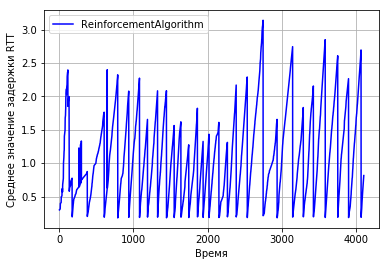

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 163456, 'square_avg': tensor([[4.9921e-29, 0.0000e+00],
        [6.2793e-27, 0.0000e+00],
        [8.2812e-27, 0.0000e+00],
        [1.8709e-27, 0.0000e+00],
        [1.0211e-32, 0.0000e+00],
        [7.2718e-27, 0.0000e+00],
        [3.5826e-27, 0.0000e+00],
        [4.7049e-24, 0.0000e+00],
        [1.9149e-25, 0.0000e+00],
        [1.0190e-27, 0.0000e+00],
        [1.6341e-26, 0.0000e+00],
        [9.4257e-28, 0.0000e+00],
        [4.1441e-26, 0.0000e+00],
        [3.5587e-25, 0.0000e+00],
        [1.5102e-26, 0.0000e+00],
        [6.2573e-23, 0.0000e+00],
        [1.2301e-28, 0.0000e+00],
        [1.1595e-27, 0.0000e+00],
        [9.8651e-28, 0.0000e+00],
        [1.0495e-36, 0.0000e+00],
        [3.5301e-33, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:38966

Результаты для отправителя 60914, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5165.333333
Среднее значение задержки RTT (мс): 753.331690



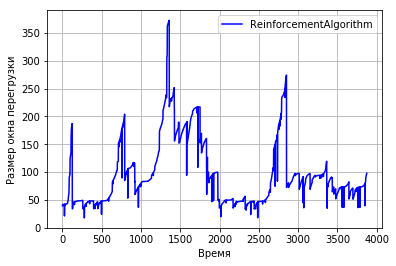

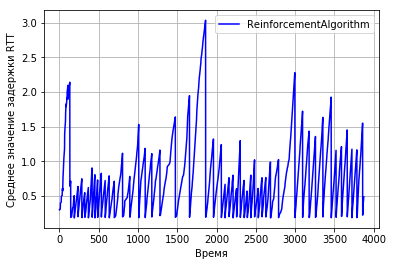

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 166487, 'square_avg': tensor([[2.6194e-29, 0.0000e+00],
        [2.0031e-27, 0.0000e+00],
        [2.6856e-27, 0.0000e+00],
        [6.3846e-28, 0.0000e+00],
        [8.0198e-32, 0.0000e+00],
        [2.4257e-27, 0.0000e+00],
        [7.3325e-28, 0.0000e+00],
        [1.2006e-24, 0.0000e+00],
        [7.9885e-27, 0.0000e+00],
        [5.6435e-26, 0.0000e+00],
        [2.4540e-27, 0.0000e+00],
        [3.1841e-28, 0.0000e+00],
        [1.1682e-26, 0.0000e+00],
        [3.9570e-27, 0.0000e+00],
        [4.7058e-27, 0.0000e+00],
        [1.2760e-22, 0.0000e+00],
        [3.0560e-30, 0.0000e+00],
        [5.4795e-27, 0.0000e+00],
        [7.8949e-26, 0.0000e+00],
        [1.9762e-33, 0.0000e+00],
        [1.0658e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:47535

Результаты для отправителя 39535, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5429.333333
Среднее значение задержки RTT (мс): 1062.016098



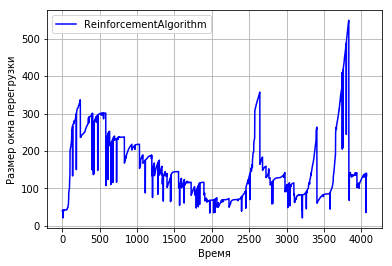

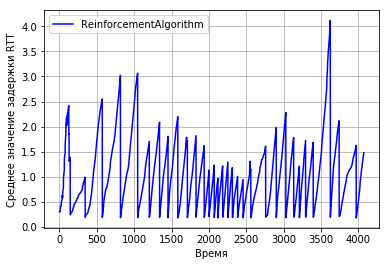

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 169456, 'square_avg': tensor([[1.3113e-29, 0.0000e+00],
        [1.1233e-27, 0.0000e+00],
        [1.5254e-27, 0.0000e+00],
        [3.3664e-28, 0.0000e+00],
        [6.1093e-32, 0.0000e+00],
        [1.3272e-27, 0.0000e+00],
        [4.9961e-28, 0.0000e+00],
        [2.4188e-20, 0.0000e+00],
        [2.2120e-27, 0.0000e+00],
        [5.9840e-28, 0.0000e+00],
        [8.7412e-28, 0.0000e+00],
        [1.6728e-28, 0.0000e+00],
        [6.9699e-27, 0.0000e+00],
        [6.4942e-27, 0.0000e+00],
        [2.6625e-27, 0.0000e+00],
        [1.0228e-21, 0.0000e+00],
        [1.0293e-30, 0.0000e+00],
        [4.2524e-27, 0.0000e+00],
        [4.5473e-26, 0.0000e+00],
        [3.5597e-34, 0.0000e+00],
        [5.3381e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:34402

Результаты для отправителя 59033, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5362.666667
Среднее значение задержки RTT (мс): 1109.903058



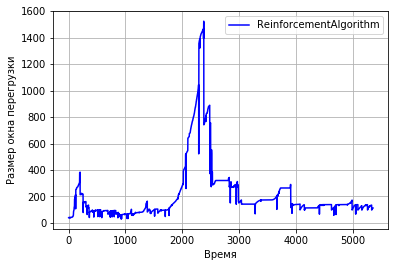

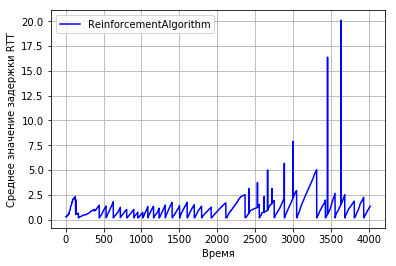

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 172268, 'square_avg': tensor([[9.8936e-30, 0.0000e+00],
        [7.5611e-28, 0.0000e+00],
        [1.0321e-27, 0.0000e+00],
        [2.4637e-28, 0.0000e+00],
        [7.3475e-32, 0.0000e+00],
        [8.9555e-28, 0.0000e+00],
        [2.9325e-28, 0.0000e+00],
        [4.7289e-25, 0.0000e+00],
        [3.7213e-28, 0.0000e+00],
        [1.2255e-26, 0.0000e+00],
        [1.3632e-27, 0.0000e+00],
        [1.2689e-28, 0.0000e+00],
        [4.6734e-27, 0.0000e+00],
        [1.7914e-26, 0.0000e+00],
        [1.7901e-27, 0.0000e+00],
        [3.0088e-23, 0.0000e+00],
        [1.2485e-30, 0.0000e+00],
        [5.6312e-27, 0.0000e+00],
        [6.1699e-26, 0.0000e+00],
        [2.7664e-34, 0.0000e+00],
        [6.6200e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:38311

Результаты для отправителя 38967, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5010.666667
Среднее значение задержки RTT (мс): 1165.008200



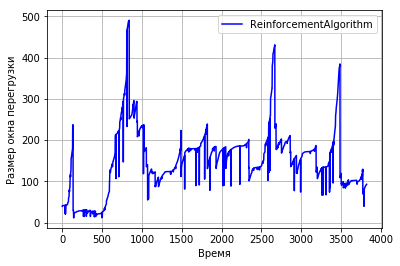

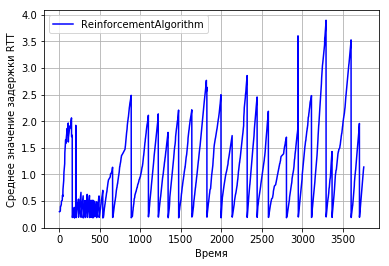

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 175097, 'square_avg': tensor([[6.6704e-30, 0.0000e+00],
        [6.1938e-28, 0.0000e+00],
        [8.8325e-28, 0.0000e+00],
        [1.6503e-28, 0.0000e+00],
        [4.8109e-32, 0.0000e+00],
        [7.2548e-28, 0.0000e+00],
        [3.7070e-28, 0.0000e+00],
        [5.6075e-18, 0.0000e+00],
        [3.6344e-28, 0.0000e+00],
        [7.0929e-25, 0.0000e+00],
        [2.4354e-28, 0.0000e+00],
        [8.0932e-29, 0.0000e+00],
        [4.1295e-27, 0.0000e+00],
        [3.4952e-27, 0.0000e+00],
        [1.5032e-27, 0.0000e+00],
        [1.7712e-23, 0.0000e+00],
        [6.0372e-31, 0.0000e+00],
        [3.5955e-27, 0.0000e+00],
        [1.8164e-26, 0.0000e+00],
        [7.0933e-35, 0.0000e+00],
        [1.8479e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:51332

Результаты для отправителя 51843, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5802.666667
Среднее значение задержки RTT (мс): 1473.166033



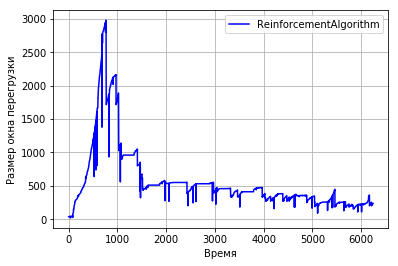

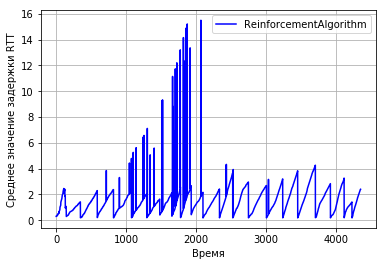

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 177767, 'square_avg': tensor([[4.6711e-30, 0.0000e+00],
        [4.2781e-28, 0.0000e+00],
        [6.0564e-28, 0.0000e+00],
        [1.1866e-28, 0.0000e+00],
        [4.3892e-32, 0.0000e+00],
        [4.9048e-28, 0.0000e+00],
        [2.4951e-28, 0.0000e+00],
        [3.2806e-25, 0.0000e+00],
        [2.8645e-29, 0.0000e+00],
        [9.4318e-29, 0.0000e+00],
        [2.2269e-28, 0.0000e+00],
        [5.9437e-29, 0.0000e+00],
        [2.9023e-27, 0.0000e+00],
        [3.9223e-27, 0.0000e+00],
        [1.0341e-27, 0.0000e+00],
        [2.0933e-23, 0.0000e+00],
        [7.8026e-31, 0.0000e+00],
        [3.7383e-27, 0.0000e+00],
        [2.2302e-26, 0.0000e+00],
        [6.2567e-36, 0.0000e+00],
        [1.9105e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:42879

Результаты для отправителя 40518, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4862.666667
Среднее значение задержки RTT (мс): 808.481236



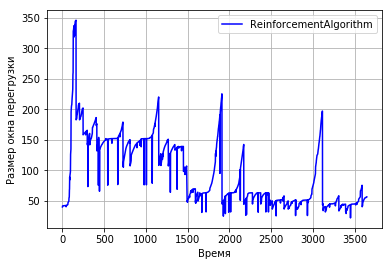

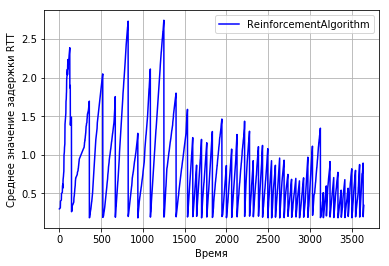

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 180686, 'square_avg': tensor([[1.0243e-28, 0.0000e+00],
        [8.9716e-24, 0.0000e+00],
        [1.9976e-25, 0.0000e+00],
        [4.3194e-27, 0.0000e+00],
        [6.0876e-26, 0.0000e+00],
        [6.9671e-24, 0.0000e+00],
        [1.3949e-24, 0.0000e+00],
        [3.7603e-19, 0.0000e+00],
        [1.7441e-22, 0.0000e+00],
        [3.6600e-24, 0.0000e+00],
        [2.3045e-26, 0.0000e+00],
        [4.8991e-26, 0.0000e+00],
        [2.5823e-25, 0.0000e+00],
        [1.3625e-17, 0.0000e+00],
        [1.5943e-24, 0.0000e+00],
        [4.1524e-22, 0.0000e+00],
        [1.5334e-29, 0.0000e+00],
        [1.8947e-27, 0.0000e+00],
        [1.9894e-26, 0.0000e+00],
        [7.1873e-30, 0.0000e+00],
        [6.0679e-30, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:36430

Результаты для отправителя 59661, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5358.666667
Среднее значение задержки RTT (мс): 1059.691067



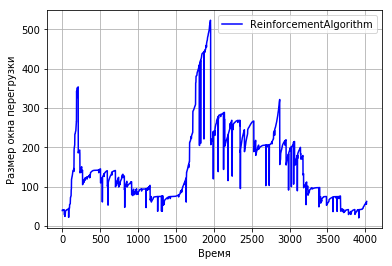

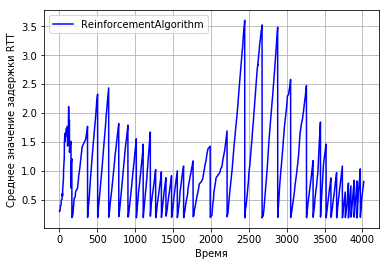

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 183732, 'square_avg': tensor([[1.1405e-29, 0.0000e+00],
        [1.1071e-27, 0.0000e+00],
        [1.5207e-27, 0.0000e+00],
        [2.9800e-28, 0.0000e+00],
        [2.5990e-32, 0.0000e+00],
        [1.3207e-27, 0.0000e+00],
        [5.4622e-28, 0.0000e+00],
        [9.7241e-25, 0.0000e+00],
        [4.0310e-27, 0.0000e+00],
        [1.2320e-27, 0.0000e+00],
        [4.2529e-28, 0.0000e+00],
        [1.4112e-28, 0.0000e+00],
        [6.8981e-27, 0.0000e+00],
        [1.5062e-26, 0.0000e+00],
        [2.5964e-27, 0.0000e+00],
        [1.2119e-23, 0.0000e+00],
        [1.0701e-30, 0.0000e+00],
        [5.3840e-27, 0.0000e+00],
        [4.4370e-26, 0.0000e+00],
        [1.2222e-33, 0.0000e+00],
        [4.4012e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:51169

Результаты для отправителя 56342, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5473.333333
Среднее значение задержки RTT (мс): 1194.874178



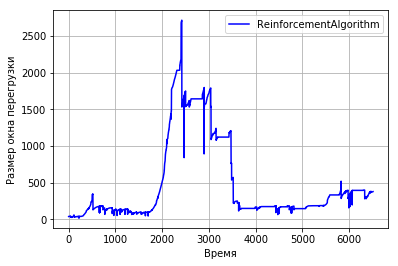

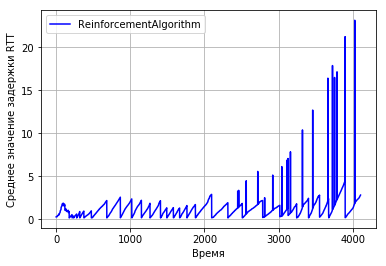

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 186282, 'square_avg': tensor([[6.6511e-30, 0.0000e+00],
        [6.2666e-28, 0.0000e+00],
        [8.6262e-28, 0.0000e+00],
        [1.7192e-28, 0.0000e+00],
        [2.8184e-32, 0.0000e+00],
        [7.3526e-28, 0.0000e+00],
        [3.1083e-28, 0.0000e+00],
        [1.3270e-24, 0.0000e+00],
        [8.5489e-28, 0.0000e+00],
        [1.8106e-26, 0.0000e+00],
        [3.0346e-28, 0.0000e+00],
        [8.2681e-29, 0.0000e+00],
        [3.9921e-27, 0.0000e+00],
        [1.6901e-26, 0.0000e+00],
        [1.4723e-27, 0.0000e+00],
        [4.4260e-23, 0.0000e+00],
        [8.8703e-31, 0.0000e+00],
        [4.8380e-27, 0.0000e+00],
        [3.7550e-26, 0.0000e+00],
        [3.9476e-34, 0.0000e+00],
        [3.1510e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:47630

Результаты для отправителя 40775, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5822.666667
Среднее значение задержки RTT (мс): 1314.114736



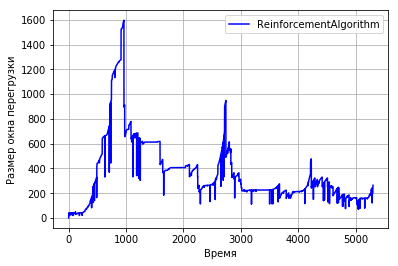

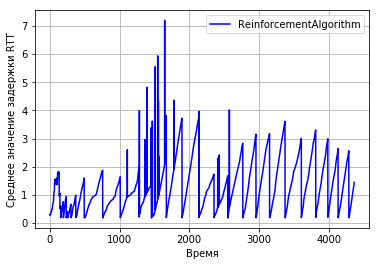

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 189117, 'square_avg': tensor([[4.1524e-30, 0.0000e+00],
        [4.0521e-28, 0.0000e+00],
        [5.6183e-28, 0.0000e+00],
        [1.0920e-28, 0.0000e+00],
        [2.5809e-32, 0.0000e+00],
        [4.6726e-28, 0.0000e+00],
        [2.1786e-28, 0.0000e+00],
        [3.1945e-24, 0.0000e+00],
        [1.7714e-28, 0.0000e+00],
        [6.9446e-26, 0.0000e+00],
        [2.2302e-28, 0.0000e+00],
        [5.2826e-29, 0.0000e+00],
        [2.6533e-27, 0.0000e+00],
        [2.0568e-26, 0.0000e+00],
        [9.5453e-28, 0.0000e+00],
        [1.5053e-23, 0.0000e+00],
        [8.4410e-31, 0.0000e+00],
        [4.8383e-27, 0.0000e+00],
        [3.4511e-26, 0.0000e+00],
        [1.0106e-34, 0.0000e+00],
        [2.3711e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:50638

Результаты для отправителя 49462, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5801.333333
Среднее значение задержки RTT (мс): 1364.845711



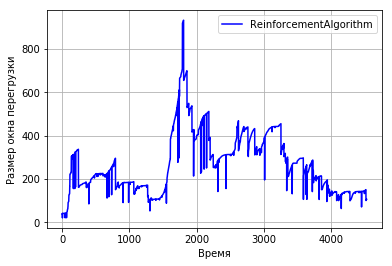

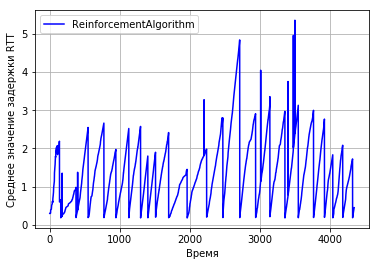

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 192140, 'square_avg': tensor([[1.2839e-29, 0.0000e+00],
        [1.6742e-27, 0.0000e+00],
        [2.1944e-27, 0.0000e+00],
        [4.7736e-28, 0.0000e+00],
        [7.1418e-33, 0.0000e+00],
        [1.9632e-27, 0.0000e+00],
        [9.3681e-28, 0.0000e+00],
        [4.9854e-24, 0.0000e+00],
        [1.2401e-26, 0.0000e+00],
        [6.4989e-26, 0.0000e+00],
        [3.7719e-27, 0.0000e+00],
        [2.2694e-28, 0.0000e+00],
        [1.1063e-26, 0.0000e+00],
        [1.1972e-25, 0.0000e+00],
        [3.9310e-27, 0.0000e+00],
        [2.5938e-23, 0.0000e+00],
        [3.6983e-31, 0.0000e+00],
        [1.1096e-27, 0.0000e+00],
        [2.9749e-27, 0.0000e+00],
        [3.2755e-36, 0.0000e+00],
        [5.7717e-33, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:47781

Результаты для отправителя 52690, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5126.666667
Среднее значение задержки RTT (мс): 860.948467



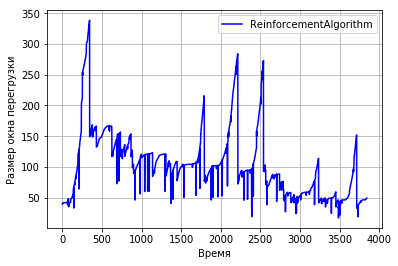

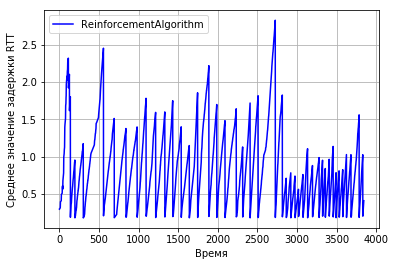

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 195107, 'square_avg': tensor([[9.5835e-30, 0.0000e+00],
        [1.0615e-27, 0.0000e+00],
        [1.4796e-27, 0.0000e+00],
        [2.4846e-28, 0.0000e+00],
        [1.7646e-32, 0.0000e+00],
        [1.2499e-27, 0.0000e+00],
        [6.4555e-28, 0.0000e+00],
        [1.7608e-24, 0.0000e+00],
        [1.2298e-26, 0.0000e+00],
        [7.9172e-28, 0.0000e+00],
        [3.8240e-28, 0.0000e+00],
        [1.0084e-28, 0.0000e+00],
        [6.7368e-27, 0.0000e+00],
        [3.8771e-26, 0.0000e+00],
        [2.4667e-27, 0.0000e+00],
        [8.1111e-24, 0.0000e+00],
        [2.6340e-31, 0.0000e+00],
        [1.5284e-27, 0.0000e+00],
        [9.5553e-27, 0.0000e+00],
        [6.6563e-34, 0.0000e+00],
        [1.3420e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:55394

Результаты для отправителя 53222, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5686.666667
Среднее значение задержки RTT (мс): 1132.206565



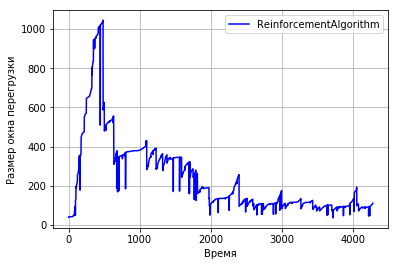

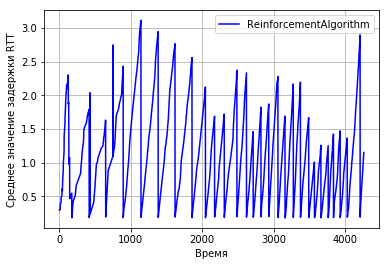

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 198242, 'square_avg': tensor([[4.9397e-30, 0.0000e+00],
        [4.9723e-28, 0.0000e+00],
        [6.7574e-28, 0.0000e+00],
        [1.3154e-28, 0.0000e+00],
        [2.0262e-32, 0.0000e+00],
        [5.7364e-28, 0.0000e+00],
        [2.5552e-28, 0.0000e+00],
        [4.1580e-25, 0.0000e+00],
        [1.7153e-27, 0.0000e+00],
        [9.8942e-28, 0.0000e+00],
        [2.8462e-28, 0.0000e+00],
        [5.5068e-29, 0.0000e+00],
        [3.1661e-27, 0.0000e+00],
        [1.3524e-26, 0.0000e+00],
        [1.1422e-27, 0.0000e+00],
        [1.1899e-23, 0.0000e+00],
        [8.3462e-31, 0.0000e+00],
        [5.2027e-27, 0.0000e+00],
        [3.3154e-26, 0.0000e+00],
        [7.0948e-34, 0.0000e+00],
        [2.7940e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:50743

Результаты для отправителя 39746, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4536.000000
Среднее значение задержки RTT (мс): 487.517847



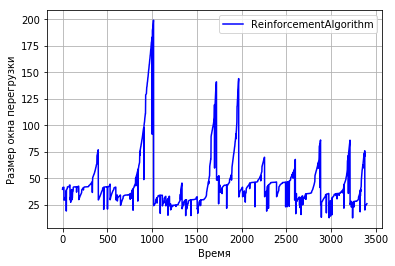

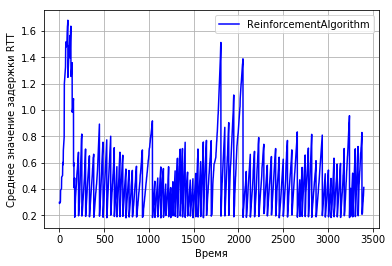

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 201077, 'square_avg': tensor([[3.2434e-30, 0.0000e+00],
        [3.3261e-28, 0.0000e+00],
        [4.5460e-28, 0.0000e+00],
        [8.7003e-29, 0.0000e+00],
        [1.6837e-32, 0.0000e+00],
        [3.8166e-28, 0.0000e+00],
        [1.8007e-28, 0.0000e+00],
        [3.4689e-25, 0.0000e+00],
        [6.7415e-28, 0.0000e+00],
        [8.0963e-28, 0.0000e+00],
        [1.8694e-28, 0.0000e+00],
        [3.6152e-29, 0.0000e+00],
        [2.1579e-27, 0.0000e+00],
        [1.5704e-26, 0.0000e+00],
        [7.6733e-28, 0.0000e+00],
        [8.3817e-23, 0.0000e+00],
        [6.4885e-30, 0.0000e+00],
        [7.7525e-27, 0.0000e+00],
        [2.9399e-26, 0.0000e+00],
        [2.6991e-34, 0.0000e+00],
        [1.9774e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:35012

Результаты для отправителя 38452, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4852.000000
Среднее значение задержки RTT (мс): 795.950725



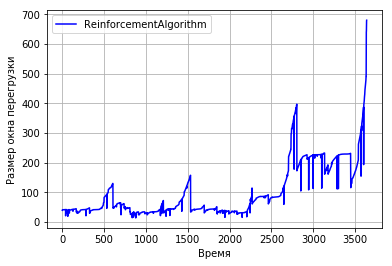

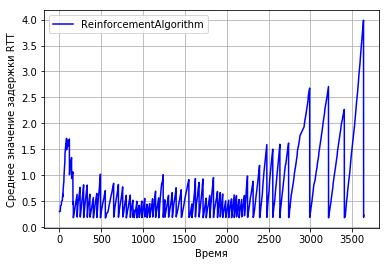

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 204006, 'square_avg': tensor([[2.3139e-30, 0.0000e+00],
        [2.3659e-28, 0.0000e+00],
        [3.2386e-28, 0.0000e+00],
        [6.2405e-29, 0.0000e+00],
        [1.6545e-32, 0.0000e+00],
        [2.6938e-28, 0.0000e+00],
        [1.3119e-28, 0.0000e+00],
        [5.2288e-25, 0.0000e+00],
        [2.4273e-28, 0.0000e+00],
        [1.2611e-26, 0.0000e+00],
        [1.6697e-28, 0.0000e+00],
        [2.5891e-29, 0.0000e+00],
        [1.5562e-27, 0.0000e+00],
        [1.6434e-26, 0.0000e+00],
        [5.4680e-28, 0.0000e+00],
        [1.7188e-21, 0.0000e+00],
        [1.9099e-30, 0.0000e+00],
        [1.6541e-26, 0.0000e+00],
        [2.7894e-26, 0.0000e+00],
        [1.0839e-34, 0.0000e+00],
        [1.6672e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:52479

Результаты для отправителя 50239, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4910.666667
Среднее значение задержки RTT (мс): 928.784893



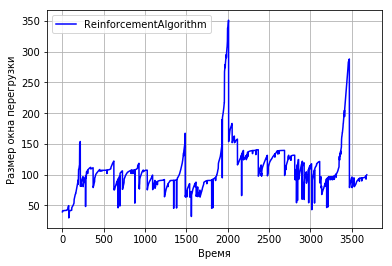

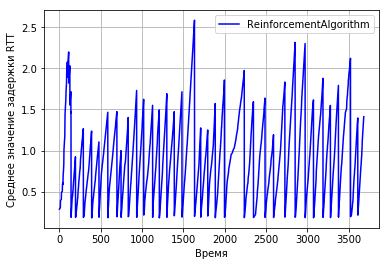

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 206893, 'square_avg': tensor([[1.7551e-30, 0.0000e+00],
        [1.9192e-28, 0.0000e+00],
        [2.6576e-28, 0.0000e+00],
        [4.8524e-29, 0.0000e+00],
        [1.3450e-32, 0.0000e+00],
        [2.1877e-28, 0.0000e+00],
        [1.1732e-28, 0.0000e+00],
        [2.0187e-25, 0.0000e+00],
        [1.0997e-28, 0.0000e+00],
        [1.0208e-28, 0.0000e+00],
        [1.3724e-28, 0.0000e+00],
        [1.9857e-29, 0.0000e+00],
        [1.2866e-27, 0.0000e+00],
        [1.0069e-26, 0.0000e+00],
        [4.4735e-28, 0.0000e+00],
        [8.4038e-21, 0.0000e+00],
        [7.4953e-31, 0.0000e+00],
        [5.3864e-27, 0.0000e+00],
        [1.8352e-26, 0.0000e+00],
        [2.4761e-35, 0.0000e+00],
        [9.7098e-32, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:60532

Результаты для отправителя 36568, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5281.333333
Среднее значение задержки RTT (мс): 953.806433



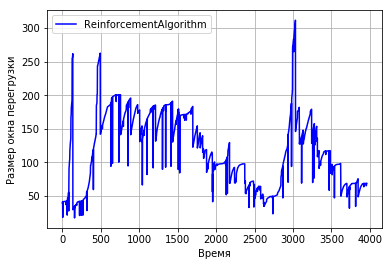

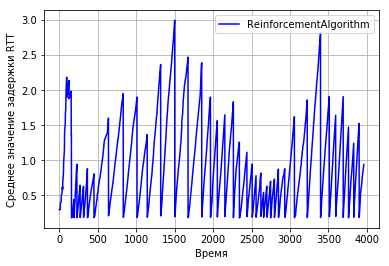

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 210011, 'square_avg': tensor([[1.4215e-30, 0.0000e+00],
        [1.4278e-28, 0.0000e+00],
        [1.9710e-28, 0.0000e+00],
        [3.7561e-29, 0.0000e+00],
        [1.5286e-32, 0.0000e+00],
        [1.6054e-28, 0.0000e+00],
        [8.4274e-29, 0.0000e+00],
        [1.2885e-25, 0.0000e+00],
        [2.2897e-29, 0.0000e+00],
        [1.2172e-28, 0.0000e+00],
        [1.2014e-28, 0.0000e+00],
        [1.5343e-29, 0.0000e+00],
        [9.6231e-28, 0.0000e+00],
        [1.0061e-26, 0.0000e+00],
        [3.3196e-28, 0.0000e+00],
        [3.5167e-22, 0.0000e+00],
        [6.2486e-31, 0.0000e+00],
        [6.0193e-27, 0.0000e+00],
        [1.9174e-26, 0.0000e+00],
        [4.6727e-36, 0.0000e+00],
        [1.0053e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:46218

Результаты для отправителя 33673, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5318.666667
Среднее значение задержки RTT (мс): 1080.529397



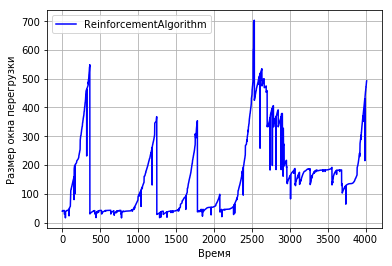

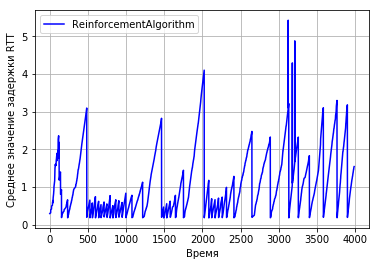

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 212824, 'square_avg': tensor([[5.9498e-30, 0.0000e+00],
        [7.9498e-28, 0.0000e+00],
        [1.0496e-27, 0.0000e+00],
        [2.2058e-28, 0.0000e+00],
        [4.0798e-34, 0.0000e+00],
        [9.3167e-28, 0.0000e+00],
        [4.8205e-28, 0.0000e+00],
        [1.1026e-24, 0.0000e+00],
        [7.9647e-27, 0.0000e+00],
        [1.8989e-28, 0.0000e+00],
        [1.5361e-27, 0.0000e+00],
        [9.1424e-29, 0.0000e+00],
        [5.3405e-27, 0.0000e+00],
        [3.6402e-26, 0.0000e+00],
        [1.8641e-27, 0.0000e+00],
        [4.8722e-23, 0.0000e+00],
        [1.8236e-31, 0.0000e+00],
        [5.7233e-28, 0.0000e+00],
        [5.0677e-28, 0.0000e+00],
        [7.6573e-38, 0.0000e+00],
        [5.2519e-34, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:42931

Результаты для отправителя 39342, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5586.666667
Среднее значение задержки RTT (мс): 1455.548610



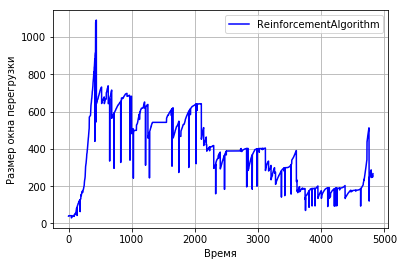

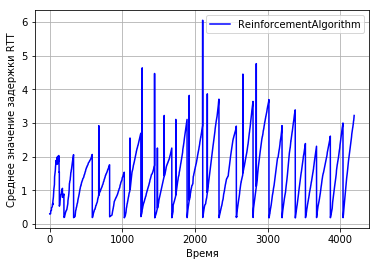

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 215613, 'square_avg': tensor([[1.5737e-29, 0.0000e+00],
        [2.4922e-27, 0.0000e+00],
        [3.3031e-27, 0.0000e+00],
        [1.1169e-24, 0.0000e+00],
        [2.5890e-32, 0.0000e+00],
        [2.9353e-27, 0.0000e+00],
        [1.6073e-27, 0.0000e+00],
        [2.7940e-23, 0.0000e+00],
        [5.5891e-26, 0.0000e+00],
        [4.1763e-27, 0.0000e+00],
        [3.7963e-27, 0.0000e+00],
        [4.7158e-28, 0.0000e+00],
        [3.8373e-25, 0.0000e+00],
        [1.1066e-25, 0.0000e+00],
        [5.7666e-27, 0.0000e+00],
        [3.5866e-22, 0.0000e+00],
        [5.6786e-33, 0.0000e+00],
        [2.7961e-29, 0.0000e+00],
        [5.7141e-24, 0.0000e+00],
        [1.1685e-32, 0.0000e+00],
        [7.2268e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:39909

Результаты для отправителя 34555, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5298.666667
Среднее значение задержки RTT (мс): 1327.628505



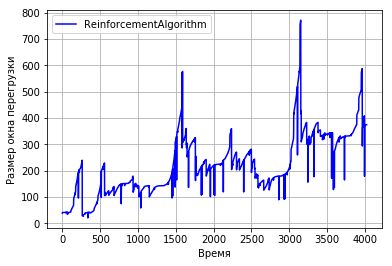

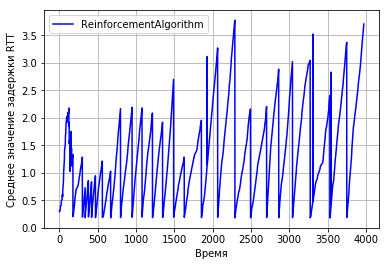

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 218413, 'square_avg': tensor([[4.2632e-30, 0.0000e+00],
        [4.8311e-28, 0.0000e+00],
        [6.3696e-28, 0.0000e+00],
        [1.1026e-28, 0.0000e+00],
        [5.4911e-33, 0.0000e+00],
        [5.7142e-28, 0.0000e+00],
        [2.4428e-28, 0.0000e+00],
        [4.0850e-25, 0.0000e+00],
        [1.6629e-27, 0.0000e+00],
        [3.7867e-28, 0.0000e+00],
        [2.2347e-28, 0.0000e+00],
        [5.5447e-29, 0.0000e+00],
        [2.7246e-27, 0.0000e+00],
        [2.3101e-26, 0.0000e+00],
        [1.0992e-27, 0.0000e+00],
        [2.0454e-22, 0.0000e+00],
        [3.7148e-30, 0.0000e+00],
        [8.1749e-27, 0.0000e+00],
        [1.4417e-26, 0.0000e+00],
        [6.1827e-34, 0.0000e+00],
        [2.0146e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:39807

Результаты для отправителя 55311, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5864.000000
Среднее значение задержки RTT (мс): 1337.496919



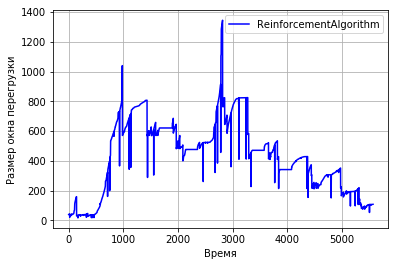

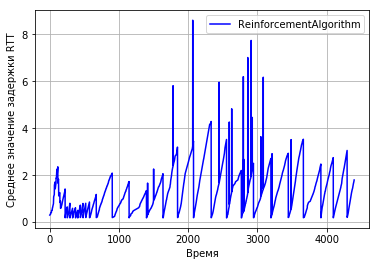

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 221382, 'square_avg': tensor([[2.8047e-30, 0.0000e+00],
        [3.0582e-28, 0.0000e+00],
        [4.0791e-28, 0.0000e+00],
        [6.8888e-29, 0.0000e+00],
        [6.6388e-33, 0.0000e+00],
        [3.5981e-28, 0.0000e+00],
        [1.5967e-28, 0.0000e+00],
        [2.3422e-25, 0.0000e+00],
        [5.1236e-28, 0.0000e+00],
        [2.3428e-28, 0.0000e+00],
        [1.8046e-28, 0.0000e+00],
        [3.4583e-29, 0.0000e+00],
        [1.7471e-27, 0.0000e+00],
        [2.0787e-26, 0.0000e+00],
        [6.9844e-28, 0.0000e+00],
        [3.7684e-22, 0.0000e+00],
        [1.2859e-30, 0.0000e+00],
        [6.4347e-27, 0.0000e+00],
        [1.4236e-26, 0.0000e+00],
        [3.3212e-34, 0.0000e+00],
        [1.7229e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:56605

Результаты для отправителя 53790, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5669.333333
Среднее значение задержки RTT (мс): 1455.484660



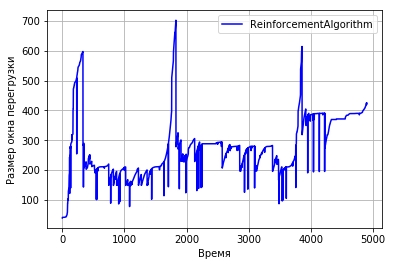

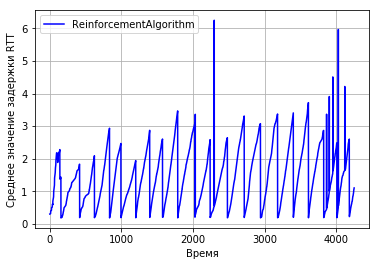

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 224292, 'square_avg': tensor([[2.0808e-30, 0.0000e+00],
        [2.3308e-28, 0.0000e+00],
        [3.1159e-28, 0.0000e+00],
        [5.2242e-29, 0.0000e+00],
        [6.1868e-33, 0.0000e+00],
        [2.7236e-28, 0.0000e+00],
        [1.2706e-28, 0.0000e+00],
        [2.2777e-24, 0.0000e+00],
        [2.0886e-28, 0.0000e+00],
        [8.2109e-26, 0.0000e+00],
        [1.5138e-28, 0.0000e+00],
        [2.6393e-29, 0.0000e+00],
        [1.3528e-27, 0.0000e+00],
        [2.1122e-26, 0.0000e+00],
        [5.3372e-28, 0.0000e+00],
        [5.3767e-23, 0.0000e+00],
        [8.9241e-31, 0.0000e+00],
        [5.0452e-27, 0.0000e+00],
        [1.3377e-26, 0.0000e+00],
        [1.7070e-34, 0.0000e+00],
        [1.4198e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:33034

Результаты для отправителя 58772, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5400.000000
Среднее значение задержки RTT (мс): 1408.177337



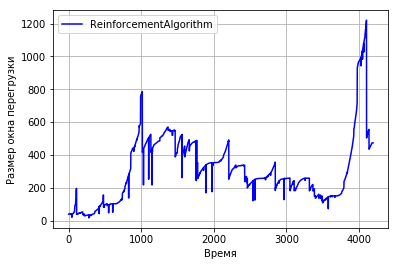

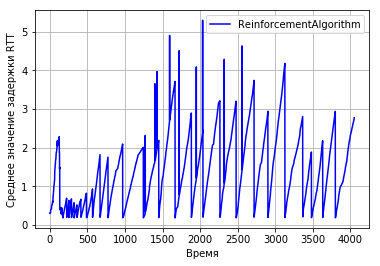

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 227094, 'square_avg': tensor([[1.6084e-30, 0.0000e+00],
        [1.7833e-28, 0.0000e+00],
        [2.4270e-28, 0.0000e+00],
        [3.8518e-29, 0.0000e+00],
        [7.6299e-33, 0.0000e+00],
        [2.0761e-28, 0.0000e+00],
        [1.0536e-28, 0.0000e+00],
        [6.0650e-24, 0.0000e+00],
        [7.4929e-29, 0.0000e+00],
        [6.6269e-25, 0.0000e+00],
        [1.2670e-28, 0.0000e+00],
        [1.9290e-29, 0.0000e+00],
        [1.0513e-27, 0.0000e+00],
        [1.4483e-26, 0.0000e+00],
        [4.1102e-28, 0.0000e+00],
        [8.0172e-24, 0.0000e+00],
        [6.8748e-31, 0.0000e+00],
        [3.9901e-27, 0.0000e+00],
        [1.0044e-26, 0.0000e+00],
        [7.5685e-35, 0.0000e+00],
        [1.0097e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:52394

Результаты для отправителя 45851, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5284.000000
Среднее значение задержки RTT (мс): 1122.573243



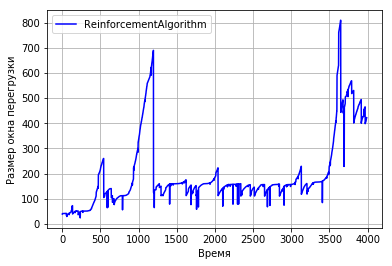

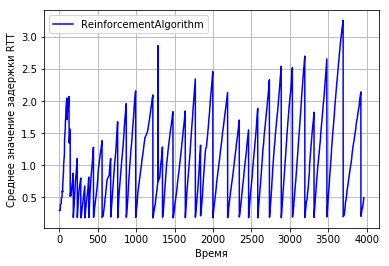

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 230036, 'square_avg': tensor([[1.3043e-30, 0.0000e+00],
        [1.4512e-28, 0.0000e+00],
        [1.9760e-28, 0.0000e+00],
        [3.1439e-29, 0.0000e+00],
        [7.4926e-33, 0.0000e+00],
        [1.6760e-28, 0.0000e+00],
        [8.5889e-29, 0.0000e+00],
        [5.9539e-24, 0.0000e+00],
        [2.0129e-29, 0.0000e+00],
        [7.2851e-26, 0.0000e+00],
        [1.1264e-28, 0.0000e+00],
        [1.5827e-29, 0.0000e+00],
        [8.6396e-28, 0.0000e+00],
        [1.4903e-26, 0.0000e+00],
        [3.3469e-28, 0.0000e+00],
        [9.9128e-24, 0.0000e+00],
        [5.0394e-30, 0.0000e+00],
        [1.8881e-26, 0.0000e+00],
        [1.0110e-26, 0.0000e+00],
        [3.8315e-35, 0.0000e+00],
        [9.2371e-32, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:60568

Результаты для отправителя 33013, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5260.000000
Среднее значение задержки RTT (мс): 1264.530109



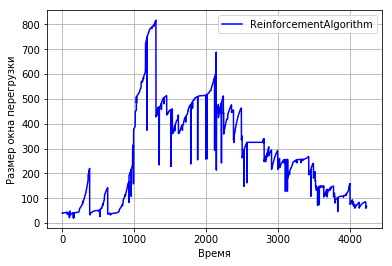

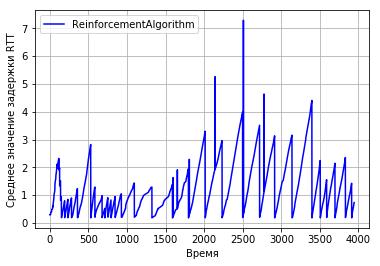

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 232844, 'square_avg': tensor([[5.0432e-30, 0.0000e+00],
        [7.0300e-28, 0.0000e+00],
        [9.1379e-28, 0.0000e+00],
        [1.6701e-28, 0.0000e+00],
        [3.0556e-33, 0.0000e+00],
        [8.2448e-28, 0.0000e+00],
        [4.0901e-28, 0.0000e+00],
        [9.5732e-25, 0.0000e+00],
        [4.9227e-27, 0.0000e+00],
        [1.4688e-28, 0.0000e+00],
        [9.7928e-28, 0.0000e+00],
        [8.6431e-29, 0.0000e+00],
        [4.1993e-27, 0.0000e+00],
        [5.8037e-26, 0.0000e+00],
        [1.6177e-27, 0.0000e+00],
        [6.2558e-23, 0.0000e+00],
        [8.1417e-33, 0.0000e+00],
        [4.7065e-29, 0.0000e+00],
        [5.0817e-29, 0.0000e+00],
        [7.1144e-38, 0.0000e+00],
        [1.5232e-34, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:50255

Результаты для отправителя 58676, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5120.000000
Среднее значение задержки RTT (мс): 917.138284



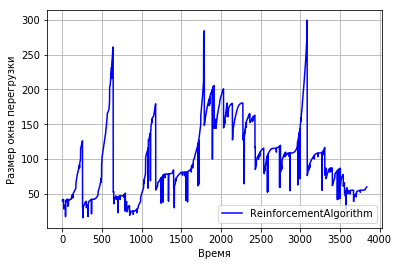

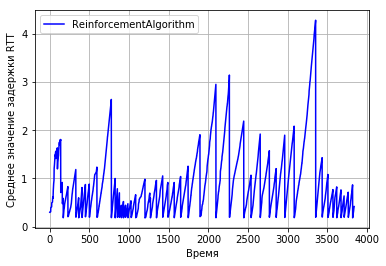

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 235897, 'square_avg': tensor([[1.3906e-28, 0.0000e+00],
        [6.8216e-27, 0.0000e+00],
        [2.0300e-26, 0.0000e+00],
        [4.9870e-21, 0.0000e+00],
        [2.6176e-28, 0.0000e+00],
        [1.2508e-26, 0.0000e+00],
        [2.3620e-26, 0.0000e+00],
        [8.6131e-17, 0.0000e+00],
        [3.8416e-23, 0.0000e+00],
        [8.9165e-24, 0.0000e+00],
        [1.0263e-26, 0.0000e+00],
        [7.3091e-28, 0.0000e+00],
        [4.9415e-20, 0.0000e+00],
        [3.7270e-22, 0.0000e+00],
        [1.6005e-26, 0.0000e+00],
        [1.2521e-22, 0.0000e+00],
        [1.8822e-26, 0.0000e+00],
        [6.1463e-23, 0.0000e+00],
        [4.5897e-18, 0.0000e+00],
        [6.9339e-27, 0.0000e+00],
        [9.5433e-25, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:48670

Результаты для отправителя 46142, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4900.000000
Среднее значение задержки RTT (мс): 952.932676



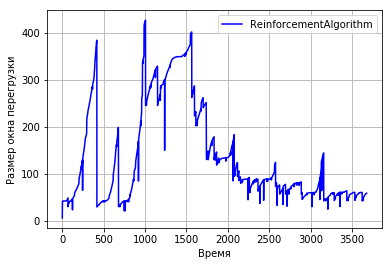

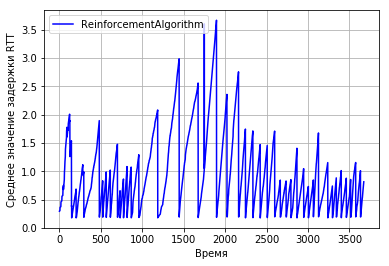

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 238733, 'square_avg': tensor([[3.7528e-30, 0.0000e+00],
        [4.6872e-28, 0.0000e+00],
        [6.3543e-28, 0.0000e+00],
        [8.8302e-29, 0.0000e+00],
        [3.2653e-33, 0.0000e+00],
        [5.8616e-28, 0.0000e+00],
        [2.9038e-28, 0.0000e+00],
        [1.8048e-24, 0.0000e+00],
        [2.6291e-27, 0.0000e+00],
        [1.5976e-26, 0.0000e+00],
        [1.5377e-28, 0.0000e+00],
        [4.3279e-29, 0.0000e+00],
        [2.2749e-27, 0.0000e+00],
        [2.9580e-26, 0.0000e+00],
        [1.0780e-27, 0.0000e+00],
        [1.0936e-23, 0.0000e+00],
        [8.3485e-30, 0.0000e+00],
        [1.4793e-26, 0.0000e+00],
        [1.1575e-27, 0.0000e+00],
        [3.4516e-34, 0.0000e+00],
        [7.9570e-32, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:36892

Результаты для отправителя 51780, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4993.333333
Среднее значение задержки RTT (мс): 1069.806451



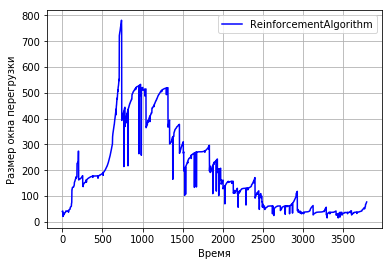

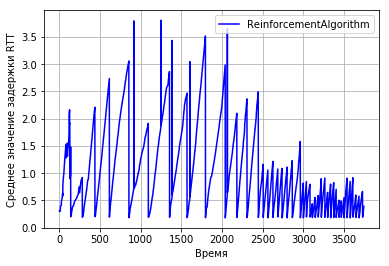

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 241536, 'square_avg': tensor([[4.0882e-30, 0.0000e+00],
        [2.9487e-28, 0.0000e+00],
        [3.8677e-28, 0.0000e+00],
        [6.1511e-29, 0.0000e+00],
        [2.1233e-33, 0.0000e+00],
        [3.6373e-28, 0.0000e+00],
        [1.5738e-28, 0.0000e+00],
        [3.1843e-25, 0.0000e+00],
        [6.3867e-28, 0.0000e+00],
        [1.6636e-26, 0.0000e+00],
        [1.3514e-28, 0.0000e+00],
        [3.1309e-29, 0.0000e+00],
        [1.4397e-27, 0.0000e+00],
        [2.1857e-26, 0.0000e+00],
        [6.7269e-28, 0.0000e+00],
        [3.0929e-23, 0.0000e+00],
        [8.7014e-31, 0.0000e+00],
        [4.0493e-27, 0.0000e+00],
        [3.0258e-27, 0.0000e+00],
        [3.6832e-34, 0.0000e+00],
        [1.4440e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:39879

Результаты для отправителя 60990, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5388.000000
Среднее значение задержки RTT (мс): 1302.592472



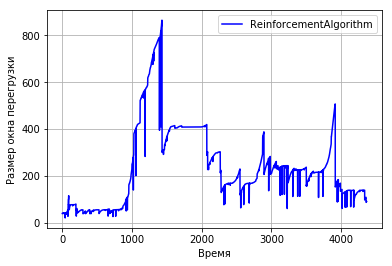

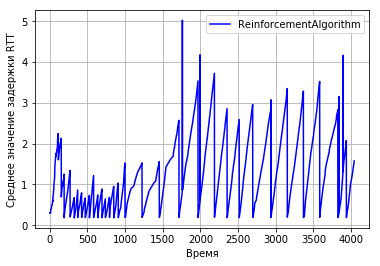

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 244450, 'square_avg': tensor([[1.7829e-30, 0.0000e+00],
        [2.1110e-28, 0.0000e+00],
        [2.7580e-28, 0.0000e+00],
        [4.4737e-29, 0.0000e+00],
        [1.9017e-33, 0.0000e+00],
        [2.5743e-28, 0.0000e+00],
        [1.1228e-28, 0.0000e+00],
        [1.7897e-25, 0.0000e+00],
        [2.0461e-28, 0.0000e+00],
        [3.3438e-28, 0.0000e+00],
        [1.2438e-28, 0.0000e+00],
        [2.3032e-29, 0.0000e+00],
        [1.0429e-27, 0.0000e+00],
        [2.1252e-26, 0.0000e+00],
        [4.8132e-28, 0.0000e+00],
        [1.1927e-22, 0.0000e+00],
        [9.0261e-31, 0.0000e+00],
        [4.5822e-27, 0.0000e+00],
        [3.1004e-27, 0.0000e+00],
        [2.3762e-34, 0.0000e+00],
        [1.3601e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:46088

Результаты для отправителя 57305, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5233.333333
Среднее значение задержки RTT (мс): 1289.587168



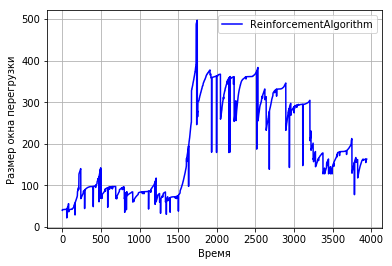

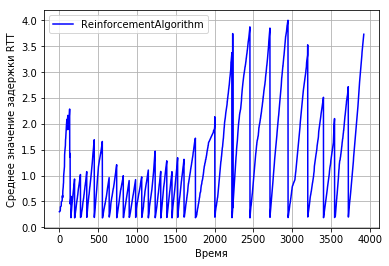

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 247437, 'square_avg': tensor([[1.3537e-30, 0.0000e+00],
        [1.6400e-28, 0.0000e+00],
        [2.1555e-28, 0.0000e+00],
        [3.4125e-29, 0.0000e+00],
        [2.0309e-33, 0.0000e+00],
        [1.9729e-28, 0.0000e+00],
        [9.2093e-29, 0.0000e+00],
        [1.5260e-25, 0.0000e+00],
        [6.8893e-29, 0.0000e+00],
        [4.6958e-29, 0.0000e+00],
        [1.1703e-28, 0.0000e+00],
        [1.7644e-29, 0.0000e+00],
        [8.2361e-28, 0.0000e+00],
        [1.8347e-26, 0.0000e+00],
        [3.7460e-28, 0.0000e+00],
        [1.4485e-23, 0.0000e+00],
        [8.2922e-31, 0.0000e+00],
        [4.3060e-27, 0.0000e+00],
        [2.5612e-27, 0.0000e+00],
        [1.1836e-34, 0.0000e+00],
        [1.0142e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:34937

Результаты для отправителя 49555, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5078.666667
Среднее значение задержки RTT (мс): 792.891060



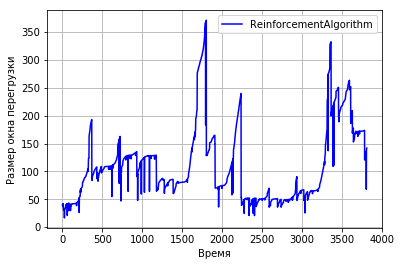

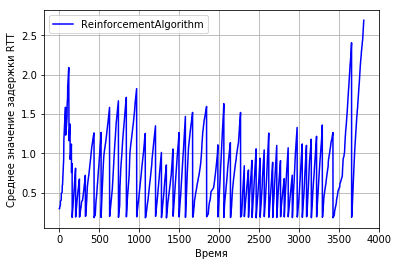

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 250337, 'square_avg': tensor([[1.0972e-30, 0.0000e+00],
        [1.2908e-28, 0.0000e+00],
        [1.7130e-28, 0.0000e+00],
        [2.6413e-29, 0.0000e+00],
        [2.5338e-33, 0.0000e+00],
        [1.5395e-28, 0.0000e+00],
        [7.6099e-29, 0.0000e+00],
        [4.9991e-25, 0.0000e+00],
        [1.4278e-29, 0.0000e+00],
        [2.8518e-27, 0.0000e+00],
        [9.7238e-29, 0.0000e+00],
        [1.3560e-29, 0.0000e+00],
        [6.5500e-28, 0.0000e+00],
        [1.4498e-26, 0.0000e+00],
        [2.9578e-28, 0.0000e+00],
        [4.4607e-23, 0.0000e+00],
        [3.1939e-30, 0.0000e+00],
        [1.1409e-26, 0.0000e+00],
        [2.1051e-27, 0.0000e+00],
        [6.3928e-35, 0.0000e+00],
        [7.9955e-32, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:40911

Результаты для отправителя 44740, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4066.666667
Среднее значение задержки RTT (мс): 505.206074



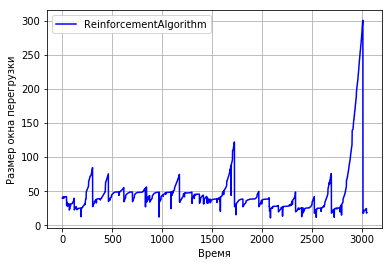

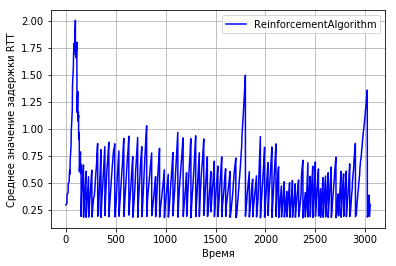

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 252869, 'square_avg': tensor([[5.9021e-29, 0.0000e+00],
        [1.1552e-26, 0.0000e+00],
        [1.5605e-26, 0.0000e+00],
        [2.0838e-27, 0.0000e+00],
        [1.2187e-31, 0.0000e+00],
        [1.3632e-26, 0.0000e+00],
        [8.0727e-26, 0.0000e+00],
        [6.6236e-18, 0.0000e+00],
        [1.6697e-20, 0.0000e+00],
        [5.3888e-23, 0.0000e+00],
        [1.4800e-26, 0.0000e+00],
        [1.0751e-27, 0.0000e+00],
        [5.9963e-26, 0.0000e+00],
        [7.9111e-22, 0.0000e+00],
        [2.6446e-26, 0.0000e+00],
        [3.0378e-22, 0.0000e+00],
        [1.7515e-31, 0.0000e+00],
        [5.5098e-29, 0.0000e+00],
        [1.7160e-27, 0.0000e+00],
        [6.8356e-35, 0.0000e+00],
        [4.2521e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:58913

Результаты для отправителя 54664, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 4477.333333
Среднее значение задержки RTT (мс): 846.561228



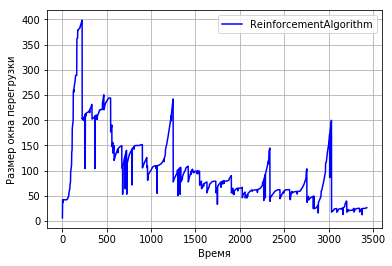

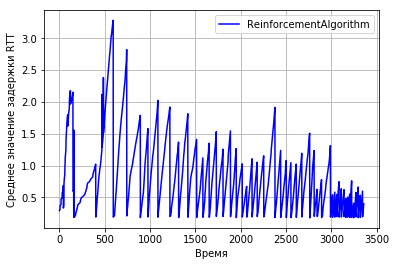

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 255488, 'square_avg': tensor([[6.0296e-30, 0.0000e+00],
        [1.0746e-27, 0.0000e+00],
        [1.3919e-27, 0.0000e+00],
        [2.0749e-28, 0.0000e+00],
        [3.4324e-32, 0.0000e+00],
        [1.2651e-27, 0.0000e+00],
        [6.6164e-28, 0.0000e+00],
        [2.0497e-24, 0.0000e+00],
        [1.7877e-26, 0.0000e+00],
        [3.3611e-28, 0.0000e+00],
        [8.8814e-28, 0.0000e+00],
        [1.0044e-28, 0.0000e+00],
        [5.3491e-27, 0.0000e+00],
        [1.5443e-25, 0.0000e+00],
        [2.3996e-27, 0.0000e+00],
        [2.2207e-23, 0.0000e+00],
        [1.8342e-30, 0.0000e+00],
        [6.5439e-27, 0.0000e+00],
        [5.9684e-30, 0.0000e+00],
        [1.2159e-36, 0.0000e+00],
        [1.9863e-34, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:36495

Результаты для отправителя 56332, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 6061.333333
Среднее значение задержки RTT (мс): 1288.157319



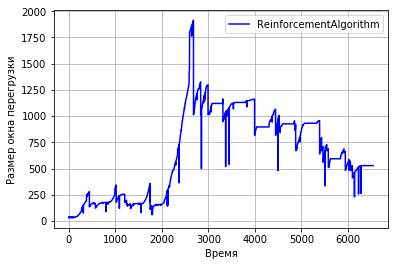

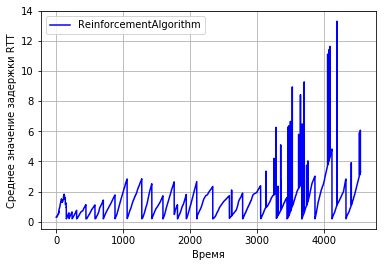

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 258357, 'square_avg': tensor([[2.5183e-30, 0.0000e+00],
        [3.1562e-28, 0.0000e+00],
        [4.1347e-28, 0.0000e+00],
        [6.2002e-29, 0.0000e+00],
        [3.0601e-33, 0.0000e+00],
        [3.8382e-28, 0.0000e+00],
        [1.7628e-28, 0.0000e+00],
        [3.4730e-25, 0.0000e+00],
        [1.7224e-27, 0.0000e+00],
        [8.7328e-29, 0.0000e+00],
        [1.1901e-28, 0.0000e+00],
        [2.6989e-29, 0.0000e+00],
        [1.5251e-27, 0.0000e+00],
        [1.6876e-26, 0.0000e+00],
        [7.0761e-28, 0.0000e+00],
        [8.8334e-24, 0.0000e+00],
        [2.1489e-30, 0.0000e+00],
        [1.0285e-26, 0.0000e+00],
        [1.8949e-27, 0.0000e+00],
        [6.4134e-34, 0.0000e+00],
        [1.1167e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:38758

Результаты для отправителя 35775, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5060.000000
Среднее значение задержки RTT (мс): 1283.680410



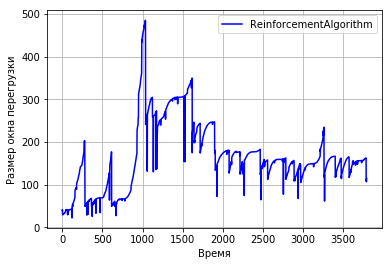

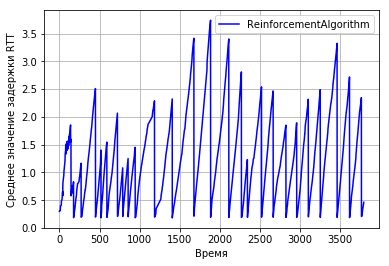

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 261246, 'square_avg': tensor([[1.7563e-30, 0.0000e+00],
        [2.2715e-28, 0.0000e+00],
        [2.9299e-28, 0.0000e+00],
        [4.6372e-29, 0.0000e+00],
        [1.7995e-33, 0.0000e+00],
        [2.7325e-28, 0.0000e+00],
        [1.2143e-28, 0.0000e+00],
        [2.4681e-25, 0.0000e+00],
        [7.2485e-28, 0.0000e+00],
        [2.1581e-27, 0.0000e+00],
        [8.2202e-29, 0.0000e+00],
        [2.0701e-29, 0.0000e+00],
        [1.1104e-27, 0.0000e+00],
        [1.9483e-26, 0.0000e+00],
        [5.0756e-28, 0.0000e+00],
        [1.1170e-23, 0.0000e+00],
        [9.3311e-31, 0.0000e+00],
        [5.5406e-27, 0.0000e+00],
        [2.6113e-27, 0.0000e+00],
        [5.3699e-34, 0.0000e+00],
        [1.2708e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:37088

Результаты для отправителя 33490, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5590.666667
Среднее значение задержки RTT (мс): 1010.740048



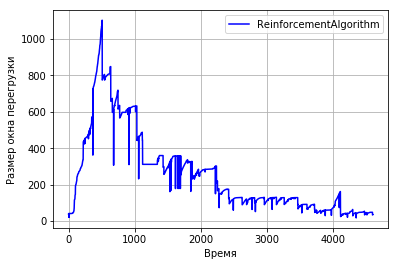

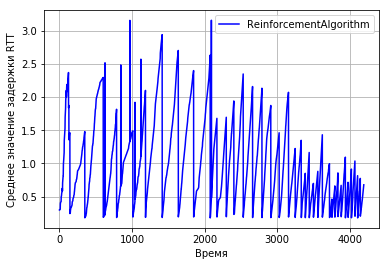

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 264230, 'square_avg': tensor([[1.3291e-30, 0.0000e+00],
        [1.6812e-28, 0.0000e+00],
        [2.1689e-28, 0.0000e+00],
        [3.4769e-29, 0.0000e+00],
        [1.8592e-33, 0.0000e+00],
        [2.0128e-28, 0.0000e+00],
        [9.0741e-29, 0.0000e+00],
        [1.6462e-25, 0.0000e+00],
        [3.5710e-28, 0.0000e+00],
        [1.6273e-28, 0.0000e+00],
        [1.0056e-28, 0.0000e+00],
        [1.5485e-29, 0.0000e+00],
        [8.2977e-28, 0.0000e+00],
        [2.2263e-26, 0.0000e+00],
        [3.7632e-28, 0.0000e+00],
        [1.8983e-23, 0.0000e+00],
        [9.5648e-30, 0.0000e+00],
        [4.4897e-26, 0.0000e+00],
        [2.5672e-27, 0.0000e+00],
        [3.6472e-34, 0.0000e+00],
        [1.1296e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:59101

Результаты для отправителя 56689, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5556.000000
Среднее значение задержки RTT (мс): 1146.796136



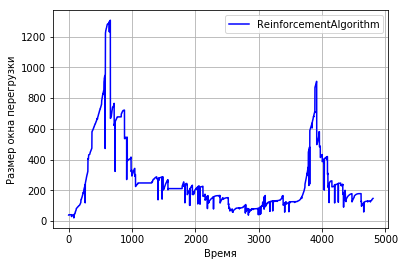

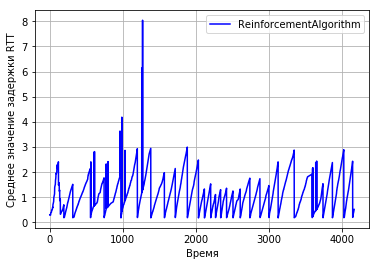

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 267028, 'square_avg': tensor([[1.0386e-30, 0.0000e+00],
        [1.3289e-28, 0.0000e+00],
        [1.7243e-28, 0.0000e+00],
        [2.7065e-29, 0.0000e+00],
        [1.9958e-33, 0.0000e+00],
        [1.5862e-28, 0.0000e+00],
        [7.4497e-29, 0.0000e+00],
        [2.7611e-25, 0.0000e+00],
        [1.7905e-28, 0.0000e+00],
        [1.2551e-27, 0.0000e+00],
        [1.0349e-28, 0.0000e+00],
        [1.1974e-29, 0.0000e+00],
        [6.6100e-28, 0.0000e+00],
        [1.7082e-26, 0.0000e+00],
        [2.9821e-28, 0.0000e+00],
        [1.2392e-23, 0.0000e+00],
        [1.0192e-30, 0.0000e+00],
        [7.1440e-27, 0.0000e+00],
        [2.3918e-27, 0.0000e+00],
        [2.5606e-34, 0.0000e+00],
        [1.0090e-31, 0.0

[Отправитель] Подключен к получателю: 100.64.0.2:44764

Результаты для отправителя 36086, с алгоритмом: ReinforcementAlgorithm
Пропускная способность (бит/с): 5102.666667
Среднее значение задержки RTT (мс): 1337.006564



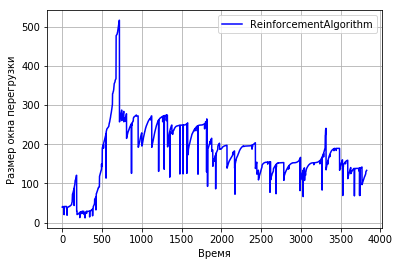

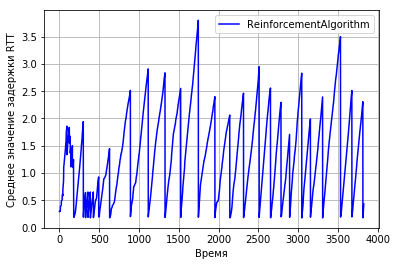

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139815646972664: {'step': 269951, 'square_avg': tensor([[8.2292e-31, 0.0000e+00],
        [1.0825e-28, 0.0000e+00],
        [1.4154e-28, 0.0000e+00],
        [2.1604e-29, 0.0000e+00],
        [1.6909e-33, 0.0000e+00],
        [1.2877e-28, 0.0000e+00],
        [6.3860e-29, 0.0000e+00],
        [1.2273e-25, 0.0000e+00],
        [9.0365e-29, 0.0000e+00],
        [4.8950e-29, 0.0000e+00],
        [8.5626e-29, 0.0000e+00],
        [9.5066e-30, 0.0000e+00],
        [5.4334e-28, 0.0000e+00],
        [1.7621e-26, 0.0000e+00],
        [2.4372e-28, 0.0000e+00],
        [2.7868e-23, 0.0000e+00],
        [2.9440e-30, 0.0000e+00],
        [2.4183e-26, 0.0000e+00],
        [2.2218e-27, 0.0000e+00],
        [1.6170e-34, 0.0000e+00],
        [8.3496e-32, 0.0

In [3]:
def run_tcp_ml(hyperparam_file):
    """Запуск модели ML."""
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    hyperparameters = None
    with open(hyperparam_file) as hyperparams_file:
        hyperparameters = json.loads(hyperparams_file.read())

    NUM_EPISODES = hyperparameters['HYPERPARAMETERS']['NUM_EPISODES'] # количество эпох # количество эпох
    TARGET_UPDATE = hyperparameters['HYPERPARAMETERS']['TARGET_UPDATE'] # обновление значений

    policy_net = LSTM_DQN(hyperparameters['lstm_config'], device).to(device = device)
    target_net = LSTM_DQN(hyperparameters['lstm_config'], device).to(device = device)

    target_net.load_state_dict(policy_net.state_dict())
    optimizer = optim.RMSprop(policy_net.parameters())
    transitions = []
    total_losses = []
    for i in range(NUM_EPISODES):
        port = open_tcp_port()
        algorithm = ReinforcementAlgorithm(policy_net = policy_net, target_net = target_net, device = device, optimizer = optimizer, hyperparameters = hyperparameters['HYPERPARAMETERS'], episode_num = i, transitions = transitions)
        print("***Эпоха # %d***" % i)
        run_mah_settings_ML(mah_settings, 60, [Sender(port, algorithm)], i, True)
        # производим запоминание rtt, cwnd, stats и очереди
        total_losses.append(algorithm.losses)
        print("Model's state_dict:")
        for param_tensor in policy_net.state_dict():
            print(param_tensor, "\t", policy_net.state_dict()[param_tensor].size())
        # Print optimizer's state_dict
        print("Optimizer's state_dict:")
        for var_name in optimizer.state_dict():
            print(var_name, "\t", optimizer.state_dict()[var_name])
        checkpoint = {'model': LSTM_DQN(hyperparameters['lstm_config'], device),
                      'state_dict': policy_net.state_dict(),
                      'optimizer' : optimizer.state_dict()}

        torch.save(checkpoint, 'eg.pth')

        if i % TARGET_UPDATE == 0:
            target_net.load_state_dict(policy_net.state_dict())
   
    
run_tcp_ml(hyperparam_file = 'hyperparameters_1.json') # запускаем процесс с файлом гиперпараметров

In [7]:
def run_tcp_ml(hyperparam_file):
    """Запуск модели ML."""
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    hyperparameters = None
    with open(hyperparam_file) as hyperparams_file:
        hyperparameters = json.loads(hyperparams_file.read())

    NUM_EPISODES = 1 # количество эпох
    
    check = torch.load('check.pth', map_location="cpu")
    model = check['model']
    optimizer = optim.RMSprop(model.parameters())
    model.load_state_dict(check['state_dict'])
    optimizer.load_state_dict(check['optimizer'])
    model.eval()
    model.train()
    transitions = []
    total_losses = []
    for i in range(NUM_EPISODES):
        port = open_tcp_port()
        algorithm = ReinforcementAlgorithm(policy_net = model, target_net = model, device = device, optimizer = optimizer, hyperparameters = hyperparameters['HYPERPARAMETERS'], episode_num = i, transitions = transitions)
        print("***Эпоха # %d***" % i)
        run_mah_settings_ML(mah_settings, 60, [Sender(port, algorithm)], i, True)
        print("Model's state_dict:")
        for param_tensor in model.state_dict():
            print(param_tensor, "\t", model.state_dict()[param_tensor].size())
        # Print optimizer's state_dict
        print("Optimizer's state_dict:")
        for var_name in optimizer.state_dict():
            print(var_name, "\t", optimizer.state_dict()[var_name])
    
run_tcp_ml(hyperparam_file = 'hyperparameters_1.json') # запускаем процесс с файлом гиперпараметров

***Эпоха # 0***
[Отправитель] Подключен к получателю: 100.64.0.2:44760

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139885021406984: {'step': 253564, 'square_avg': tensor([[7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44,

In [10]:
def run_tcp_ml(hyperparam_file):
    """Запуск модели ML."""
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    hyperparameters = None
    with open(hyperparam_file) as hyperparams_file:
        hyperparameters = json.loads(hyperparams_file.read())

    NUM_EPISODES = 1 # количество эпох
    
    check = torch.load('check.pth', map_location="cpu")
    model = check['model']
    optimizer = optim.RMSprop(model.parameters())
    model.load_state_dict(check['state_dict'])
    optimizer.load_state_dict(check['optimizer'])
    model.eval()
    model.train()
    transitions = []
    total_losses = []
    for i in range(NUM_EPISODES):
        port = open_tcp_port()
        algorithm = ReinforcementAlgorithm(policy_net = model, target_net = model, device = device, optimizer = optimizer, hyperparameters = hyperparameters['HYPERPARAMETERS'], episode_num = i, transitions = transitions)
        print("***Эпоха # %d***" % i)
        run_mah_settings_ML(mah_settings, 60, [Sender(port, algorithm)], i, True)
        print("Model's state_dict:")
        for param_tensor in model.state_dict():
            print(param_tensor, "\t", model.state_dict()[param_tensor].size())
        # Print optimizer's state_dict
        print("Optimizer's state_dict:")
        for var_name in optimizer.state_dict():
            print(var_name, "\t", optimizer.state_dict()[var_name])
    
run_tcp_ml(hyperparam_file = 'hyperparameters_1.json') # запускаем процесс с файлом гиперпараметров

***Эпоха # 0***
[Отправитель] Подключен к получателю: 100.64.0.2:47452

Model's state_dict:
W.weight_ih_l0 	 torch.Size([60, 2])
W.weight_hh_l0 	 torch.Size([60, 15])
W.bias_ih_l0 	 torch.Size([60])
W.bias_hh_l0 	 torch.Size([60])
U.weight 	 torch.Size([8, 15])
U.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {139884217960272: {'step': 253552, 'square_avg': tensor([[7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44, 0.0000e+00],
        [7.0065e-44,